# Board Game Review Prediction
Collected the data from https://github.com/ThaWeatherman/scrapers/tree/master/boardgamegeek.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR

In [3]:
data = pd.read_csv("games.csv")
data.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [3]:
data.describe()

,id,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
count,81312.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000
mean,72278.150138,1806.630668,1.992018,5.637703,51.634788,49.276833,51.634788,6.983975,161.886585,4.212144,1.157632,262.502509,9.236423,12.688890,42.719144,49.290031,16.488009,0.908083
std,58818.237742,588.517834,0.931034,56.076890,345.699969,334.483934,345.699969,5.035138,1145.978126,3.056551,2.340033,1504.536693,39.757408,60.764207,239.292628,284.862853,115.980285,1.176002
min,1.000000,-3500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21339.750000,1984.000000,2.000000,2.000000,8.000000,10.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43258.000000,2003.000000,2.000000,4.000000,30.000000,30.000000,30.000000,8.000000,2.000000,5.265620,0.000000,7.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,128836.500000,2010.000000,2.000000,6.000000,60.000000,60.000000,60.000000,12.000000,16.000000,6.718777,0.000000,51.000000,2.000000,3.000000,7.000000,9.000000,2.000000,1.916700
max,184451.000000,2018.000000,99.000000,11299.000000,60120.000000,60120.000000,60120.000000,120.000000,53680.000000,10.000000,8.221860,73188.000000,1395.000000,1586.000000,6402.000000,11798.000000,5996.000000,5.000000


In [4]:
# Initial checking of the data, could find the min value of "yearpublished" to be in Negative.
# Lets take a closer look into it.
print(f"Total percentage of negative year data: {(data[data.yearpublished<0].shape[0]/data.shape[0])*100} %")
data[data.yearpublished<0].head()

Total percentage of negative year data: 0.029515938606847696 %


,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
70,188,boardgame,Go,-2200.0,2.0,2.0,90.0,90.0,90.0,8.0,9654,7.70531,7.46289,12784,223,129,1016,2820,1140,3.9491
917,2397,boardgame,Backgammon,-3000.0,2.0,2.0,30.0,30.0,30.0,8.0,7745,6.51582,6.38733,10578,102,11,109,2270,782,2.0332
1870,188,boardgame,Go,-2200.0,2.0,2.0,90.0,90.0,90.0,8.0,9654,7.70531,7.46289,12784,223,129,1016,2820,1140,3.9491
2717,2397,boardgame,Backgammon,-3000.0,2.0,2.0,30.0,30.0,30.0,8.0,7745,6.51582,6.38733,10578,102,11,109,2270,782,2.0332
6284,2399,boardgame,Senet,-3500.0,2.0,2.0,30.0,30.0,30.0,6.0,408,5.91244,5.62977,803,39,12,74,212,55,1.5091


In [5]:
# We have entry with 0 for the features, wehre the features should be greater than zero. Lets check this one
print(f"Total percentage of Zero Rating year data: {(data[data.average_rating==0].shape[0]/data.shape[0])*100} %")
data[data.average_rating==0].head()

Total percentage of Zero Rating year data: 29.98327430145612 %


,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
13048,318,boardgame,Looney Leo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,1,0,0,0.0
13068,579,boardgame,Field of Fire,2002.0,2.0,0.0,0.0,0.0,0.0,12.0,0,0.0,0.0,2,0,0,1,0,0,0.0
13114,894,boardgame,LifeLinks,2000.0,1.0,8.0,10.0,10.0,10.0,8.0,0,0.0,0.0,2,0,1,1,0,0,0.0
13116,897,boardgame,Dear Abby,1992.0,3.0,4.0,60.0,60.0,60.0,13.0,0,0.0,0.0,7,1,0,0,0,0,0.0
13124,946,boardgame,Rolazone,1999.0,2.0,2.0,30.0,30.0,30.0,0.0,0,0.0,0.0,0,0,0,3,0,0,0.0


In [6]:
data.nunique()

id                      79463
type                        2
name                    76035
yearpublished             323
minplayers                 24
maxplayers                 89
playingtime               134
minplaytime               123
maxplaytime               134
minage                     35
users_rated              2147
average_rating          17564
bayes_average_rating    12681
total_owners             2995
total_traders             407
total_wanters             540
total_wishers            1130
total_comments           1216
total_weights             657
average_weight           3376
dtype: int64

In [7]:
data.shape

(81312, 20)

In [7]:
# Removing id and name column
data.drop(['id','name'], axis = 1, inplace=True)
data.columns

Index(['type', 'yearpublished', 'minplayers', 'maxplayers', 'playingtime',
       'minplaytime', 'maxplaytime', 'minage', 'users_rated', 'average_rating',
       'bayes_average_rating', 'total_owners', 'total_traders',
       'total_wanters', 'total_wishers', 'total_comments', 'total_weights',
       'average_weight'],
      dtype='object')

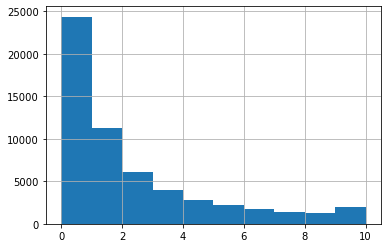

In [8]:
plt.hist(data['users_rated'],range = (0,10)) 
plt.grid()
plt.show()

In [9]:
data['users_rated'].value_counts().count()

2147

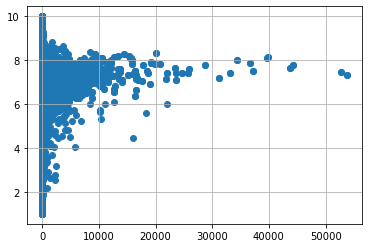

In [16]:
plt.scatter((data[data.users_rated>0]['users_rated']),data[data.users_rated>0]['average_rating'])
plt.grid()
plt.show()

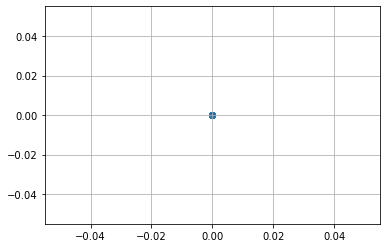

In [17]:
plt.scatter(data[data.users_rated==0]['users_rated'],data[data.users_rated==0]['average_rating'])
plt.grid()
plt.show()

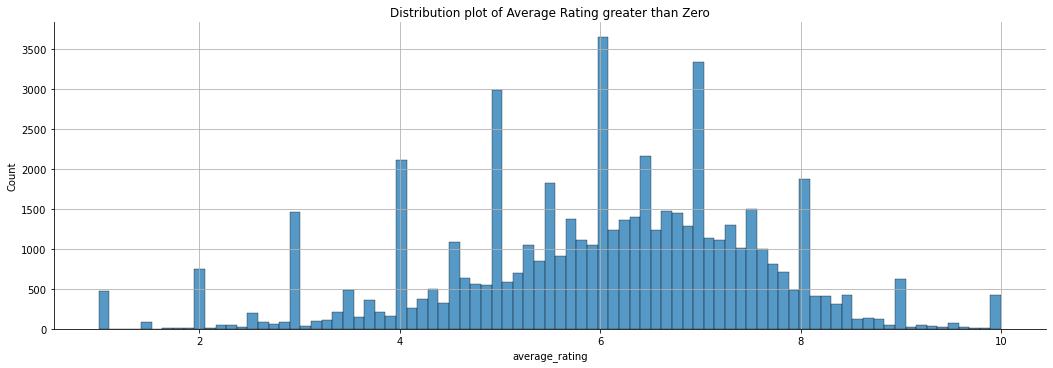

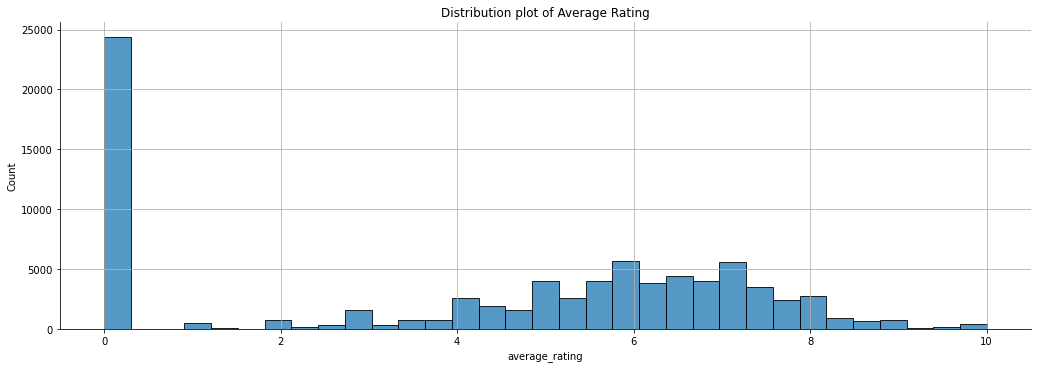

In [21]:
g = sns.displot(data[data.average_rating>0]['average_rating']);
g.fig.set_figwidth(17)
g.fig.set_figheight(5)
plt.title("Distribution plot of Average Rating greater than Zero")
plt.grid()
plt.show()
h = sns.displot(data['average_rating'])
h.fig.set_figwidth(17)
h.fig.set_figheight(5)
plt.title("Distribution plot of Average Rating")
plt.grid()
plt.show()

In [22]:
data[data.users_rated==0].shape

(24380, 18)

In [23]:
data.shape

(81312, 18)

In [10]:
# We could see that the users_rated and average_rating are dependent on each other
# and zero users rating corresponds to the zero rating on a product.
# Hence removing the data where user_rating is zero.
print("Shape of the data where users rated is Zero",data[data.users_rated==0].shape)
print("Shape of the data where average rating is Zero",data[data.average_rating==0].shape)
print(f'Deleting {data[data.users_rated==0].shape[0]/data.shape[0]} % of Data')
data = data[data.users_rated>0]
print(f"New Data Shape {data.shape}")

Shape of the data where users rated is Zero (24380, 18)
Shape of the data where average rating is Zero (24380, 18)
Deleting 0.2998327430145612 % of Data
New Data Shape (56932, 18)


In [85]:
data.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [11]:
data[data.minplayers>data.maxplayers].shape

(2004, 18)

In [12]:
for i in range(data.shape[0]):
    if data['minplayers'].iloc[i]>data['maxplayers'].iloc[i]:
        data['maxplayers'].iloc[i] = data['minplayers'].iloc[i]

C:\Users\lette\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [36]:
data[data.minplayers==0].shape

(1240, 18)

In [37]:
data[data.minplaytime>data.maxplaytime].shape

(289, 18)

In [13]:
for i in range(data.shape[0]):
    if data['minplaytime'].iloc[i]>data['maxplaytime'].iloc[i]:
        a = data['minplaytime'].iloc[i]
        data['minplaytime'].iloc[i] = data['maxplaytime'].iloc[i]
        data['maxplaytime'].iloc[i] = a

In [43]:
data[data.maxplaytime==0].head()

,type,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
929,boardgame,2011.0,4.0,12.0,0.0,0.0,0.0,12.0,413,7.88981,6.37987,966,6,54,131,80,14,1.0000
1342,boardgame,2009.0,2.0,2.0,0.0,0.0,0.0,0.0,338,7.66586,6.16904,680,22,25,78,104,36,3.2500
1516,boardgame,2007.0,1.0,2.0,0.0,0.0,0.0,12.0,224,8.26528,6.09953,572,3,116,323,113,66,4.5758
1581,boardgame,0.0,0.0,0.0,0.0,0.0,0.0,0.0,433,7.00323,6.07254,695,15,141,510,725,91,2.2088
1686,boardgame,2014.0,2.0,5.0,0.0,0.0,0.0,0.0,289,7.44851,6.03573,798,8,58,146,64,20,2.6000


In [44]:
data[data.maxplaytime==0].shape

(9423, 18)

In [14]:
print("No. of columns containing null values: ",len(data.columns[data.isna().any()]))

print("No. of columns not containing null values: ",len(data.columns[data.notna().all()]))

print("Total no. of columns in the dataframe: ",len(data.columns))

No. of columns containing null values:  7
No. of columns not containing null values:  11
Total no. of columns in the dataframe:  18


In [16]:
# Checking for NaN values
def nans(df): return df[df.isnull().any(axis=1)]
nans(data)

,type,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
46057,boardgame,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,6.50000,0.0,29,2,0,0,9,3,2.0
46537,boardgame,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,6.97222,0.0,35,0,1,4,8,4,3.5


In [17]:
# Dropping all Null values
data.dropna(inplace=True)

In [18]:
data.isnull().sum()

type                    0
yearpublished           0
minplayers              0
maxplayers              0
playingtime             0
minplaytime             0
maxplaytime             0
minage                  0
users_rated             0
average_rating          0
bayes_average_rating    0
total_owners            0
total_traders           0
total_wanters           0
total_wishers           0
total_comments          0
total_weights           0
average_weight          0
dtype: int64

In [64]:
data.shape

(56930, 18)

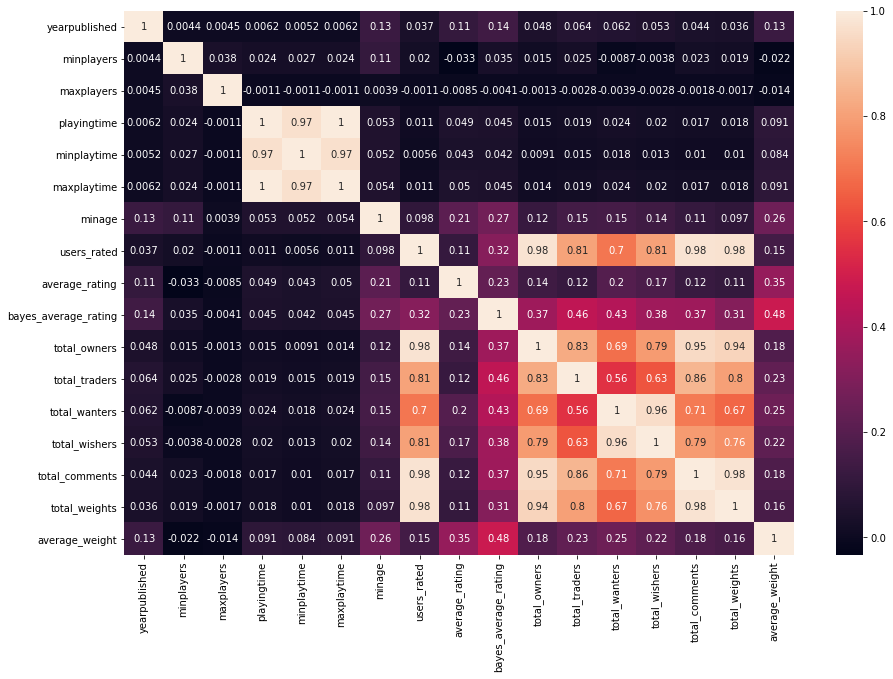

In [20]:
# Checking the Correlation among the features
# correlation matrix
correl = data.corr()
fig = plt.figure(figsize = (15,10))
sns.heatmap(correl,annot=True);
plt.show()

In [72]:
data.columns

Index(['type', 'yearpublished', 'minplayers', 'maxplayers', 'playingtime',
       'minplaytime', 'maxplaytime', 'minage', 'users_rated', 'average_rating',
       'bayes_average_rating', 'total_owners', 'total_traders',
       'total_wanters', 'total_wishers', 'total_comments', 'total_weights',
       'average_weight'],
      dtype='object')

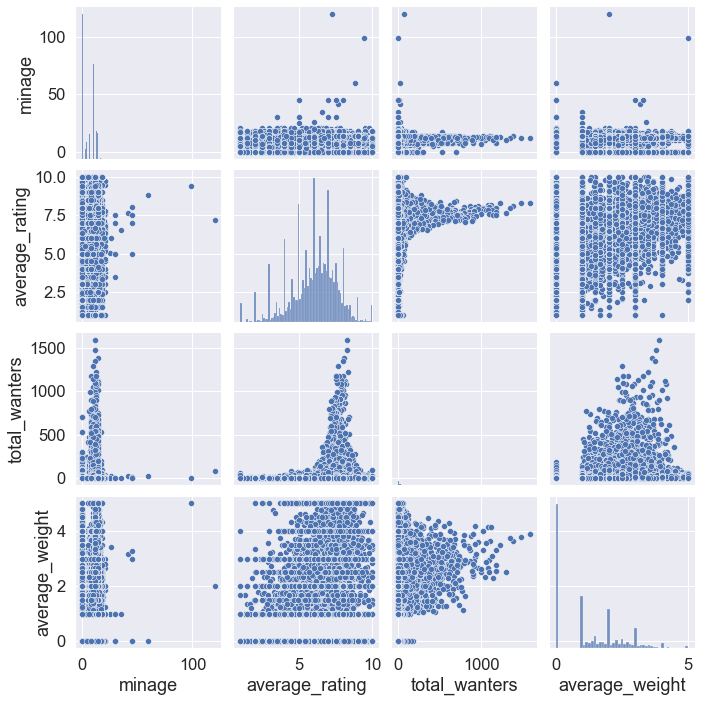

In [77]:
# It could be seen that the dependent variable is highly correlated upon the below variables
# 'minage','average_rating','total_wanters','average_weight'
sns.pairplot(data[['minage','average_rating','total_wanters','average_weight']])
plt.grid()
plt.show()

In [79]:
data.describe()

,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
count,56930.000000,56930.000000,56930.000000,56930.000000,56930.000000,56930.000000,56930.000000,56930.000000,56930.000000,56930.000000,56930.000000,56930.000000,56930.000000,56930.000000,56930.000000,56930.000000,56930.000000
mean,1874.770385,2.005041,5.647831,59.908818,57.197980,60.156894,7.592816,231.218865,6.015886,1.653423,374.276778,13.158177,17.991551,60.541542,70.300843,23.534200,1.269227
std,486.079228,0.791646,50.751250,406.324651,393.074731,406.322620,4.868998,1363.704723,1.578574,2.645976,1786.462228,46.970996,71.962916,284.075449,338.272976,138.010558,1.213839
min,-3500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1989.000000,2.000000,2.000000,15.000000,15.000000,15.000000,4.000000,2.000000,5.000000,0.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,2005.000000,2.000000,4.000000,30.000000,30.000000,30.000000,8.000000,7.000000,6.150000,0.000000,20.000000,1.000000,1.000000,3.000000,4.000000,1.000000,1.000000
75%,2011.000000,2.000000,6.000000,60.000000,60.000000,60.000000,12.000000,39.000000,7.039417,5.488010,125.000000,6.000000,6.000000,15.000000,19.000000,5.000000,2.000000
max,2017.000000,40.000000,11299.000000,60120.000000,60120.000000,60120.000000,120.000000,53680.000000,10.000000,8.221860,73188.000000,1395.000000,1586.000000,6402.000000,11798.000000,5996.000000,5.000000


# Modelling

In [21]:
data['type'].unique()
data.replace(to_replace='boardgame',value=1,inplace=True)
data.replace(to_replace='boardgameexpansion',value=0,inplace=True)

In [22]:
y = data.pop('average_rating')
X = data.copy()

In [93]:
# Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [95]:
# Defining a Base Model: Linear Regression
# We would use Mean Squred Error to rate our model
# This model is being trained on non scaled data
reg = LinearRegression()
reg.fit(X_train, y_train)
print("Training R2 Score",reg.score(X_train, y_train))
print("Test R2 Score",reg.score(X_test, y_test))
print("MSE of Linear Regression is ",mean_squared_error(y_test, reg.predict(X_test)))

Training R2 Score 0.23364825395016653
Test R2 Score 0.2359748510569155
MSE of Linear Regression is  1.8882644839190765


In [23]:
# Scaling our Data
scaler = StandardScaler()
scaled = scaler.fit_transform(data[['yearpublished', 'minplayers', 'maxplayers', 'playingtime','minplaytime', 'maxplaytime','minage', 'users_rated', 'bayes_average_rating', 'total_owners', 'total_traders','total_wanters', 'total_wishers', 'total_comments', 'total_weights','average_weight']])
type(scaled)

numpy.ndarray

In [24]:
onehot = OneHotEncoder()
categ = onehot.fit_transform(data['type'].to_numpy().reshape(-1,1))

In [25]:
tot_data = np.concatenate((scaled,categ.toarray()), axis=1)
# Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(tot_data, y, test_size=0.33, random_state=42)

In [112]:
# Defining a Base Model: Linear Regression
# We would use Mean Squred Error to rate our model
# This model is being trained on scaled data
reg = LinearRegression()
reg.fit(X_train, y_train)
print("Training R2 Score",reg.score(X_train, y_train))
print("Test R2 Score",reg.score(X_test, y_test))
print("MSE of Linear Regression is ",mean_squared_error(y_test, reg.predict(X_test)))

Training R2 Score 0.23364825395016653
Test R2 Score 0.23597485105691451
MSE of Linear Regression is  1.888264483919079


In [135]:
# The Result for both scaled and unscaled data are the same. Hence we would now try with another model.
# Trying with SGDRegressor
param = {'penalty':["l1","l2","elasticnet"],"alpha":[0.0001,0.001,0.01,0.1,1],"learning_rate":['constant',"optimal","invscaling","adaptive"]}
sgdreg = SGDRegressor(max_iter=1000,verbose=1)
clf = RandomizedSearchCV(estimator = sgdreg, param_distributions=param, random_state=0,scoring = "neg_mean_absolute_error")
clf.fit(X_train, y_train)

-- Epoch 1
Norm: 55266064824.53, NNZs: 18, Bias: 734759036.059418, T: 30514, Avg. loss: 42653520103819853168640.000000
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 259667506583.42, NNZs: 18, Bias: -17825213978.689159, T: 61028, Avg. loss: 120804374831189500887040.000000
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 614343015794.81, NNZs: 18, Bias: -7114918961.458267, T: 91542, Avg. loss: 56623190052100240310272.000000
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 162521149303.81, NNZs: 18, Bias: -13282173395.035254, T: 122056, Avg. loss: 41123999409157999427584.000000
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 175819743626.09, NNZs: 18, Bias: 1913922763.251903, T: 152570, Avg. loss: 55819108057934720925696.000000
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 297877264542.16, NNZs: 18, Bias: 37941974926.269821, T: 183084, Avg. loss: 61813102352875648974848.000000
Total training time: 0.05 seconds.
-- Epoch 7
Norm: 374335761588.05, NNZs: 18, Bias: 405092

Norm: 271134.44, NNZs: 18, Bias: 192640.233732, T: 1159532, Avg. loss: 317669206.422009
Total training time: 0.26 seconds.
-- Epoch 39
Norm: 253764.37, NNZs: 18, Bias: 179594.666635, T: 1190046, Avg. loss: 819676389.312150
Total training time: 0.27 seconds.
-- Epoch 40
Norm: 235469.77, NNZs: 18, Bias: 167806.338130, T: 1220560, Avg. loss: 264650140.380485
Total training time: 0.28 seconds.
-- Epoch 41
Norm: 224812.28, NNZs: 18, Bias: 155790.678702, T: 1251074, Avg. loss: 17562250.477669
Total training time: 0.30 seconds.
-- Epoch 42
Norm: 204581.90, NNZs: 18, Bias: 146084.115832, T: 1281588, Avg. loss: 11244687443.913803
Total training time: 0.30 seconds.
-- Epoch 43
Norm: 190895.38, NNZs: 18, Bias: 136255.109265, T: 1312102, Avg. loss: 3248089.899629
Total training time: 0.31 seconds.
-- Epoch 44
Norm: 178104.33, NNZs: 18, Bias: 127203.784245, T: 1342616, Avg. loss: 24844287.120427
Total training time: 0.32 seconds.
-- Epoch 45
Norm: 166237.12, NNZs: 18, Bias: 118680.211655, T: 137313

Norm: 1429.50, NNZs: 15, Bias: 1028.564105, T: 3478596, Avg. loss: 36.761225
Total training time: 0.83 seconds.
-- Epoch 115
Norm: 1334.33, NNZs: 14, Bias: 960.468868, T: 3509110, Avg. loss: 31.636460
Total training time: 0.84 seconds.
-- Epoch 116
Norm: 1245.55, NNZs: 14, Bias: 896.822312, T: 3539624, Avg. loss: 27.654091
Total training time: 0.85 seconds.
-- Epoch 117
Norm: 1162.51, NNZs: 13, Bias: 837.665989, T: 3570138, Avg. loss: 24.084140
Total training time: 0.86 seconds.
-- Epoch 118
Norm: 1085.13, NNZs: 13, Bias: 782.246863, T: 3600652, Avg. loss: 21.101224
Total training time: 0.86 seconds.
-- Epoch 119
Norm: 1012.84, NNZs: 13, Bias: 730.628230, T: 3631166, Avg. loss: 18.606708
Total training time: 0.87 seconds.
-- Epoch 120
Norm: 945.47, NNZs: 13, Bias: 682.277345, T: 3661680, Avg. loss: 16.438263
Total training time: 0.88 seconds.
-- Epoch 121
Norm: 882.52, NNZs: 13, Bias: 637.250680, T: 3692194, Avg. loss: 14.283153
Total training time: 0.89 seconds.
-- Epoch 122
Norm: 823

Norm: 9.03, NNZs: 12, Bias: 12.648970, T: 6316398, Avg. loss: 0.967096
Total training time: 1.57 seconds.
-- Epoch 208
Norm: 9.03, NNZs: 12, Bias: 12.648271, T: 6346912, Avg. loss: 0.967094
Total training time: 1.58 seconds.
Convergence after 208 epochs took 1.58 seconds
-- Epoch 1
Norm: 471398920663.73, NNZs: 18, Bias: 19799824166.389641, T: 30514, Avg. loss: 1319393711825780473856.000000
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 179184030567.44, NNZs: 18, Bias: 6758398118.253985, T: 61028, Avg. loss: 40221591035849822175232.000000
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1877400918040.93, NNZs: 18, Bias: 45445376045.117714, T: 91542, Avg. loss: 95360823036486583582720.000000
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 165809176090.34, NNZs: 18, Bias: 2362596761.632292, T: 122056, Avg. loss: 91938352260985798000640.000000
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 40000986230.96, NNZs: 18, Bias: -2281735440.576872, T: 152570, Avg. loss: 1594808846

Norm: 1072175250.47, NNZs: 18, Bias: 28365048.572840, T: 2319064, Avg. loss: 25571928090184236.000000
Total training time: 0.56 seconds.
-- Epoch 77
Norm: 1046896513.24, NNZs: 18, Bias: 28273101.792875, T: 2349578, Avg. loss: 23412841358742828.000000
Total training time: 0.57 seconds.
-- Epoch 78
Norm: 1022532950.31, NNZs: 18, Bias: 27820658.243419, T: 2380092, Avg. loss: 21506877688011912.000000
Total training time: 0.58 seconds.
-- Epoch 79
Norm: 998753049.57, NNZs: 18, Bias: 27777142.380787, T: 2410606, Avg. loss: 21703688065412348.000000
Total training time: 0.58 seconds.
-- Epoch 80
Norm: 975231030.14, NNZs: 18, Bias: 27643356.445469, T: 2441120, Avg. loss: 20088024808376420.000000
Total training time: 0.59 seconds.
-- Epoch 81
Norm: 952307845.16, NNZs: 18, Bias: 27551561.820308, T: 2471634, Avg. loss: 19108595811513044.000000
Total training time: 0.60 seconds.
-- Epoch 82
Norm: 930216006.04, NNZs: 18, Bias: 27389128.469224, T: 2502148, Avg. loss: 18069909834212408.000000
Total tr

Norm: 123729918.60, NNZs: 18, Bias: 17774083.603295, T: 6194342, Avg. loss: 106994378193553.359375
Total training time: 1.49 seconds.
-- Epoch 204
Norm: 122419344.62, NNZs: 18, Bias: 17729328.824206, T: 6224856, Avg. loss: 103001127302170.578125
Total training time: 1.50 seconds.
-- Epoch 205
Norm: 121125174.02, NNZs: 18, Bias: 17685863.374824, T: 6255370, Avg. loss: 100988109855995.515625
Total training time: 1.50 seconds.
-- Epoch 206
Norm: 119853828.25, NNZs: 18, Bias: 17625260.721111, T: 6285884, Avg. loss: 97897368603701.625000
Total training time: 1.51 seconds.
-- Epoch 207
Norm: 118597751.44, NNZs: 18, Bias: 17578231.024975, T: 6316398, Avg. loss: 95077120398525.609375
Total training time: 1.52 seconds.
-- Epoch 208
Norm: 117361478.48, NNZs: 18, Bias: 17521818.232788, T: 6346912, Avg. loss: 92726346243234.281250
Total training time: 1.53 seconds.
-- Epoch 209
Norm: 116145928.04, NNZs: 18, Bias: 17466863.848930, T: 6377426, Avg. loss: 89844794969013.843750
Total training time: 1.

Norm: 56388910.29, NNZs: 18, Bias: 13914358.975675, T: 8727004, Avg. loss: 15849339470491.986328
Total training time: 2.05 seconds.
-- Epoch 287
Norm: 55899749.52, NNZs: 18, Bias: 13873618.398920, T: 8757518, Avg. loss: 15488877611824.554688
Total training time: 2.06 seconds.
-- Epoch 288
Norm: 55417841.86, NNZs: 18, Bias: 13835492.957695, T: 8788032, Avg. loss: 15023133597440.503906
Total training time: 2.07 seconds.
-- Epoch 289
Norm: 54939385.05, NNZs: 18, Bias: 13791583.217332, T: 8818546, Avg. loss: 14881394436143.150391
Total training time: 2.07 seconds.
-- Epoch 290
Norm: 54464786.40, NNZs: 18, Bias: 13752410.541036, T: 8849060, Avg. loss: 14596308651411.205078
Total training time: 2.08 seconds.
-- Epoch 291
Norm: 53995864.07, NNZs: 18, Bias: 13713730.059781, T: 8879574, Avg. loss: 14248348425868.529297
Total training time: 2.09 seconds.
-- Epoch 292
Norm: 53531196.95, NNZs: 18, Bias: 13673110.012946, T: 8910088, Avg. loss: 14035743968690.097656
Total training time: 2.09 seconds

-- Epoch 343
Norm: 35118926.44, NNZs: 18, Bias: 11797548.674403, T: 10466302, Avg. loss: 5202602020717.148438
Total training time: 2.43 seconds.
-- Epoch 344
Norm: 34842056.33, NNZs: 18, Bias: 11765921.776107, T: 10496816, Avg. loss: 5160157399008.974609
Total training time: 2.44 seconds.
-- Epoch 345
Norm: 34569895.78, NNZs: 18, Bias: 11731200.103810, T: 10527330, Avg. loss: 5028654870419.140625
Total training time: 2.44 seconds.
-- Epoch 346
Norm: 34302395.12, NNZs: 18, Bias: 11697362.456268, T: 10557844, Avg. loss: 4851851294909.010742
Total training time: 2.45 seconds.
-- Epoch 347
Norm: 34035056.11, NNZs: 18, Bias: 11663656.007389, T: 10588358, Avg. loss: 4854131573389.387695
Total training time: 2.46 seconds.
-- Epoch 348
Norm: 33770423.01, NNZs: 18, Bias: 11631524.150533, T: 10618872, Avg. loss: 4741660741315.035156
Total training time: 2.46 seconds.
-- Epoch 349
Norm: 33507567.38, NNZs: 18, Bias: 11599651.886952, T: 10649386, Avg. loss: 4679710256789.726562
Total training time:

Total training time: 2.98 seconds.
-- Epoch 423
Norm: 19848763.37, NNZs: 18, Bias: 9394416.976439, T: 12907422, Avg. loss: 1160259603659.613525
Total training time: 2.99 seconds.
-- Epoch 424
Norm: 19723357.48, NNZs: 18, Bias: 9368527.324201, T: 12937936, Avg. loss: 1139295372995.102295
Total training time: 3.00 seconds.
-- Epoch 425
Norm: 19599981.75, NNZs: 18, Bias: 9341393.210220, T: 12968450, Avg. loss: 1113600865253.715332
Total training time: 3.00 seconds.
-- Epoch 426
Norm: 19477424.35, NNZs: 18, Bias: 9315191.423731, T: 12998964, Avg. loss: 1092197812598.740967
Total training time: 3.01 seconds.
-- Epoch 427
Norm: 19356072.98, NNZs: 18, Bias: 9288781.901674, T: 13029478, Avg. loss: 1074102554430.515869
Total training time: 3.02 seconds.
-- Epoch 428
Norm: 19235486.14, NNZs: 18, Bias: 9263316.787608, T: 13059992, Avg. loss: 1054244111466.623169
Total training time: 3.02 seconds.
-- Epoch 429
Norm: 19116366.85, NNZs: 18, Bias: 9237522.523865, T: 13090506, Avg. loss: 1031742707919

Norm: 12792020.37, NNZs: 18, Bias: 7502284.051608, T: 15348542, Avg. loss: 262694771530.741333
Total training time: 3.54 seconds.
-- Epoch 504
Norm: 12731830.22, NNZs: 18, Bias: 7481401.313917, T: 15379056, Avg. loss: 257457528109.611511
Total training time: 3.55 seconds.
-- Epoch 505
Norm: 12671780.99, NNZs: 18, Bias: 7461343.791721, T: 15409570, Avg. loss: 251810567403.018951
Total training time: 3.56 seconds.
-- Epoch 506
Norm: 12613047.45, NNZs: 18, Bias: 7439801.630753, T: 15440084, Avg. loss: 248061062341.353607
Total training time: 3.58 seconds.
-- Epoch 507
Norm: 12554791.13, NNZs: 18, Bias: 7418411.520274, T: 15470598, Avg. loss: 243121990088.732941
Total training time: 3.59 seconds.
-- Epoch 508
Norm: 12496486.11, NNZs: 17, Bias: 7397909.276453, T: 15501112, Avg. loss: 239239807986.136139
Total training time: 3.60 seconds.
-- Epoch 509
Norm: 12438764.94, NNZs: 18, Bias: 7377235.687696, T: 15531626, Avg. loss: 235261177680.177917
Total training time: 3.60 seconds.
-- Epoch 510

Norm: 9156451.95, NNZs: 18, Bias: 5984598.137711, T: 17820176, Avg. loss: 60606552068.435585
Total training time: 4.12 seconds.
-- Epoch 585
Norm: 9123095.84, NNZs: 18, Bias: 5968013.829072, T: 17850690, Avg. loss: 59297597317.530136
Total training time: 4.13 seconds.
-- Epoch 586
Norm: 9089917.53, NNZs: 18, Bias: 5951546.785627, T: 17881204, Avg. loss: 58046879522.850693
Total training time: 4.14 seconds.
-- Epoch 587
Norm: 9057260.78, NNZs: 18, Bias: 5934642.758193, T: 17911718, Avg. loss: 57051445110.946365
Total training time: 4.15 seconds.
-- Epoch 588
Norm: 9024474.37, NNZs: 18, Bias: 5918274.267401, T: 17942232, Avg. loss: 56125319964.150574
Total training time: 4.15 seconds.
-- Epoch 589
Norm: 8991955.93, NNZs: 18, Bias: 5901861.692342, T: 17972746, Avg. loss: 55035587574.001801
Total training time: 4.16 seconds.
-- Epoch 590
Norm: 8959610.62, NNZs: 18, Bias: 5885498.610670, T: 18003260, Avg. loss: 54253269452.373047
Total training time: 4.17 seconds.
-- Epoch 591
Norm: 8927483

Norm: 6889532.56, NNZs: 18, Bias: 4726783.584307, T: 20413866, Avg. loss: 13650092682.589947
Total training time: 4.69 seconds.
-- Epoch 670
Norm: 6868088.78, NNZs: 18, Bias: 4713683.623825, T: 20444380, Avg. loss: 13413307551.975464
Total training time: 4.70 seconds.
-- Epoch 671
Norm: 6846777.22, NNZs: 18, Bias: 4700571.304628, T: 20474894, Avg. loss: 13154461851.839895
Total training time: 4.71 seconds.
-- Epoch 672
Norm: 6825408.73, NNZs: 18, Bias: 4687705.566823, T: 20505408, Avg. loss: 12955008585.861135
Total training time: 4.72 seconds.
-- Epoch 673
Norm: 6804271.86, NNZs: 18, Bias: 4674676.997394, T: 20535922, Avg. loss: 12719857397.057333
Total training time: 4.72 seconds.
-- Epoch 674
Norm: 6783210.14, NNZs: 18, Bias: 4661703.330869, T: 20566436, Avg. loss: 12518275528.844255
Total training time: 4.73 seconds.
-- Epoch 675
Norm: 6762218.15, NNZs: 18, Bias: 4648801.003158, T: 20596950, Avg. loss: 12276775322.385567
Total training time: 4.74 seconds.
-- Epoch 676
Norm: 6741365

Norm: 5386130.50, NNZs: 18, Bias: 3766945.018509, T: 22916014, Avg. loss: 3553515582.924906
Total training time: 5.25 seconds.
-- Epoch 752
Norm: 5370444.80, NNZs: 18, Bias: 3756562.182585, T: 22946528, Avg. loss: 3488136607.828421
Total training time: 5.26 seconds.
-- Epoch 753
Norm: 5354790.30, NNZs: 18, Bias: 3746238.576375, T: 22977042, Avg. loss: 3440843782.926189
Total training time: 5.27 seconds.
-- Epoch 754
Norm: 5339241.17, NNZs: 18, Bias: 3735868.740567, T: 23007556, Avg. loss: 3393803970.365013
Total training time: 5.28 seconds.
-- Epoch 755
Norm: 5323744.55, NNZs: 18, Bias: 3725530.605952, T: 23038070, Avg. loss: 3331948704.773422
Total training time: 5.29 seconds.
-- Epoch 756
Norm: 5308288.41, NNZs: 18, Bias: 3715239.686539, T: 23068584, Avg. loss: 3276136186.137457
Total training time: 5.30 seconds.
-- Epoch 757
Norm: 5292839.03, NNZs: 18, Bias: 3705041.390654, T: 23099098, Avg. loss: 3230713849.262392
Total training time: 5.30 seconds.
-- Epoch 758
Norm: 5277499.02, NN

Norm: 4330488.43, NNZs: 18, Bias: 3053422.506753, T: 25235078, Avg. loss: 1159329700.718486
Total training time: 5.81 seconds.
-- Epoch 828
Norm: 4318238.23, NNZs: 18, Bias: 3044981.541870, T: 25265592, Avg. loss: 1144454757.684613
Total training time: 5.82 seconds.
-- Epoch 829
Norm: 4306002.93, NNZs: 18, Bias: 3036595.924902, T: 25296106, Avg. loss: 1127651039.652784
Total training time: 5.83 seconds.
-- Epoch 830
Norm: 4293790.15, NNZs: 18, Bias: 3028254.434284, T: 25326620, Avg. loss: 1112640822.490705
Total training time: 5.84 seconds.
-- Epoch 831
Norm: 4281659.34, NNZs: 18, Bias: 3019873.027642, T: 25357134, Avg. loss: 1098078167.226187
Total training time: 5.85 seconds.
-- Epoch 832
Norm: 4269508.17, NNZs: 18, Bias: 3011596.039557, T: 25387648, Avg. loss: 1082505068.219051
Total training time: 5.85 seconds.
-- Epoch 833
Norm: 4257447.80, NNZs: 18, Bias: 3003265.756417, T: 25418162, Avg. loss: 1070304097.822056
Total training time: 5.86 seconds.
-- Epoch 834
Norm: 4245416.38, NN

Norm: 3389914.38, NNZs: 18, Bias: 2401567.409263, T: 27889796, Avg. loss: 394308642.326993
Total training time: 6.38 seconds.
-- Epoch 915
Norm: 3380438.93, NNZs: 18, Bias: 2394954.382750, T: 27920310, Avg. loss: 390545706.329468
Total training time: 6.39 seconds.
-- Epoch 916
Norm: 3371014.59, NNZs: 18, Bias: 2388326.814027, T: 27950824, Avg. loss: 385693877.796758
Total training time: 6.39 seconds.
-- Epoch 917
Norm: 3361592.16, NNZs: 18, Bias: 2381752.963188, T: 27981338, Avg. loss: 381620346.152224
Total training time: 6.40 seconds.
-- Epoch 918
Norm: 3352206.73, NNZs: 18, Bias: 2375183.585925, T: 28011852, Avg. loss: 377462030.640005
Total training time: 6.41 seconds.
-- Epoch 919
Norm: 3342829.13, NNZs: 18, Bias: 2368659.732208, T: 28042366, Avg. loss: 372169378.387094
Total training time: 6.41 seconds.
-- Epoch 920
Norm: 3333504.53, NNZs: 18, Bias: 2362116.805262, T: 28072880, Avg. loss: 370500458.761155
Total training time: 6.42 seconds.
-- Epoch 921
Norm: 3324197.14, NNZs: 18,

Norm: 2674455.37, NNZs: 18, Bias: 1899574.600429, T: 30483486, Avg. loss: 171178712.177066
Total training time: 6.94 seconds.
-- Epoch 1000
Norm: 2667034.91, NNZs: 18, Bias: 1894330.533328, T: 30514000, Avg. loss: 169960545.370252
Total training time: 6.95 seconds.
-- Epoch 1
Norm: 1953152682312.41, NNZs: 18, Bias: -85635478536.627792, T: 30514, Avg. loss: 34121318375202133901312.000000
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 177938628216.87, NNZs: 18, Bias: 8001797650.504600, T: 61028, Avg. loss: 179203162781510306627584.000000
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 162077823043.89, NNZs: 18, Bias: -3843714575.002203, T: 91542, Avg. loss: 189867961223285133279232.000000
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 212793370482.04, NNZs: 18, Bias: -16594433000.455383, T: 122056, Avg. loss: 196584476053717261484032.000000
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 52708060172.68, NNZs: 18, Bias: -2028321531.530145, T: 152570, Avg. loss: 532474848

C:\Users\lette\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1211: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)



Total training time: 0.17 seconds.
-- Epoch 21
Norm: 9726437303.75, NNZs: 18, Bias: -42980253.556839, T: 640794, Avg. loss: 1664362828669940400128.000000
Total training time: 0.18 seconds.
-- Epoch 22
Norm: 22968263004.84, NNZs: 18, Bias: 81658147.464654, T: 671308, Avg. loss: 28017734696480264192.000000
Total training time: 0.19 seconds.
-- Epoch 23
Norm: 54707199040.21, NNZs: 18, Bias: 278328898.764784, T: 701822, Avg. loss: 27332117052232069120.000000
Total training time: 0.21 seconds.
-- Epoch 24
Norm: 24888585902.90, NNZs: 18, Bias: 59666575.788803, T: 732336, Avg. loss: 1704271097128372666368.000000
Total training time: 0.22 seconds.
-- Epoch 25
Norm: 4141852366.97, NNZs: 18, Bias: -80528418.514675, T: 762850, Avg. loss: 282721253533368516608.000000
Total training time: 0.22 seconds.
-- Epoch 26
Norm: 9072347905.06, NNZs: 18, Bias: -29932091.682550, T: 793364, Avg. loss: 68904236357499166720.000000
Total training time: 0.23 seconds.
-- Epoch 27
Norm: 9039326559.54, NNZs: 18, Bia

Norm: 173755685.00, NNZs: 18, Bias: 9139027.572603, T: 3081914, Avg. loss: 226690753819930.031250
Total training time: 0.72 seconds.
-- Epoch 102
Norm: 171786177.83, NNZs: 18, Bias: 9112634.168733, T: 3112428, Avg. loss: 226954278173592.625000
Total training time: 0.73 seconds.
-- Epoch 103
Norm: 169859797.42, NNZs: 18, Bias: 9083723.518706, T: 3142942, Avg. loss: 215767177254486.562500
Total training time: 0.74 seconds.
-- Epoch 104
Norm: 167964829.59, NNZs: 18, Bias: 9053250.785350, T: 3173456, Avg. loss: 210425400029181.156250
Total training time: 0.74 seconds.
-- Epoch 105
Norm: 166108563.20, NNZs: 18, Bias: 9018937.297640, T: 3203970, Avg. loss: 202655092510894.062500
Total training time: 0.75 seconds.
-- Epoch 106
Norm: 164288378.58, NNZs: 18, Bias: 8955171.995077, T: 3234484, Avg. loss: 194228021496089.406250
Total training time: 0.76 seconds.
-- Epoch 107
Norm: 162483337.56, NNZs: 18, Bias: 8933521.576685, T: 3264998, Avg. loss: 193754371327860.937500
Total training time: 0.76 

Norm: 76114571.00, NNZs: 18, Bias: 6551736.786865, T: 5675604, Avg. loss: 28526560724830.414062
Total training time: 1.29 seconds.
-- Epoch 187
Norm: 75445424.76, NNZs: 18, Bias: 6527226.148848, T: 5706118, Avg. loss: 27947888051634.367188
Total training time: 1.30 seconds.
-- Epoch 188
Norm: 74783533.88, NNZs: 18, Bias: 6508577.035387, T: 5736632, Avg. loss: 27307700473953.699219
Total training time: 1.30 seconds.
-- Epoch 189
Norm: 74128435.18, NNZs: 18, Bias: 6483041.986424, T: 5767146, Avg. loss: 26789821707640.414062
Total training time: 1.31 seconds.
-- Epoch 190
Norm: 73481171.66, NNZs: 18, Bias: 6452970.899205, T: 5797660, Avg. loss: 26191504555267.812500
Total training time: 1.32 seconds.
-- Epoch 191
Norm: 72838562.24, NNZs: 18, Bias: 6436756.713045, T: 5828174, Avg. loss: 25739368521789.503906
Total training time: 1.32 seconds.
-- Epoch 192
Norm: 72206994.08, NNZs: 18, Bias: 6407065.977079, T: 5858688, Avg. loss: 24951890999451.976562
Total training time: 1.33 seconds.
-- Ep

Norm: 45679449.27, NNZs: 18, Bias: 5380081.226058, T: 7506444, Avg. loss: 8883048785488.863281
Total training time: 1.66 seconds.
-- Epoch 247
Norm: 45306358.54, NNZs: 18, Bias: 5366913.815529, T: 7536958, Avg. loss: 8742333662557.257812
Total training time: 1.67 seconds.
-- Epoch 248
Norm: 44937520.82, NNZs: 18, Bias: 5347343.545585, T: 7567472, Avg. loss: 8573702004335.855469
Total training time: 1.68 seconds.
-- Epoch 249
Norm: 44571930.57, NNZs: 18, Bias: 5328505.562034, T: 7597986, Avg. loss: 8415245952981.407227
Total training time: 1.69 seconds.
-- Epoch 250
Norm: 44209984.43, NNZs: 18, Bias: 5310275.084500, T: 7628500, Avg. loss: 8249007671221.561523
Total training time: 1.70 seconds.
-- Epoch 251
Norm: 43851014.49, NNZs: 18, Bias: 5297879.124685, T: 7659014, Avg. loss: 8085043207175.212891
Total training time: 1.71 seconds.
-- Epoch 252
Norm: 43496106.18, NNZs: 18, Bias: 5281550.375853, T: 7689528, Avg. loss: 7927512147530.693359
Total training time: 1.71 seconds.
-- Epoch 253

Norm: 28985775.21, NNZs: 18, Bias: 4500846.469693, T: 9276256, Avg. loss: 2962504445007.864746
Total training time: 2.04 seconds.
-- Epoch 305
Norm: 28770298.52, NNZs: 18, Bias: 4487215.077508, T: 9306770, Avg. loss: 2916998293174.211914
Total training time: 2.05 seconds.
-- Epoch 306
Norm: 28556669.75, NNZs: 18, Bias: 4473455.471340, T: 9337284, Avg. loss: 2868364066042.388184
Total training time: 2.06 seconds.
-- Epoch 307
Norm: 28345489.94, NNZs: 18, Bias: 4458549.623560, T: 9367798, Avg. loss: 2806038826028.247559
Total training time: 2.07 seconds.
-- Epoch 308
Norm: 28135645.25, NNZs: 18, Bias: 4445559.708896, T: 9398312, Avg. loss: 2763786592763.194336
Total training time: 2.08 seconds.
-- Epoch 309
Norm: 27927598.67, NNZs: 18, Bias: 4433669.000010, T: 9428826, Avg. loss: 2712239974295.936523
Total training time: 2.09 seconds.
-- Epoch 310
Norm: 27721639.25, NNZs: 18, Bias: 4422081.046550, T: 9459340, Avg. loss: 2655381207993.400879
Total training time: 2.09 seconds.
-- Epoch 311

Norm: 16923831.52, NNZs: 18, Bias: 3572414.790554, T: 11656348, Avg. loss: 683736955775.781372
Total training time: 2.60 seconds.
-- Epoch 383
Norm: 16817543.65, NNZs: 18, Bias: 3562427.049876, T: 11686862, Avg. loss: 669191032028.438354
Total training time: 2.61 seconds.
-- Epoch 384
Norm: 16712313.05, NNZs: 18, Bias: 3551892.673038, T: 11717376, Avg. loss: 656434621911.843262
Total training time: 2.62 seconds.
-- Epoch 385
Norm: 16607657.15, NNZs: 18, Bias: 3541783.353425, T: 11747890, Avg. loss: 648538319594.222290
Total training time: 2.63 seconds.
-- Epoch 386
Norm: 16503926.57, NNZs: 18, Bias: 3532389.027942, T: 11778404, Avg. loss: 633737272187.046509
Total training time: 2.63 seconds.
-- Epoch 387
Norm: 16401238.72, NNZs: 18, Bias: 3521794.753091, T: 11808918, Avg. loss: 623453330333.440430
Total training time: 2.64 seconds.
-- Epoch 388
Norm: 16299277.06, NNZs: 18, Bias: 3511534.791594, T: 11839432, Avg. loss: 613731120805.145996
Total training time: 2.64 seconds.
-- Epoch 389

Norm: 11890424.97, NNZs: 18, Bias: 3003781.351518, T: 13487188, Avg. loss: 223189065959.857239
Total training time: 2.97 seconds.
-- Epoch 443
Norm: 11825452.46, NNZs: 18, Bias: 2995953.571641, T: 13517702, Avg. loss: 217326172661.054016
Total training time: 2.98 seconds.
-- Epoch 444
Norm: 11761077.96, NNZs: 18, Bias: 2987127.172350, T: 13548216, Avg. loss: 215485484929.887817
Total training time: 3.00 seconds.
-- Epoch 445
Norm: 11697071.94, NNZs: 18, Bias: 2979307.866414, T: 13578730, Avg. loss: 210012931405.313568
Total training time: 3.01 seconds.
-- Epoch 446
Norm: 11633673.33, NNZs: 18, Bias: 2970793.209926, T: 13609244, Avg. loss: 206782261223.720978
Total training time: 3.02 seconds.
-- Epoch 447
Norm: 11571058.20, NNZs: 18, Bias: 2961522.392962, T: 13639758, Avg. loss: 201747581642.378143
Total training time: 3.02 seconds.
-- Epoch 448
Norm: 11508425.93, NNZs: 18, Bias: 2953704.788767, T: 13670272, Avg. loss: 199820441582.100281
Total training time: 3.03 seconds.
-- Epoch 449

Norm: 8780020.00, NNZs: 18, Bias: 2540914.558478, T: 15287514, Avg. loss: 74029752599.719711
Total training time: 3.35 seconds.
-- Epoch 502
Norm: 8737806.84, NNZs: 18, Bias: 2533498.141860, T: 15318028, Avg. loss: 72479840783.816788
Total training time: 3.36 seconds.
-- Epoch 503
Norm: 8695647.65, NNZs: 18, Bias: 2526621.430708, T: 15348542, Avg. loss: 71941707341.047775
Total training time: 3.37 seconds.
-- Epoch 504
Norm: 8653941.54, NNZs: 18, Bias: 2519252.827617, T: 15379056, Avg. loss: 70349198050.164581
Total training time: 3.38 seconds.
-- Epoch 505
Norm: 8612492.26, NNZs: 18, Bias: 2512204.427597, T: 15409570, Avg. loss: 68460381336.305595
Total training time: 3.39 seconds.
-- Epoch 506
Norm: 8571238.47, NNZs: 18, Bias: 2505153.699694, T: 15440084, Avg. loss: 68017831921.531944
Total training time: 3.40 seconds.
-- Epoch 507
Norm: 8530339.56, NNZs: 18, Bias: 2497934.902591, T: 15470598, Avg. loss: 66518618787.914017
Total training time: 3.41 seconds.
-- Epoch 508
Norm: 8489654

Norm: 6084618.35, NNZs: 18, Bias: 2023634.690814, T: 17759148, Avg. loss: 16674627867.492395
Total training time: 3.92 seconds.
-- Epoch 583
Norm: 6058677.63, NNZs: 17, Bias: 2018002.557724, T: 17789662, Avg. loss: 16430412653.611746
Total training time: 3.94 seconds.
-- Epoch 584
Norm: 6032935.56, NNZs: 18, Bias: 2012263.239268, T: 17820176, Avg. loss: 16022017725.360619
Total training time: 3.95 seconds.
-- Epoch 585
Norm: 6007240.14, NNZs: 17, Bias: 2006766.348166, T: 17850690, Avg. loss: 15840164854.685482
Total training time: 3.96 seconds.
-- Epoch 586
Norm: 5981740.59, NNZs: 18, Bias: 2001118.558959, T: 17881204, Avg. loss: 15552324496.684406
Total training time: 3.97 seconds.
-- Epoch 587
Norm: 5956354.19, NNZs: 18, Bias: 1995585.400148, T: 17911718, Avg. loss: 15211295980.109568
Total training time: 3.98 seconds.
-- Epoch 588
Norm: 5931107.31, NNZs: 18, Bias: 1990027.680146, T: 17942232, Avg. loss: 15003294938.770870
Total training time: 3.98 seconds.
-- Epoch 589
Norm: 5906046

Norm: 4398279.67, NNZs: 18, Bias: 1623704.984791, T: 20169754, Avg. loss: 4063833826.028243
Total training time: 4.47 seconds.
-- Epoch 662
Norm: 4380814.16, NNZs: 18, Bias: 1619298.058913, T: 20200268, Avg. loss: 3972500994.118506
Total training time: 4.48 seconds.
-- Epoch 663
Norm: 4363510.42, NNZs: 18, Bias: 1614677.957543, T: 20230782, Avg. loss: 3918455616.946467
Total training time: 4.49 seconds.
-- Epoch 664
Norm: 4346245.56, NNZs: 18, Bias: 1610178.113542, T: 20261296, Avg. loss: 3863480653.586266
Total training time: 4.50 seconds.
-- Epoch 665
Norm: 4329085.98, NNZs: 18, Bias: 1605650.114044, T: 20291810, Avg. loss: 3749194852.105661
Total training time: 4.50 seconds.
-- Epoch 666
Norm: 4311948.56, NNZs: 18, Bias: 1601263.416924, T: 20322324, Avg. loss: 3728723353.682827
Total training time: 4.51 seconds.
-- Epoch 667
Norm: 4294928.69, NNZs: 18, Bias: 1596796.777100, T: 20352838, Avg. loss: 3646288902.518358
Total training time: 4.51 seconds.
-- Epoch 668
Norm: 4278019.98, NN

Norm: 3299674.12, NNZs: 18, Bias: 1322256.342223, T: 22427790, Avg. loss: 1158299212.478562
Total training time: 5.04 seconds.
-- Epoch 736
Norm: 3287143.39, NNZs: 18, Bias: 1318586.627056, T: 22458304, Avg. loss: 1136946378.058959
Total training time: 5.05 seconds.
-- Epoch 737
Norm: 3274658.69, NNZs: 18, Bias: 1314943.876192, T: 22488818, Avg. loss: 1120572391.487822
Total training time: 5.06 seconds.
-- Epoch 738
Norm: 3262232.19, NNZs: 18, Bias: 1311296.302452, T: 22519332, Avg. loss: 1106732242.498132
Total training time: 5.07 seconds.
-- Epoch 739
Norm: 3249846.30, NNZs: 18, Bias: 1307690.950482, T: 22549846, Avg. loss: 1086593015.463403
Total training time: 5.08 seconds.
-- Epoch 740
Norm: 3237523.24, NNZs: 18, Bias: 1304069.385043, T: 22580360, Avg. loss: 1071029266.410607
Total training time: 5.08 seconds.
-- Epoch 741
Norm: 3225254.68, NNZs: 18, Bias: 1300452.676946, T: 22610874, Avg. loss: 1053789545.077098
Total training time: 5.09 seconds.
-- Epoch 742
Norm: 3213020.57, NN

Norm: 2436716.90, NNZs: 18, Bias: 1056736.142218, T: 24899424, Avg. loss: 337113874.606236
Total training time: 5.61 seconds.
-- Epoch 817
Norm: 2427764.77, NNZs: 18, Bias: 1053799.694716, T: 24929938, Avg. loss: 332177973.698845
Total training time: 5.62 seconds.
-- Epoch 818
Norm: 2418844.08, NNZs: 18, Bias: 1050882.579498, T: 24960452, Avg. loss: 326907615.406963
Total training time: 5.62 seconds.
-- Epoch 819
Norm: 2409949.95, NNZs: 18, Bias: 1047994.084633, T: 24990966, Avg. loss: 323501218.003726
Total training time: 5.63 seconds.
-- Epoch 820
Norm: 2401099.24, NNZs: 18, Bias: 1045097.543700, T: 25021480, Avg. loss: 317496198.024668
Total training time: 5.64 seconds.
-- Epoch 821
Norm: 2392285.18, NNZs: 18, Bias: 1042205.609346, T: 25051994, Avg. loss: 314290761.602236
Total training time: 5.64 seconds.
-- Epoch 822
Norm: 2383493.89, NNZs: 18, Bias: 1039350.957221, T: 25082508, Avg. loss: 309577984.752945
Total training time: 5.65 seconds.
-- Epoch 823
Norm: 2374749.15, NNZs: 18,

Norm: 1815312.73, NNZs: 18, Bias: 844845.927050, T: 27371058, Avg. loss: 118737150.039499
Total training time: 6.16 seconds.
-- Epoch 898
Norm: 1808817.66, NNZs: 18, Bias: 842509.311640, T: 27401572, Avg. loss: 117417714.788715
Total training time: 6.17 seconds.
-- Epoch 899
Norm: 1802345.59, NNZs: 18, Bias: 840184.175232, T: 27432086, Avg. loss: 116001866.828867
Total training time: 6.18 seconds.
-- Epoch 900
Norm: 1795897.08, NNZs: 18, Bias: 837868.957665, T: 27462600, Avg. loss: 114644829.967729
Total training time: 6.20 seconds.
-- Epoch 901
Norm: 1789476.34, NNZs: 18, Bias: 835554.433133, T: 27493114, Avg. loss: 113334027.161715
Total training time: 6.20 seconds.
-- Epoch 902
Norm: 1783083.20, NNZs: 18, Bias: 833240.637860, T: 27523628, Avg. loss: 112136461.238311
Total training time: 6.21 seconds.
-- Epoch 903
Norm: 1776709.02, NNZs: 18, Bias: 830945.952378, T: 27554142, Avg. loss: 110768103.589159
Total training time: 6.22 seconds.
-- Epoch 904
Norm: 1770361.62, NNZs: 18, Bias: 

Norm: 1386617.32, NNZs: 18, Bias: 684973.690231, T: 29690122, Avg. loss: 53118437.588604
Total training time: 6.72 seconds.
-- Epoch 974
Norm: 1381771.70, NNZs: 18, Bias: 683080.198186, T: 29720636, Avg. loss: 52658869.357864
Total training time: 6.73 seconds.
-- Epoch 975
Norm: 1376942.39, NNZs: 18, Bias: 681196.220408, T: 29751150, Avg. loss: 52105077.035240
Total training time: 6.74 seconds.
-- Epoch 976
Norm: 1372128.69, NNZs: 18, Bias: 679322.973531, T: 29781664, Avg. loss: 51548287.993040
Total training time: 6.74 seconds.
-- Epoch 977
Norm: 1367332.47, NNZs: 18, Bias: 677456.541859, T: 29812178, Avg. loss: 51052313.669377
Total training time: 6.75 seconds.
-- Epoch 978
Norm: 1362559.89, NNZs: 18, Bias: 675584.241023, T: 29842692, Avg. loss: 50660719.324776
Total training time: 6.76 seconds.
-- Epoch 979
Norm: 1357801.34, NNZs: 18, Bias: 673725.423115, T: 29873206, Avg. loss: 50097496.679070
Total training time: 6.77 seconds.
-- Epoch 980
Norm: 1353062.57, NNZs: 18, Bias: 671868.

C:\Users\lette\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1211: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)



Total training time: 0.02 seconds.
-- Epoch 4
Norm: 543119644423.35, NNZs: 18, Bias: 8060842342.175639, T: 122060, Avg. loss: 42493011268998963134464.000000
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 75039845455.39, NNZs: 18, Bias: 1476262291.871487, T: 152575, Avg. loss: 138653348035713321402368.000000
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 307776080100.36, NNZs: 18, Bias: -2252902890.195829, T: 183090, Avg. loss: 39904611326877247733760.000000
Total training time: 0.05 seconds.
-- Epoch 7
Norm: 148663871747.62, NNZs: 18, Bias: 3907452330.983634, T: 213605, Avg. loss: 22784709079414574415872.000000
Total training time: 0.06 seconds.
-- Epoch 8
Norm: 76082158614.83, NNZs: 18, Bias: 151726666.527502, T: 244120, Avg. loss: 1711548336921596395520.000000
Total training time: 0.06 seconds.
-- Epoch 9
Norm: 36099527722.67, NNZs: 18, Bias: -118108483.828431, T: 274635, Avg. loss: 5650232839995119370240.000000
Total training time: 0.07 seconds.
-- Epoch 10
Norm: 17572911

Total training time: 0.58 seconds.
-- Epoch 87
Norm: 161226041.35, NNZs: 18, Bias: -46010491.993685, T: 2654805, Avg. loss: 538210461189875.000000
Total training time: 0.59 seconds.
-- Epoch 88
Norm: 160501332.58, NNZs: 18, Bias: -45836247.627690, T: 2685320, Avg. loss: 529927746765953.375000
Total training time: 0.61 seconds.
-- Epoch 89
Norm: 159782841.24, NNZs: 18, Bias: -45661929.982690, T: 2715835, Avg. loss: 524049479062554.812500
Total training time: 0.63 seconds.
-- Epoch 90
Norm: 159068909.19, NNZs: 18, Bias: -45493743.699904, T: 2746350, Avg. loss: 515917027061071.625000
Total training time: 0.64 seconds.
-- Epoch 91
Norm: 158360337.51, NNZs: 18, Bias: -45326769.119188, T: 2776865, Avg. loss: 510199541074429.000000
Total training time: 0.65 seconds.
-- Epoch 92
Norm: 157656865.48, NNZs: 18, Bias: -45164005.491890, T: 2807380, Avg. loss: 502810196814337.250000
Total training time: 0.66 seconds.
-- Epoch 93
Norm: 156958401.13, NNZs: 18, Bias: -45004163.779953, T: 2837895, Avg. 

Norm: 118994008.14, NNZs: 18, Bias: -38751076.781299, T: 4882400, Avg. loss: 233567450502419.125000
Total training time: 1.14 seconds.
-- Epoch 161
Norm: 118534522.25, NNZs: 18, Bias: -38698521.361735, T: 4912915, Avg. loss: 231278317846111.812500
Total training time: 1.15 seconds.
-- Epoch 162
Norm: 118077369.18, NNZs: 18, Bias: -38647244.310767, T: 4943430, Avg. loss: 228733605448417.406250
Total training time: 1.16 seconds.
-- Epoch 163
Norm: 117622850.02, NNZs: 18, Bias: -38597272.197933, T: 4973945, Avg. loss: 226042630189623.531250
Total training time: 1.17 seconds.
-- Epoch 164
Norm: 117170691.73, NNZs: 18, Bias: -38548159.156301, T: 5004460, Avg. loss: 223980865438600.187500
Total training time: 1.18 seconds.
-- Epoch 165
Norm: 116721496.03, NNZs: 18, Bias: -38498844.518505, T: 5034975, Avg. loss: 221628087120592.718750
Total training time: 1.19 seconds.
-- Epoch 166
Norm: 116274845.89, NNZs: 18, Bias: -38450188.283902, T: 5065490, Avg. loss: 219372915310182.562500
Total traini

-- Epoch 232
Norm: 91866960.32, NNZs: 18, Bias: -36153850.383813, T: 7079480, Avg. loss: 112459243180348.828125
Total training time: 1.71 seconds.
-- Epoch 233
Norm: 91565096.16, NNZs: 18, Bias: -36127733.208316, T: 7109995, Avg. loss: 111485666319837.250000
Total training time: 1.72 seconds.
-- Epoch 234
Norm: 91265275.20, NNZs: 18, Bias: -36101067.600849, T: 7140510, Avg. loss: 110331333231467.093750
Total training time: 1.73 seconds.
-- Epoch 235
Norm: 90966912.14, NNZs: 18, Bias: -36075397.575393, T: 7171025, Avg. loss: 109239715776970.656250
Total training time: 1.73 seconds.
-- Epoch 236
Norm: 90670565.05, NNZs: 18, Bias: -36049179.595920, T: 7201540, Avg. loss: 108174901836085.671875
Total training time: 1.74 seconds.
-- Epoch 237
Norm: 90375663.09, NNZs: 18, Bias: -36023955.985330, T: 7232055, Avg. loss: 107045884931009.812500
Total training time: 1.75 seconds.
-- Epoch 238
Norm: 90082749.63, NNZs: 18, Bias: -35998445.370953, T: 7262570, Avg. loss: 106032924095945.656250
Total 

Norm: 77466372.97, NNZs: 18, Bias: -34857406.295383, T: 8788320, Avg. loss: 64603169370085.796875
Total training time: 2.09 seconds.
-- Epoch 289
Norm: 77250854.00, NNZs: 18, Bias: -34836539.387889, T: 8818835, Avg. loss: 63958440523076.390625
Total training time: 2.10 seconds.
-- Epoch 290
Norm: 77036643.87, NNZs: 18, Bias: -34815762.801722, T: 8849350, Avg. loss: 63360503455756.695312
Total training time: 2.11 seconds.
-- Epoch 291
Norm: 76823750.45, NNZs: 18, Bias: -34794879.471609, T: 8879865, Avg. loss: 62750629786972.859375
Total training time: 2.11 seconds.
-- Epoch 292
Norm: 76612166.83, NNZs: 18, Bias: -34774200.923736, T: 8910380, Avg. loss: 62058209946981.218750
Total training time: 2.12 seconds.
-- Epoch 293
Norm: 76401865.25, NNZs: 18, Bias: -34753550.857736, T: 8940895, Avg. loss: 61525625964734.656250
Total training time: 2.12 seconds.
-- Epoch 294
Norm: 76192934.03, NNZs: 18, Bias: -34732696.333797, T: 8971410, Avg. loss: 60940602733219.820312
Total training time: 2.13 

Norm: 63110818.79, NNZs: 18, Bias: -33200975.342463, T: 11382095, Avg. loss: 28312668063861.441406
Total training time: 2.64 seconds.
-- Epoch 374
Norm: 62981921.03, NNZs: 18, Bias: -33182273.891368, T: 11412610, Avg. loss: 28046073482816.167969
Total training time: 2.65 seconds.
-- Epoch 375
Norm: 62853720.13, NNZs: 18, Bias: -33163650.398028, T: 11443125, Avg. loss: 27771354756023.394531
Total training time: 2.66 seconds.
-- Epoch 376
Norm: 62726273.18, NNZs: 18, Bias: -33145052.640207, T: 11473640, Avg. loss: 27511058895934.300781
Total training time: 2.67 seconds.
-- Epoch 377
Norm: 62599487.16, NNZs: 18, Bias: -33126641.922271, T: 11504155, Avg. loss: 27248282937033.417969
Total training time: 2.68 seconds.
-- Epoch 378
Norm: 62473398.69, NNZs: 18, Bias: -33108374.776758, T: 11534670, Avg. loss: 26960939052073.910156
Total training time: 2.69 seconds.
-- Epoch 379
Norm: 62348051.05, NNZs: 18, Bias: -33090105.056334, T: 11565185, Avg. loss: 26733470021544.523438
Total training time

Norm: 56737959.25, NNZs: 18, Bias: -32150775.235662, T: 13151965, Avg. loss: 16342346234333.181641
Total training time: 3.02 seconds.
-- Epoch 432
Norm: 56645334.63, NNZs: 18, Bias: -32133138.795394, T: 13182480, Avg. loss: 16196767367818.095703
Total training time: 3.03 seconds.
-- Epoch 433
Norm: 56553306.25, NNZs: 17, Bias: -32115314.135700, T: 13212995, Avg. loss: 16068975608581.109375
Total training time: 3.04 seconds.
-- Epoch 434
Norm: 56461857.60, NNZs: 18, Bias: -32097403.793495, T: 13243510, Avg. loss: 15923728522317.203125
Total training time: 3.05 seconds.
-- Epoch 435
Norm: 56370658.70, NNZs: 18, Bias: -32079956.915624, T: 13274025, Avg. loss: 15742821910727.267578
Total training time: 3.06 seconds.
-- Epoch 436
Norm: 56280201.16, NNZs: 18, Bias: -32062073.083958, T: 13304540, Avg. loss: 15625775032057.923828
Total training time: 3.06 seconds.
-- Epoch 437
Norm: 56190255.28, NNZs: 18, Bias: -32044155.762616, T: 13335055, Avg. loss: 15483309644392.636719
Total training time

Norm: 51965953.99, NNZs: 18, Bias: -31104710.634744, T: 14982865, Avg. loss: 9450244455075.414062
Total training time: 3.58 seconds.
-- Epoch 492
Norm: 51898051.25, NNZs: 18, Bias: -31087607.535912, T: 15013380, Avg. loss: 9354934213969.857422
Total training time: 3.59 seconds.
-- Epoch 493
Norm: 51830575.06, NNZs: 18, Bias: -31070350.375417, T: 15043895, Avg. loss: 9283073674981.900391
Total training time: 3.59 seconds.
-- Epoch 494
Norm: 51763392.86, NNZs: 18, Bias: -31053152.636687, T: 15074410, Avg. loss: 9200037284788.007812
Total training time: 3.60 seconds.
-- Epoch 495
Norm: 51696471.76, NNZs: 18, Bias: -31036060.327352, T: 15104925, Avg. loss: 9114943614044.933594
Total training time: 3.61 seconds.
-- Epoch 496
Norm: 51629845.81, NNZs: 18, Bias: -31019008.696215, T: 15135440, Avg. loss: 9032243826059.500000
Total training time: 3.61 seconds.
-- Epoch 497
Norm: 51563590.19, NNZs: 18, Bias: -31001856.880547, T: 15165955, Avg. loss: 8952086919249.541016
Total training time: 3.62 

Norm: 48341930.10, NNZs: 18, Bias: -30077402.459953, T: 16844280, Avg. loss: 5534483732398.307617
Total training time: 3.96 seconds.
-- Epoch 553
Norm: 48290012.30, NNZs: 18, Bias: -30060922.785679, T: 16874795, Avg. loss: 5480406840046.223633
Total training time: 3.96 seconds.
-- Epoch 554
Norm: 48238332.27, NNZs: 18, Bias: -30044388.636487, T: 16905310, Avg. loss: 5439940194771.108398
Total training time: 3.97 seconds.
-- Epoch 555
Norm: 48186878.60, NNZs: 18, Bias: -30027835.298925, T: 16935825, Avg. loss: 5394110892846.256836
Total training time: 3.98 seconds.
-- Epoch 556
Norm: 48135575.09, NNZs: 18, Bias: -30011369.493755, T: 16966340, Avg. loss: 5346465422942.209961
Total training time: 3.99 seconds.
-- Epoch 557
Norm: 48084413.97, NNZs: 18, Bias: -29995031.325381, T: 16996855, Avg. loss: 5294443522880.158203
Total training time: 3.99 seconds.
-- Epoch 558
Norm: 48033449.24, NNZs: 18, Bias: -29978703.910159, T: 17027370, Avg. loss: 5250741094149.168945
Total training time: 4.00 

Norm: 44696869.56, NNZs: 18, Bias: -28765985.535894, T: 19315995, Avg. loss: 2849485077577.600586
Total training time: 4.52 seconds.
-- Epoch 634
Norm: 44657659.29, NNZs: 18, Bias: -28750172.642170, T: 19346510, Avg. loss: 2826902935907.993652
Total training time: 4.53 seconds.
-- Epoch 635
Norm: 44618564.81, NNZs: 18, Bias: -28734368.541916, T: 19377025, Avg. loss: 2803661433989.868164
Total training time: 4.54 seconds.
-- Epoch 636
Norm: 44579607.88, NNZs: 18, Bias: -28718538.142344, T: 19407540, Avg. loss: 2782040538617.592285
Total training time: 4.55 seconds.
-- Epoch 637
Norm: 44540691.92, NNZs: 18, Bias: -28702828.658406, T: 19438055, Avg. loss: 2760366216666.050293
Total training time: 4.56 seconds.
-- Epoch 638
Norm: 44501932.12, NNZs: 18, Bias: -28687055.801051, T: 19468570, Avg. loss: 2739688865753.247070
Total training time: 4.56 seconds.
-- Epoch 639
Norm: 44463307.07, NNZs: 18, Bias: -28671260.474512, T: 19499085, Avg. loss: 2719472863259.763184
Total training time: 4.57 

Norm: 42557548.29, NNZs: 18, Bias: -27847364.797488, T: 21116380, Avg. loss: 1828293431084.115723
Total training time: 4.90 seconds.
-- Epoch 693
Norm: 42523967.93, NNZs: 18, Bias: -27832037.868769, T: 21146895, Avg. loss: 1814985374483.678955
Total training time: 4.91 seconds.
-- Epoch 694
Norm: 42490486.12, NNZs: 18, Bias: -27816693.589478, T: 21177410, Avg. loss: 1800408023530.958252
Total training time: 4.92 seconds.
-- Epoch 695
Norm: 42457099.40, NNZs: 18, Bias: -27801329.306655, T: 21207925, Avg. loss: 1788596184870.012695
Total training time: 4.93 seconds.
-- Epoch 696
Norm: 42423737.08, NNZs: 18, Bias: -27786049.806596, T: 21238440, Avg. loss: 1775848068001.788818
Total training time: 4.94 seconds.
-- Epoch 697
Norm: 42390450.45, NNZs: 18, Bias: -27770777.107451, T: 21268955, Avg. loss: 1763974990845.621826
Total training time: 4.95 seconds.
-- Epoch 698
Norm: 42357257.06, NNZs: 18, Bias: -27755492.165892, T: 21299470, Avg. loss: 1750695362555.153809
Total training time: 4.95 

Norm: 40196461.83, NNZs: 18, Bias: -26707150.981667, T: 23435520, Avg. loss: 1089887424338.010498
Total training time: 5.46 seconds.
-- Epoch 769
Norm: 40167598.66, NNZs: 18, Bias: -26692502.024712, T: 23466035, Avg. loss: 1082696676154.231323
Total training time: 5.47 seconds.
-- Epoch 770
Norm: 40138832.31, NNZs: 18, Bias: -26677790.944289, T: 23496550, Avg. loss: 1076220661483.883057
Total training time: 5.48 seconds.
-- Epoch 771
Norm: 40110098.18, NNZs: 18, Bias: -26663112.810970, T: 23527065, Avg. loss: 1069231634281.873779
Total training time: 5.49 seconds.
-- Epoch 772
Norm: 40081405.03, NNZs: 18, Bias: -26648453.423813, T: 23557580, Avg. loss: 1062466026769.864746
Total training time: 5.49 seconds.
-- Epoch 773
Norm: 40052764.96, NNZs: 18, Bias: -26633797.429782, T: 23588095, Avg. loss: 1055808422721.287354
Total training time: 5.50 seconds.
-- Epoch 774
Norm: 40024168.06, NNZs: 18, Bias: -26619156.600012, T: 23618610, Avg. loss: 1049139297286.788208
Total training time: 5.51 

Norm: 38002049.72, NNZs: 18, Bias: -25543592.128771, T: 25907235, Avg. loss: 671694228580.141724
Total training time: 6.02 seconds.
-- Epoch 850
Norm: 37976526.43, NNZs: 18, Bias: -25529558.684214, T: 25937750, Avg. loss: 668310117972.504883
Total training time: 6.03 seconds.
-- Epoch 851
Norm: 37951037.91, NNZs: 18, Bias: -25515531.852531, T: 25968265, Avg. loss: 664410948761.800903
Total training time: 6.04 seconds.
-- Epoch 852
Norm: 37925574.21, NNZs: 18, Bias: -25501525.341580, T: 25998780, Avg. loss: 660664932933.828735
Total training time: 6.05 seconds.
-- Epoch 853
Norm: 37900173.75, NNZs: 18, Bias: -25487481.748882, T: 26029295, Avg. loss: 657207166404.108276
Total training time: 6.06 seconds.
-- Epoch 854
Norm: 37874793.09, NNZs: 18, Bias: -25473466.555010, T: 26059810, Avg. loss: 653483194478.419067
Total training time: 6.06 seconds.
-- Epoch 855
Norm: 37849436.69, NNZs: 18, Bias: -25459472.725627, T: 26090325, Avg. loss: 649767033791.422729
Total training time: 6.07 seconds

Norm: 36033906.47, NNZs: 18, Bias: -24430951.481625, T: 28378950, Avg. loss: 440815884041.879272
Total training time: 6.58 seconds.
-- Epoch 931
Norm: 36010722.67, NNZs: 18, Bias: -24417548.220383, T: 28409465, Avg. loss: 438680266273.911194
Total training time: 6.59 seconds.
-- Epoch 932
Norm: 35987567.88, NNZs: 18, Bias: -24404145.453059, T: 28439980, Avg. loss: 436723601120.737854
Total training time: 6.60 seconds.
-- Epoch 933
Norm: 35964466.74, NNZs: 18, Bias: -24390708.278814, T: 28470495, Avg. loss: 434604434631.661133
Total training time: 6.61 seconds.
-- Epoch 934
Norm: 35941371.04, NNZs: 18, Bias: -24377307.580197, T: 28501010, Avg. loss: 432471621367.033569
Total training time: 6.62 seconds.
-- Epoch 935
Norm: 35918294.46, NNZs: 18, Bias: -24363923.138543, T: 28531525, Avg. loss: 430105121833.523438
Total training time: 6.63 seconds.
-- Epoch 936
Norm: 35895261.72, NNZs: 18, Bias: -24350516.576422, T: 28562040, Avg. loss: 428378665704.136169
Total training time: 6.63 seconds

Norm: 34729284.96, NNZs: 18, Bias: -23664228.673774, T: 30148820, Avg. loss: 336528550215.512390
Total training time: 6.96 seconds.
-- Epoch 989
Norm: 34707428.59, NNZs: 18, Bias: -23651254.906442, T: 30179335, Avg. loss: 334962886447.652283
Total training time: 6.97 seconds.
-- Epoch 990
Norm: 34685613.90, NNZs: 18, Bias: -23638258.045735, T: 30209850, Avg. loss: 333602482762.356018
Total training time: 6.98 seconds.
-- Epoch 991
Norm: 34663798.89, NNZs: 18, Bias: -23625301.369285, T: 30240365, Avg. loss: 331831908831.299988
Total training time: 6.99 seconds.
-- Epoch 992
Norm: 34642038.20, NNZs: 18, Bias: -23612301.152153, T: 30270880, Avg. loss: 330615412443.425110
Total training time: 7.00 seconds.
-- Epoch 993
Norm: 34620279.57, NNZs: 18, Bias: -23599335.963352, T: 30301395, Avg. loss: 329136580619.156799
Total training time: 7.00 seconds.
-- Epoch 994
Norm: 34598558.37, NNZs: 18, Bias: -23586353.437516, T: 30331910, Avg. loss: 327726132735.747559
Total training time: 7.01 seconds

C:\Users\lette\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1211: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Norm: 3896266715.46, NNZs: 18, Bias: -11371041.560243, T: 457725, Avg. loss: 155152141704304394240.000000
Total training time: 0.10 seconds.
-- Epoch 16
Norm: 963504053.07, NNZs: 18, Bias: -1678374.083009, T: 488240, Avg. loss: 526101413234226368.000000
Total training time: 0.11 seconds.
-- Epoch 17
Norm: 295754170.38, NNZs: 18, Bias: 11899124.346085, T: 518755, Avg. loss: 166043829222403424.000000
Total training time: 0.11 seconds.
-- Epoch 18
Norm: 915541686.37, NNZs: 18, Bias: 6079725.925966, T: 549270, Avg. loss: 105681992044179984.000000
Total training time: 0.12 seconds.
-- Epoch 19
Norm: 386162530.53, NNZs: 18, Bias: 1711529.441216, T: 579785, Avg. loss: 2443535148479483.000000
Total training time: 0.13 seconds.
-- Epoch 20
Norm: 289114153.48, NNZs: 18, Bias: 3650218.438127, T: 610300, Avg. loss: 1451652417253759232.000000
Total training time: 0.14 seconds.
-- Epoch 21
Norm: 106436206.09, NNZs: 18, Bias: 4406347.633801, T: 640815, Avg. loss: 73729455210491760.000000
Total traini

Norm: 0.34, NNZs: 7, Bias: 6.029947, T: 1251074, Avg. loss: 1.120150
Total training time: 0.29 seconds.
Convergence after 41 epochs took 0.29 seconds
-- Epoch 1
Norm: 0.49, NNZs: 5, Bias: 6.061201, T: 30514, Avg. loss: 1.468475
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.71, NNZs: 6, Bias: 5.979314, T: 61028, Avg. loss: 1.138146
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 0.51, NNZs: 4, Bias: 5.984828, T: 91542, Avg. loss: 1.136153
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 0.49, NNZs: 5, Bias: 6.097770, T: 122056, Avg. loss: 1.137761
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 0.47, NNZs: 3, Bias: 5.903979, T: 152570, Avg. loss: 1.138121
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 0.82, NNZs: 6, Bias: 6.004317, T: 183084, Avg. loss: 1.138006
Total training time: 0.05 seconds.
-- Epoch 7
Norm: 0.53, NNZs: 6, Bias: 6.012835, T: 213598, Avg. loss: 1.137766
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 0.43, NNZs: 4, Bias: 5.978313, T: 2441

Norm: 0.34, NNZs: 7, Bias: 6.028279, T: 976448, Avg. loss: 1.120254
Total training time: 0.24 seconds.
-- Epoch 33
Norm: 0.34, NNZs: 7, Bias: 6.028358, T: 1006962, Avg. loss: 1.120240
Total training time: 0.24 seconds.
-- Epoch 34
Norm: 0.34, NNZs: 7, Bias: 6.028380, T: 1037476, Avg. loss: 1.120380
Total training time: 0.25 seconds.
-- Epoch 35
Norm: 0.34, NNZs: 7, Bias: 6.028384, T: 1067990, Avg. loss: 1.120599
Total training time: 0.26 seconds.
-- Epoch 36
Norm: 0.34, NNZs: 7, Bias: 6.028396, T: 1098504, Avg. loss: 1.120248
Total training time: 0.27 seconds.
-- Epoch 37
Norm: 0.34, NNZs: 7, Bias: 6.028396, T: 1129018, Avg. loss: 1.120473
Total training time: 0.27 seconds.
-- Epoch 38
Norm: 0.34, NNZs: 7, Bias: 6.028399, T: 1159532, Avg. loss: 1.120452
Total training time: 0.28 seconds.
-- Epoch 39
Norm: 0.34, NNZs: 7, Bias: 6.028403, T: 1190046, Avg. loss: 1.120421
Total training time: 0.29 seconds.
-- Epoch 40
Norm: 0.34, NNZs: 7, Bias: 6.028405, T: 1220560, Avg. loss: 1.120474
Tota

Norm: 11419028119.85, NNZs: 18, Bias: -7727393557.491091, T: 91542, Avg. loss: 66363476429877301739520.000000
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 9159172998.11, NNZs: 18, Bias: -6418093053.488303, T: 122056, Avg. loss: 393115037321815232.000000
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 7856319285.16, NNZs: 18, Bias: -5533470140.655875, T: 152570, Avg. loss: 3521660408236379648.000000
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 6955089296.06, NNZs: 18, Bias: -4899433637.014712, T: 183084, Avg. loss: 1433886725362648064.000000
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 6224019785.13, NNZs: 18, Bias: -4424329407.687813, T: 213598, Avg. loss: 24132249762058784.000000
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 5678081699.41, NNZs: 18, Bias: -4052251773.565637, T: 244112, Avg. loss: 15078403282972448.000000
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 5245469567.06, NNZs: 18, Bias: -3749244642.422143, T: 274626, Avg. loss: 1812294908

Norm: 8056639998.95, NNZs: 18, Bias: -5558948141.507309, T: 91545, Avg. loss: 664076785625021952.000000
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 6541176543.34, NNZs: 18, Bias: -4596987711.031960, T: 122060, Avg. loss: 22476045469527452.000000
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 5648040549.25, NNZs: 18, Bias: -3950384047.674003, T: 152575, Avg. loss: 399171577111200832.000000
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 9721049360.07, NNZs: 18, Bias: -3424007484.430027, T: 183090, Avg. loss: 538055273231664152576.000000
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 8429608529.22, NNZs: 18, Bias: -3150347711.551867, T: 213605, Avg. loss: 2128904770849537261568.000000
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 7322164712.27, NNZs: 18, Bias: -2877298499.949427, T: 244120, Avg. loss: 1194570994285105664.000000
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 5898175851.99, NNZs: 18, Bias: -2636045630.575391, T: 274635, Avg. loss: 955155970

Norm: 5809855718.04, NNZs: 18, Bias: 65055808.617033, T: 1647756, Avg. loss: 972022167110930.750000
Total training time: 0.33 seconds.
-- Epoch 55
Norm: 5809451272.64, NNZs: 18, Bias: 65074525.231723, T: 1678270, Avg. loss: 971026987813230.375000
Total training time: 0.34 seconds.
-- Epoch 56
Norm: 5809046844.99, NNZs: 18, Bias: 65094395.396180, T: 1708784, Avg. loss: 970894105595771.750000
Total training time: 0.35 seconds.
-- Epoch 57
Norm: 5808642298.63, NNZs: 18, Bias: 65134114.086461, T: 1739298, Avg. loss: 970332619382533.625000
Total training time: 0.36 seconds.
-- Epoch 58
Norm: 5808238214.31, NNZs: 18, Bias: 65142316.922132, T: 1769812, Avg. loss: 969633538226435.625000
Total training time: 0.37 seconds.
-- Epoch 59
Norm: 5807833847.73, NNZs: 18, Bias: 65184584.833256, T: 1800326, Avg. loss: 969172759108378.125000
Total training time: 0.38 seconds.
-- Epoch 60
Norm: 5807430308.56, NNZs: 18, Bias: 65160434.324639, T: 1830840, Avg. loss: 968683711934876.125000
Total training tim

Norm: 5763829892.70, NNZs: 18, Bias: 65054354.805133, T: 5156866, Avg. loss: 931637701212534.125000
Total training time: 1.08 seconds.
-- Epoch 170
Norm: 5763433173.54, NNZs: 18, Bias: 65031547.485542, T: 5187380, Avg. loss: 931514415103240.000000
Total training time: 1.09 seconds.
-- Epoch 171
Norm: 5763036333.91, NNZs: 18, Bias: 65023345.242462, T: 5217894, Avg. loss: 931338785500371.625000
Total training time: 1.10 seconds.
-- Epoch 172
Norm: 5762639184.89, NNZs: 18, Bias: 65047615.526178, T: 5248408, Avg. loss: 931041416933445.375000
Total training time: 1.11 seconds.
-- Epoch 173
Norm: 5762242075.34, NNZs: 18, Bias: 65071314.863448, T: 5278922, Avg. loss: 930851235244846.250000
Total training time: 1.11 seconds.
-- Epoch 174
Norm: 5761845708.44, NNZs: 18, Bias: 65033413.320709, T: 5309436, Avg. loss: 930612880122767.125000
Total training time: 1.12 seconds.
-- Epoch 175
Norm: 5761448982.70, NNZs: 18, Bias: 65031814.524189, T: 5339950, Avg. loss: 930307347127671.875000
Total traini

Norm: 5741271640.27, NNZs: 18, Bias: 64915272.803099, T: 6896164, Avg. loss: 919788255843473.125000
Total training time: 1.45 seconds.
-- Epoch 227
Norm: 5740877378.29, NNZs: 18, Bias: 64882692.502732, T: 6926678, Avg. loss: 919551784462788.375000
Total training time: 1.46 seconds.
-- Epoch 228
Norm: 5740482901.64, NNZs: 18, Bias: 64871995.095281, T: 6957192, Avg. loss: 919456832417101.500000
Total training time: 1.47 seconds.
-- Epoch 229
Norm: 5740088038.11, NNZs: 18, Bias: 64898745.118561, T: 6987706, Avg. loss: 919241531927458.125000
Total training time: 1.48 seconds.
-- Epoch 230
Norm: 5739693803.61, NNZs: 18, Bias: 64873234.918989, T: 7018220, Avg. loss: 919047485223369.250000
Total training time: 1.49 seconds.
-- Epoch 231
Norm: 5739299494.46, NNZs: 18, Bias: 64857505.503174, T: 7048734, Avg. loss: 918847711959974.000000
Total training time: 1.50 seconds.
-- Epoch 232
Norm: 5738904939.46, NNZs: 18, Bias: 64867165.408297, T: 7079248, Avg. loss: 918641259945379.125000
Total traini

Norm: 5718443952.33, NNZs: 18, Bias: 64737022.827750, T: 8665976, Avg. loss: 909814476651773.000000
Total training time: 1.83 seconds.
-- Epoch 285
Norm: 5718051410.84, NNZs: 18, Bias: 64730943.584405, T: 8696490, Avg. loss: 909616296830817.125000
Total training time: 1.84 seconds.
-- Epoch 286
Norm: 5717658617.08, NNZs: 18, Bias: 64750314.106612, T: 8727004, Avg. loss: 909428555676585.250000
Total training time: 1.85 seconds.
-- Epoch 287
Norm: 5717266333.20, NNZs: 18, Bias: 64727312.416370, T: 8757518, Avg. loss: 909297321260273.875000
Total training time: 1.86 seconds.
-- Epoch 288
Norm: 5716873912.70, NNZs: 18, Bias: 64719291.958290, T: 8788032, Avg. loss: 909141245836006.625000
Total training time: 1.87 seconds.
-- Epoch 289
Norm: 5716481649.74, NNZs: 18, Bias: 64700525.306062, T: 8818546, Avg. loss: 908946387659682.375000
Total training time: 1.87 seconds.
-- Epoch 290
Norm: 5716088922.51, NNZs: 18, Bias: 64725715.760037, T: 8849060, Avg. loss: 908803442102855.750000
Total traini

Norm: 5687917192.59, NNZs: 18, Bias: 64589603.123771, T: 11046068, Avg. loss: 898120621375311.500000
Total training time: 2.41 seconds.
-- Epoch 363
Norm: 5687527200.53, NNZs: 18, Bias: 64572967.611474, T: 11076582, Avg. loss: 897956211664771.125000
Total training time: 2.41 seconds.
-- Epoch 364
Norm: 5687136979.00, NNZs: 18, Bias: 64578861.465978, T: 11107096, Avg. loss: 897895320826788.000000
Total training time: 2.42 seconds.
-- Epoch 365
Norm: 5686747205.62, NNZs: 18, Bias: 64548291.822778, T: 11137610, Avg. loss: 897714609383736.250000
Total training time: 2.43 seconds.
-- Epoch 366
Norm: 5686357205.03, NNZs: 18, Bias: 64540303.860865, T: 11168124, Avg. loss: 897524641696044.875000
Total training time: 2.43 seconds.
-- Epoch 367
Norm: 5685967066.82, NNZs: 18, Bias: 64546718.657328, T: 11198638, Avg. loss: 897457162301360.375000
Total training time: 2.44 seconds.
-- Epoch 368
Norm: 5685577173.68, NNZs: 18, Bias: 64534429.380663, T: 11229152, Avg. loss: 897261608605116.125000
Total

Norm: 5665336165.08, NNZs: 18, Bias: 64478625.300293, T: 12815880, Avg. loss: 890219261528466.125000
Total training time: 2.78 seconds.
-- Epoch 421
Norm: 5664947881.23, NNZs: 18, Bias: 64459427.211057, T: 12846394, Avg. loss: 890106912132104.625000
Total training time: 2.79 seconds.
-- Epoch 422
Norm: 5664559691.38, NNZs: 18, Bias: 64434684.700280, T: 12876908, Avg. loss: 889953429950922.375000
Total training time: 2.80 seconds.
-- Epoch 423
Norm: 5664171175.86, NNZs: 18, Bias: 64440790.043945, T: 12907422, Avg. loss: 889876241929010.750000
Total training time: 2.81 seconds.
-- Epoch 424
Norm: 5663782838.29, NNZs: 18, Bias: 64433946.233607, T: 12937936, Avg. loss: 889704334213215.500000
Total training time: 2.82 seconds.
-- Epoch 425
Norm: 5663394431.98, NNZs: 18, Bias: 64435666.632494, T: 12968450, Avg. loss: 889559712412398.625000
Total training time: 2.82 seconds.
-- Epoch 426
Norm: 5663006136.69, NNZs: 18, Bias: 64430030.711124, T: 12998964, Avg. loss: 889467474803647.250000
Total

Norm: 5644011919.12, NNZs: 18, Bias: 64350502.951192, T: 14494150, Avg. loss: 883126649960899.500000
Total training time: 3.15 seconds.
-- Epoch 476
Norm: 5643625047.95, NNZs: 18, Bias: 64342850.712280, T: 14524664, Avg. loss: 882958957703725.125000
Total training time: 3.16 seconds.
-- Epoch 477
Norm: 5643238077.53, NNZs: 18, Bias: 64346015.683097, T: 14555178, Avg. loss: 882831720859684.875000
Total training time: 3.17 seconds.
-- Epoch 478
Norm: 5642851468.43, NNZs: 18, Bias: 64320546.817768, T: 14585692, Avg. loss: 882643666856574.875000
Total training time: 3.19 seconds.
-- Epoch 479
Norm: 5642464458.61, NNZs: 18, Bias: 64332016.037871, T: 14616206, Avg. loss: 882620976558544.625000
Total training time: 3.19 seconds.
-- Epoch 480
Norm: 5642077427.58, NNZs: 18, Bias: 64348153.929308, T: 14646720, Avg. loss: 882470814175611.125000
Total training time: 3.20 seconds.
-- Epoch 481
Norm: 5641690926.80, NNZs: 18, Bias: 64319856.728914, T: 14677234, Avg. loss: 882320056507076.125000
Total

Norm: 5621229645.57, NNZs: 18, Bias: 64237257.212590, T: 16294476, Avg. loss: 875693349009404.375000
Total training time: 3.53 seconds.
-- Epoch 535
Norm: 5620844460.63, NNZs: 18, Bias: 64223343.369626, T: 16324990, Avg. loss: 875531433526100.625000
Total training time: 3.54 seconds.
-- Epoch 536
Norm: 5620459468.22, NNZs: 18, Bias: 64195028.487913, T: 16355504, Avg. loss: 875398740646497.750000
Total training time: 3.55 seconds.
-- Epoch 537
Norm: 5620074290.85, NNZs: 18, Bias: 64185193.335357, T: 16386018, Avg. loss: 875277626815023.125000
Total training time: 3.56 seconds.
-- Epoch 538
Norm: 5619688857.05, NNZs: 18, Bias: 64200119.046924, T: 16416532, Avg. loss: 875145953675321.875000
Total training time: 3.56 seconds.
-- Epoch 539
Norm: 5619303469.59, NNZs: 18, Bias: 64213796.389850, T: 16447046, Avg. loss: 875051208184699.250000
Total training time: 3.57 seconds.
-- Epoch 540
Norm: 5618918057.31, NNZs: 18, Bias: 64231594.821258, T: 16477560, Avg. loss: 874918486970818.500000
Total

-- Epoch 614
Norm: 5590489066.72, NNZs: 18, Bias: 64092102.120788, T: 18735596, Avg. loss: 865862909269489.375000
Total training time: 4.10 seconds.
-- Epoch 615
Norm: 5590105697.17, NNZs: 18, Bias: 64107568.713861, T: 18766110, Avg. loss: 865722946024546.750000
Total training time: 4.11 seconds.
-- Epoch 616
Norm: 5589722461.98, NNZs: 18, Bias: 64113944.977625, T: 18796624, Avg. loss: 865643522335771.375000
Total training time: 4.12 seconds.
-- Epoch 617
Norm: 5589339361.97, NNZs: 18, Bias: 64110964.182984, T: 18827138, Avg. loss: 865432030641091.125000
Total training time: 4.13 seconds.
-- Epoch 618
Norm: 5588956568.27, NNZs: 18, Bias: 64082945.997903, T: 18857652, Avg. loss: 865409254762684.875000
Total training time: 4.13 seconds.
-- Epoch 619
Norm: 5588573368.85, NNZs: 18, Bias: 64093050.432982, T: 18888166, Avg. loss: 865255641711247.875000
Total training time: 4.14 seconds.
-- Epoch 620
Norm: 5588190420.80, NNZs: 18, Bias: 64083281.660114, T: 18918680, Avg. loss: 865125834025735

Norm: 5569454054.30, NNZs: 18, Bias: 64000748.908991, T: 20413866, Avg. loss: 859215986208318.375000
Total training time: 4.47 seconds.
-- Epoch 670
Norm: 5569072266.11, NNZs: 18, Bias: 64005749.791009, T: 20444380, Avg. loss: 859100151670888.125000
Total training time: 4.48 seconds.
-- Epoch 671
Norm: 5568690938.78, NNZs: 18, Bias: 63972738.757747, T: 20474894, Avg. loss: 859013901091668.875000
Total training time: 4.49 seconds.
-- Epoch 672
Norm: 5568308915.45, NNZs: 18, Bias: 64003071.835625, T: 20505408, Avg. loss: 858907811816119.000000
Total training time: 4.50 seconds.
-- Epoch 673
Norm: 5567927371.64, NNZs: 18, Bias: 63993811.621759, T: 20535922, Avg. loss: 858720203974381.500000
Total training time: 4.50 seconds.
-- Epoch 674
Norm: 5567545555.96, NNZs: 18, Bias: 64010478.745502, T: 20566436, Avg. loss: 858647700112195.875000
Total training time: 4.51 seconds.
-- Epoch 675
Norm: 5567163895.64, NNZs: 18, Bias: 64015567.490789, T: 20596950, Avg. loss: 858540995458224.125000
Total

Norm: 5546978152.29, NNZs: 18, Bias: 63902302.703159, T: 22214192, Avg. loss: 852250201227778.625000
Total training time: 4.84 seconds.
-- Epoch 729
Norm: 5546597711.69, NNZs: 18, Bias: 63925021.486597, T: 22244706, Avg. loss: 852124298499459.625000
Total training time: 4.85 seconds.
-- Epoch 730
Norm: 5546217799.09, NNZs: 18, Bias: 63904391.230579, T: 22275220, Avg. loss: 852021807382616.250000
Total training time: 4.86 seconds.
-- Epoch 731
Norm: 5545838047.01, NNZs: 18, Bias: 63872420.757203, T: 22305734, Avg. loss: 851824380508372.750000
Total training time: 4.87 seconds.
-- Epoch 732
Norm: 5545457844.79, NNZs: 18, Bias: 63881268.511284, T: 22336248, Avg. loss: 851816873102883.750000
Total training time: 4.88 seconds.
-- Epoch 733
Norm: 5545077562.89, NNZs: 18, Bias: 63899766.640698, T: 22366762, Avg. loss: 851605264605375.000000
Total training time: 4.89 seconds.
-- Epoch 734
Norm: 5544697458.61, NNZs: 18, Bias: 63904519.329885, T: 22397276, Avg. loss: 851582764328811.500000
Total

Norm: 5524972351.43, NNZs: 18, Bias: 63799405.884602, T: 23984004, Avg. loss: 845471818259829.000000
Total training time: 5.22 seconds.
-- Epoch 787
Norm: 5524593888.50, NNZs: 18, Bias: 63782529.656209, T: 24014518, Avg. loss: 845338767815137.250000
Total training time: 5.23 seconds.
-- Epoch 788
Norm: 5524215072.46, NNZs: 18, Bias: 63798634.998287, T: 24045032, Avg. loss: 845159738635077.375000
Total training time: 5.24 seconds.
-- Epoch 789
Norm: 5523836626.93, NNZs: 18, Bias: 63784366.283097, T: 24075546, Avg. loss: 845109034957350.250000
Total training time: 5.25 seconds.
-- Epoch 790
Norm: 5523457950.22, NNZs: 18, Bias: 63792400.197324, T: 24106060, Avg. loss: 845010384317713.750000
Total training time: 5.26 seconds.
-- Epoch 791
Norm: 5523079355.43, NNZs: 18, Bias: 63795822.085323, T: 24136574, Avg. loss: 844869475614130.125000
Total training time: 5.27 seconds.
-- Epoch 792
Norm: 5522700871.39, NNZs: 18, Bias: 63791677.877937, T: 24167088, Avg. loss: 844734516319438.125000
Total

Norm: 5502676762.84, NNZs: 18, Bias: 63728747.807027, T: 25784330, Avg. loss: 838594336941344.750000
Total training time: 5.59 seconds.
-- Epoch 846
Norm: 5502299696.66, NNZs: 18, Bias: 63723530.605299, T: 25814844, Avg. loss: 838510435337120.875000
Total training time: 5.60 seconds.
-- Epoch 847
Norm: 5501922726.50, NNZs: 18, Bias: 63712524.910922, T: 25845358, Avg. loss: 838363792014946.250000
Total training time: 5.61 seconds.
-- Epoch 848
Norm: 5501545630.57, NNZs: 18, Bias: 63714509.343180, T: 25875872, Avg. loss: 838217590162383.625000
Total training time: 5.63 seconds.
-- Epoch 849
Norm: 5501168687.23, NNZs: 18, Bias: 63705396.108594, T: 25906386, Avg. loss: 838162880095231.000000
Total training time: 5.63 seconds.
-- Epoch 850
Norm: 5500791780.99, NNZs: 18, Bias: 63695603.459419, T: 25936900, Avg. loss: 837979802330076.875000
Total training time: 5.64 seconds.
-- Epoch 851
Norm: 5500414704.77, NNZs: 18, Bias: 63702396.588611, T: 25967414, Avg. loss: 837947580417476.250000
Total

Norm: 5472590495.26, NNZs: 18, Bias: 63556584.189792, T: 28225450, Avg. loss: 829437888914859.875000
Total training time: 6.15 seconds.
-- Epoch 926
Norm: 5472215711.00, NNZs: 18, Bias: 63533271.138712, T: 28255964, Avg. loss: 829254984819117.375000
Total training time: 6.16 seconds.
-- Epoch 927
Norm: 5471840347.63, NNZs: 18, Bias: 63561742.235420, T: 28286478, Avg. loss: 829193595020205.625000
Total training time: 6.18 seconds.
-- Epoch 928
Norm: 5471465530.05, NNZs: 18, Bias: 63545562.791824, T: 28316992, Avg. loss: 829104232665224.375000
Total training time: 6.18 seconds.
-- Epoch 929
Norm: 5471090349.97, NNZs: 18, Bias: 63562869.666804, T: 28347506, Avg. loss: 828927640759224.500000
Total training time: 6.20 seconds.
-- Epoch 930
Norm: 5470715412.91, NNZs: 18, Bias: 63561161.734828, T: 28378020, Avg. loss: 828851960886643.000000
Total training time: 6.20 seconds.
-- Epoch 931
Norm: 5470340464.70, NNZs: 18, Bias: 63562729.558858, T: 28408534, Avg. loss: 828756754681816.000000
Total

Norm: 5452001616.43, NNZs: 18, Bias: 63459533.097298, T: 29903720, Avg. loss: 823170896965175.125000
Total training time: 6.53 seconds.
-- Epoch 981
Norm: 5451627911.11, NNZs: 18, Bias: 63464761.468985, T: 29934234, Avg. loss: 823061853426366.875000
Total training time: 6.54 seconds.
-- Epoch 982
Norm: 5451254426.19, NNZs: 18, Bias: 63453247.183866, T: 29964748, Avg. loss: 822950653282766.000000
Total training time: 6.55 seconds.
-- Epoch 983
Norm: 5450880738.18, NNZs: 18, Bias: 63461285.793561, T: 29995262, Avg. loss: 822832610609191.500000
Total training time: 6.56 seconds.
-- Epoch 984
Norm: 5450507228.91, NNZs: 18, Bias: 63456245.280612, T: 30025776, Avg. loss: 822699990508357.000000
Total training time: 6.57 seconds.
-- Epoch 985
Norm: 5450133632.49, NNZs: 18, Bias: 63461000.778020, T: 30056290, Avg. loss: 822621535179746.000000
Total training time: 6.57 seconds.
-- Epoch 986
Norm: 5449760342.79, NNZs: 18, Bias: 63441801.453796, T: 30086804, Avg. loss: 822448018499161.375000
Total

C:\Users\lette\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1211: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)



Total training time: 0.04 seconds.
-- Epoch 7
Norm: 376284799873.04, NNZs: 18, Bias: 3163284434.410986, T: 213598, Avg. loss: 17726690904181389131776.000000
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 24675445418.79, NNZs: 18, Bias: 19162207.961348, T: 244112, Avg. loss: 92111437689664865042432.000000
Total training time: 0.06 seconds.
-- Epoch 9
Norm: 28483941696.52, NNZs: 18, Bias: -115976073.372814, T: 274626, Avg. loss: 127102325593126354944.000000
Total training time: 0.06 seconds.
-- Epoch 10
Norm: 21481833255.90, NNZs: 18, Bias: -124499008.191372, T: 305140, Avg. loss: 116780977361886904320.000000
Total training time: 0.07 seconds.
-- Epoch 11
Norm: 19227129621.17, NNZs: 18, Bias: -115999357.664653, T: 335654, Avg. loss: 2610310282520041095168.000000
Total training time: 0.08 seconds.
-- Epoch 12
Norm: 71801936155.04, NNZs: 18, Bias: -587290135.786462, T: 366168, Avg. loss: 3188575650467529883648.000000
Total training time: 0.08 seconds.
-- Epoch 13
Norm: 34862161066.01

Norm: 12654536870.08, NNZs: 18, Bias: -24255271.390036, T: 1861354, Avg. loss: 3579006238730121728.000000
Total training time: 0.42 seconds.
-- Epoch 62
Norm: 12398382641.24, NNZs: 18, Bias: -23935107.777961, T: 1891868, Avg. loss: 3397142825803373568.000000
Total training time: 0.43 seconds.
-- Epoch 63
Norm: 12147676493.70, NNZs: 18, Bias: -21836967.188230, T: 1922382, Avg. loss: 3249712274587468800.000000
Total training time: 0.43 seconds.
-- Epoch 64
Norm: 11900633556.53, NNZs: 18, Bias: -20502176.647360, T: 1952896, Avg. loss: 3088807005257954304.000000
Total training time: 0.44 seconds.
-- Epoch 65
Norm: 11659936248.29, NNZs: 18, Bias: -20494729.689773, T: 1983410, Avg. loss: 2994109868724615680.000000
Total training time: 0.45 seconds.
-- Epoch 66
Norm: 11425464083.18, NNZs: 18, Bias: -18919146.912769, T: 2013924, Avg. loss: 2813394015474513408.000000
Total training time: 0.45 seconds.
-- Epoch 67
Norm: 11200457920.60, NNZs: 18, Bias: -17589109.110572, T: 2044438, Avg. loss: 265

Norm: 4768842544.49, NNZs: 18, Bias: -14940963.793139, T: 3570138, Avg. loss: 312784210134113024.000000
Total training time: 0.79 seconds.
-- Epoch 118
Norm: 4710827433.88, NNZs: 18, Bias: -15031074.868395, T: 3600652, Avg. loss: 296399115275235264.000000
Total training time: 0.80 seconds.
-- Epoch 119
Norm: 4653398459.63, NNZs: 18, Bias: -15355227.507452, T: 3631166, Avg. loss: 280220842745929888.000000
Total training time: 0.81 seconds.
-- Epoch 120
Norm: 4597947869.31, NNZs: 18, Bias: -15352668.326467, T: 3661680, Avg. loss: 268310999542522784.000000
Total training time: 0.82 seconds.
-- Epoch 121
Norm: 4544466907.90, NNZs: 18, Bias: -15158213.064466, T: 3692194, Avg. loss: 253665733040461376.000000
Total training time: 0.82 seconds.
-- Epoch 122
Norm: 4492483601.44, NNZs: 18, Bias: -15287024.747799, T: 3722708, Avg. loss: 248677904929637312.000000
Total training time: 0.83 seconds.
-- Epoch 123
Norm: 4442368402.28, NNZs: 18, Bias: -15438687.177311, T: 3753222, Avg. loss: 2352811550

Norm: 3281785010.70, NNZs: 18, Bias: -18074500.575524, T: 5248408, Avg. loss: 30245142299512280.000000
Total training time: 1.16 seconds.
-- Epoch 173
Norm: 3273567348.01, NNZs: 18, Bias: -18181600.482653, T: 5278922, Avg. loss: 28037623295432764.000000
Total training time: 1.18 seconds.
-- Epoch 174
Norm: 3265783938.23, NNZs: 18, Bias: -17987727.317877, T: 5309436, Avg. loss: 25923433255052792.000000
Total training time: 1.19 seconds.
-- Epoch 175
Norm: 3258017101.88, NNZs: 18, Bias: -18080813.523796, T: 5339950, Avg. loss: 26711404250868852.000000
Total training time: 1.20 seconds.
-- Epoch 176
Norm: 3250678315.73, NNZs: 18, Bias: -18134587.092105, T: 5370464, Avg. loss: 24796759139622124.000000
Total training time: 1.21 seconds.
-- Epoch 177
Norm: 3243573815.27, NNZs: 18, Bias: -18358953.219613, T: 5400978, Avg. loss: 23769955126300276.000000
Total training time: 1.22 seconds.
-- Epoch 178
Norm: 3236751094.42, NNZs: 18, Bias: -18395752.634497, T: 5431492, Avg. loss: 2278601786085206

Norm: 3082712318.99, NNZs: 18, Bias: -20290969.603778, T: 6957192, Avg. loss: 3567710000799262.000000
Total training time: 1.54 seconds.
-- Epoch 229
Norm: 3081527898.98, NNZs: 18, Bias: -20284989.617473, T: 6987706, Avg. loss: 3367303970233810.500000
Total training time: 1.55 seconds.
-- Epoch 230
Norm: 3080373177.78, NNZs: 18, Bias: -20349788.924411, T: 7018220, Avg. loss: 3425939810934084.500000
Total training time: 1.56 seconds.
-- Epoch 231
Norm: 3079238659.77, NNZs: 18, Bias: -20394497.928840, T: 7048734, Avg. loss: 3249257344334769.000000
Total training time: 1.57 seconds.
-- Epoch 232
Norm: 3078132923.57, NNZs: 18, Bias: -20400415.118034, T: 7079248, Avg. loss: 3152851671104082.500000
Total training time: 1.58 seconds.
-- Epoch 233
Norm: 3077048193.23, NNZs: 18, Bias: -20469277.047339, T: 7109762, Avg. loss: 3061959905069857.500000
Total training time: 1.58 seconds.
-- Epoch 234
Norm: 3075993284.18, NNZs: 18, Bias: -20427549.479585, T: 7140276, Avg. loss: 2968451373384228.50000

Norm: 3040845037.39, NNZs: 18, Bias: -21506514.364762, T: 8818546, Avg. loss: 968328442819857.000000
Total training time: 1.91 seconds.
-- Epoch 290
Norm: 3040414573.31, NNZs: 18, Bias: -21511983.903971, T: 8849060, Avg. loss: 955730434752729.625000
Total training time: 1.92 seconds.
-- Epoch 291
Norm: 3039988026.00, NNZs: 18, Bias: -21503169.082706, T: 8879574, Avg. loss: 940077517716459.000000
Total training time: 1.93 seconds.
-- Epoch 292
Norm: 3039564069.19, NNZs: 18, Bias: -21523531.412807, T: 8910088, Avg. loss: 934147460039268.625000
Total training time: 1.95 seconds.
-- Epoch 293
Norm: 3039143048.06, NNZs: 18, Bias: -21554196.184752, T: 8940602, Avg. loss: 924185711251878.000000
Total training time: 1.95 seconds.
-- Epoch 294
Norm: 3038726231.09, NNZs: 18, Bias: -21553107.465195, T: 8971116, Avg. loss: 910914883927285.125000
Total training time: 1.96 seconds.
-- Epoch 295
Norm: 3038311834.43, NNZs: 18, Bias: -21575375.816242, T: 9001630, Avg. loss: 906548516051514.500000
Total

-- Epoch 362
Norm: 3014920606.77, NNZs: 18, Bias: -22078053.080752, T: 11046068, Avg. loss: 567181654131971.375000
Total training time: 2.49 seconds.
-- Epoch 363
Norm: 3014613041.79, NNZs: 18, Bias: -22063536.218775, T: 11076582, Avg. loss: 565910294522233.000000
Total training time: 2.49 seconds.
-- Epoch 364
Norm: 3014306089.30, NNZs: 18, Bias: -22096849.719230, T: 11107096, Avg. loss: 562265932962274.312500
Total training time: 2.50 seconds.
-- Epoch 365
Norm: 3014000061.46, NNZs: 18, Bias: -22117124.941206, T: 11137610, Avg. loss: 559653766973092.500000
Total training time: 2.51 seconds.
-- Epoch 366
Norm: 3013695161.84, NNZs: 18, Bias: -22083328.812678, T: 11168124, Avg. loss: 557873175602676.875000
Total training time: 2.51 seconds.
-- Epoch 367
Norm: 3013390707.67, NNZs: 18, Bias: -22080946.228138, T: 11198638, Avg. loss: 555250763638902.125000
Total training time: 2.52 seconds.
-- Epoch 368
Norm: 3013087411.75, NNZs: 18, Bias: -22078496.123845, T: 11229152, Avg. loss: 55170265

Norm: 2997953691.09, NNZs: 18, Bias: -22258231.422958, T: 12846394, Avg. loss: 450257374422910.375000
Total training time: 2.85 seconds.
-- Epoch 422
Norm: 2997683514.29, NNZs: 18, Bias: -22243897.640449, T: 12876908, Avg. loss: 448871781214860.312500
Total training time: 2.86 seconds.
-- Epoch 423
Norm: 2997413734.06, NNZs: 18, Bias: -22248740.277476, T: 12907422, Avg. loss: 447241764752846.062500
Total training time: 2.87 seconds.
-- Epoch 424
Norm: 2997144656.20, NNZs: 18, Bias: -22266505.165682, T: 12937936, Avg. loss: 444701422385695.937500
Total training time: 2.88 seconds.
-- Epoch 425
Norm: 2996876014.73, NNZs: 18, Bias: -22253986.542063, T: 12968450, Avg. loss: 444116508674742.125000
Total training time: 2.89 seconds.
-- Epoch 426
Norm: 2996607855.73, NNZs: 18, Bias: -22248896.175294, T: 12998964, Avg. loss: 442361227796352.625000
Total training time: 2.90 seconds.
-- Epoch 427
Norm: 2996340038.76, NNZs: 18, Bias: -22247779.851885, T: 13029478, Avg. loss: 441260406178489.50000

Total training time: 3.22 seconds.
-- Epoch 478
Norm: 2983235255.64, NNZs: 18, Bias: -22273261.487477, T: 14585692, Avg. loss: 379108091014658.562500
Total training time: 3.23 seconds.
-- Epoch 479
Norm: 2982988119.40, NNZs: 18, Bias: -22248339.696051, T: 14616206, Avg. loss: 378057479716897.312500
Total training time: 3.24 seconds.
-- Epoch 480
Norm: 2982740882.26, NNZs: 18, Bias: -22267061.263816, T: 14646720, Avg. loss: 377334639229157.187500
Total training time: 3.25 seconds.
-- Epoch 481
Norm: 2982494079.31, NNZs: 18, Bias: -22282878.352833, T: 14677234, Avg. loss: 376116177465912.750000
Total training time: 3.26 seconds.
-- Epoch 482
Norm: 2982247768.18, NNZs: 18, Bias: -22272432.701123, T: 14707748, Avg. loss: 375175487522788.062500
Total training time: 3.27 seconds.
-- Epoch 483
Norm: 2982001834.74, NNZs: 18, Bias: -22286649.181284, T: 14738262, Avg. loss: 373473790873773.312500
Total training time: 3.27 seconds.
-- Epoch 484
Norm: 2981756109.48, NNZs: 18, Bias: -22268845.92967

Norm: 2965920909.43, NNZs: 18, Bias: -22268899.381947, T: 16813214, Avg. loss: 320240611768213.687500
Total training time: 3.79 seconds.
-- Epoch 552
Norm: 2965692676.66, NNZs: 18, Bias: -22262020.919697, T: 16843728, Avg. loss: 319987867902312.062500
Total training time: 3.80 seconds.
-- Epoch 553
Norm: 2965464747.77, NNZs: 18, Bias: -22245299.724997, T: 16874242, Avg. loss: 319297276212400.000000
Total training time: 3.81 seconds.
-- Epoch 554
Norm: 2965236894.51, NNZs: 18, Bias: -22248476.108759, T: 16904756, Avg. loss: 318600466164377.125000
Total training time: 3.82 seconds.
-- Epoch 555
Norm: 2965009297.53, NNZs: 18, Bias: -22244568.825343, T: 16935270, Avg. loss: 317964426380126.937500
Total training time: 3.82 seconds.
-- Epoch 556
Norm: 2964781939.10, NNZs: 18, Bias: -22257204.236868, T: 16965784, Avg. loss: 316866394346917.250000
Total training time: 3.83 seconds.
-- Epoch 557
Norm: 2964554610.30, NNZs: 18, Bias: -22263682.402332, T: 16996298, Avg. loss: 316918078815808.37500

Norm: 2948437467.39, NNZs: 18, Bias: -22208029.331893, T: 19223820, Avg. loss: 281090785056791.312500
Total training time: 4.35 seconds.
-- Epoch 631
Norm: 2948222298.65, NNZs: 18, Bias: -22190584.214082, T: 19254334, Avg. loss: 280908589146893.125000
Total training time: 4.36 seconds.
-- Epoch 632
Norm: 2948007103.57, NNZs: 18, Bias: -22195794.449907, T: 19284848, Avg. loss: 280474966713925.156250
Total training time: 4.37 seconds.
-- Epoch 633
Norm: 2947792056.27, NNZs: 18, Bias: -22199949.086436, T: 19315362, Avg. loss: 280065806674807.531250
Total training time: 4.38 seconds.
-- Epoch 634
Norm: 2947577238.80, NNZs: 18, Bias: -22195043.709940, T: 19345876, Avg. loss: 279580655558549.750000
Total training time: 4.39 seconds.
-- Epoch 635
Norm: 2947362416.09, NNZs: 18, Bias: -22208782.383710, T: 19376390, Avg. loss: 279161662121439.718750
Total training time: 4.39 seconds.
-- Epoch 636
Norm: 2947147874.34, NNZs: 18, Bias: -22193867.258353, T: 19406904, Avg. loss: 278977324547084.31250

Norm: 2930742258.98, NNZs: 18, Bias: -22118235.925515, T: 21786996, Avg. loss: 255542608236706.312500
Total training time: 4.92 seconds.
-- Epoch 715
Norm: 2930535648.50, NNZs: 18, Bias: -22113464.536867, T: 21817510, Avg. loss: 255351288705740.531250
Total training time: 4.93 seconds.
-- Epoch 716
Norm: 2930329042.51, NNZs: 18, Bias: -22118934.666643, T: 21848024, Avg. loss: 255119086421987.906250
Total training time: 4.94 seconds.
-- Epoch 717
Norm: 2930122666.78, NNZs: 18, Bias: -22105579.415333, T: 21878538, Avg. loss: 254853852861206.562500
Total training time: 4.95 seconds.
-- Epoch 718
Norm: 2929916156.75, NNZs: 18, Bias: -22120705.062184, T: 21909052, Avg. loss: 254618915294143.500000
Total training time: 4.95 seconds.
-- Epoch 719
Norm: 2929709827.57, NNZs: 18, Bias: -22120402.230555, T: 21939566, Avg. loss: 254434271059579.000000
Total training time: 4.96 seconds.
-- Epoch 720
Norm: 2929503620.03, NNZs: 18, Bias: -22119723.412909, T: 21970080, Avg. loss: 254087901430621.56250

Norm: 2919284584.33, NNZs: 18, Bias: -22050555.656397, T: 23495780, Avg. loss: 244167926455260.031250
Total training time: 5.29 seconds.
-- Epoch 771
Norm: 2919081826.46, NNZs: 18, Bias: -22055847.948843, T: 23526294, Avg. loss: 243996401664124.156250
Total training time: 5.30 seconds.
-- Epoch 772
Norm: 2918879209.75, NNZs: 18, Bias: -22050305.325226, T: 23556808, Avg. loss: 243824355276420.718750
Total training time: 5.31 seconds.
-- Epoch 773
Norm: 2918676527.11, NNZs: 18, Bias: -22061977.051694, T: 23587322, Avg. loss: 243631023277815.937500
Total training time: 5.32 seconds.
-- Epoch 774
Norm: 2918474136.33, NNZs: 18, Bias: -22043429.159447, T: 23617836, Avg. loss: 243453954011830.750000
Total training time: 5.32 seconds.
-- Epoch 775
Norm: 2918271702.29, NNZs: 18, Bias: -22043055.076667, T: 23648350, Avg. loss: 243175214761731.031250
Total training time: 5.33 seconds.
-- Epoch 776
Norm: 2918069292.45, NNZs: 18, Bias: -22042624.571765, T: 23678864, Avg. loss: 243124307143405.12500

Norm: 2907619547.86, NNZs: 18, Bias: -21991009.772067, T: 25265592, Avg. loss: 235410113972436.062500
Total training time: 5.66 seconds.
-- Epoch 829
Norm: 2907419905.29, NNZs: 18, Bias: -21990701.553199, T: 25296106, Avg. loss: 235276956535623.937500
Total training time: 5.67 seconds.
-- Epoch 830
Norm: 2907220299.16, NNZs: 18, Bias: -21995207.351188, T: 25326620, Avg. loss: 235066212762337.031250
Total training time: 5.68 seconds.
-- Epoch 831
Norm: 2907020841.46, NNZs: 18, Bias: -21984560.542615, T: 25357134, Avg. loss: 234979905731456.343750
Total training time: 5.70 seconds.
-- Epoch 832
Norm: 2906821405.04, NNZs: 18, Bias: -21976722.385692, T: 25387648, Avg. loss: 234858403259762.343750
Total training time: 5.70 seconds.
-- Epoch 833
Norm: 2906621850.33, NNZs: 18, Bias: -21988782.993999, T: 25418162, Avg. loss: 234767899227681.187500
Total training time: 5.71 seconds.
-- Epoch 834
Norm: 2906422396.23, NNZs: 18, Bias: -21994222.633250, T: 25448676, Avg. loss: 234627583277703.59375

Norm: 2895716606.97, NNZs: 18, Bias: -21936659.646905, T: 27096432, Avg. loss: 228590628002996.781250
Total training time: 6.04 seconds.
-- Epoch 889
Norm: 2895519511.47, NNZs: 18, Bias: -21924554.848381, T: 27126946, Avg. loss: 228474592637950.375000
Total training time: 6.05 seconds.
-- Epoch 890
Norm: 2895322297.68, NNZs: 18, Bias: -21929709.313172, T: 27157460, Avg. loss: 228441410392467.968750
Total training time: 6.05 seconds.
-- Epoch 891
Norm: 2895125286.06, NNZs: 18, Bias: -21914590.215811, T: 27187974, Avg. loss: 228304459031071.187500
Total training time: 6.06 seconds.
-- Epoch 892
Norm: 2894928234.53, NNZs: 18, Bias: -21907660.975981, T: 27218488, Avg. loss: 228256447341111.687500
Total training time: 6.07 seconds.
-- Epoch 893
Norm: 2894731161.90, NNZs: 18, Bias: -21910136.456351, T: 27249002, Avg. loss: 228106941687522.687500
Total training time: 6.07 seconds.
-- Epoch 894
Norm: 2894534028.33, NNZs: 18, Bias: -21924395.555746, T: 27279516, Avg. loss: 228030372640677.68750

Norm: 2883943475.58, NNZs: 18, Bias: -21869168.460593, T: 28927272, Avg. loss: 223427686145538.968750
Total training time: 6.42 seconds.
-- Epoch 949
Norm: 2883748161.55, NNZs: 18, Bias: -21871978.371273, T: 28957786, Avg. loss: 223376710596588.750000
Total training time: 6.43 seconds.
-- Epoch 950
Norm: 2883552859.16, NNZs: 18, Bias: -21876982.466377, T: 28988300, Avg. loss: 223295110688606.187500
Total training time: 6.44 seconds.
-- Epoch 951
Norm: 2883357636.17, NNZs: 18, Bias: -21875208.773386, T: 29018814, Avg. loss: 223229222361797.625000
Total training time: 6.45 seconds.
-- Epoch 952
Norm: 2883162478.98, NNZs: 18, Bias: -21868911.012563, T: 29049328, Avg. loss: 223143858166903.593750
Total training time: 6.45 seconds.
-- Epoch 953
Norm: 2882967269.82, NNZs: 18, Bias: -21872767.526618, T: 29079842, Avg. loss: 223072783913667.187500
Total training time: 6.46 seconds.
-- Epoch 954
Norm: 2882772256.34, NNZs: 18, Bias: -21855383.423974, T: 29110356, Avg. loss: 222988009160185.96875

C:\Users\lette\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1211: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)



Total training time: 0.03 seconds.
-- Epoch 5
Norm: 545371969238.47, NNZs: 18, Bias: 1687741275.656685, T: 152570, Avg. loss: 60663697660903386251264.000000
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 1473548776565.50, NNZs: 18, Bias: -15637140656.552240, T: 183084, Avg. loss: 180947155412753544380416.000000
Total training time: 0.05 seconds.
-- Epoch 7
Norm: 48497575044.99, NNZs: 18, Bias: 110681899.950799, T: 213598, Avg. loss: 169433071979156127875072.000000
Total training time: 0.06 seconds.
-- Epoch 8
Norm: 58683609572.57, NNZs: 18, Bias: -104903210.587997, T: 244112, Avg. loss: 1903994181176506974208.000000
Total training time: 0.06 seconds.
-- Epoch 9
Norm: 68618898437.67, NNZs: 18, Bias: 554491703.400464, T: 274626, Avg. loss: 8277421627717347966976.000000
Total training time: 0.07 seconds.
-- Epoch 10
Norm: 52587343527.90, NNZs: 18, Bias: 406633716.750287, T: 305140, Avg. loss: 6628585336267297783808.000000
Total training time: 0.08 seconds.
-- Epoch 11
Norm: 50868827

Norm: 3361097544.16, NNZs: 18, Bias: 102303615.128649, T: 1891868, Avg. loss: 52783358409461424.000000
Total training time: 0.41 seconds.
-- Epoch 63
Norm: 3346373390.63, NNZs: 18, Bias: 102267425.202454, T: 1922382, Avg. loss: 51113324316631440.000000
Total training time: 0.42 seconds.
-- Epoch 64
Norm: 3332161960.97, NNZs: 18, Bias: 101737452.801864, T: 1952896, Avg. loss: 48668752001203288.000000
Total training time: 0.43 seconds.
-- Epoch 65
Norm: 3318003320.95, NNZs: 18, Bias: 101778632.391190, T: 1983410, Avg. loss: 48768906741769824.000000
Total training time: 0.44 seconds.
-- Epoch 66
Norm: 3304462791.31, NNZs: 18, Bias: 101814177.158413, T: 2013924, Avg. loss: 46040825941523416.000000
Total training time: 0.45 seconds.
-- Epoch 67
Norm: 3291242647.30, NNZs: 18, Bias: 101952100.603823, T: 2044438, Avg. loss: 45930972786801064.000000
Total training time: 0.45 seconds.
-- Epoch 68
Norm: 3278387177.30, NNZs: 18, Bias: 101835109.796016, T: 2074952, Avg. loss: 43220967703617248.0000

Norm: 2876377634.49, NNZs: 18, Bias: 101031053.980920, T: 3600652, Avg. loss: 15507430445363966.000000
Total training time: 0.78 seconds.
-- Epoch 119
Norm: 2871114431.18, NNZs: 18, Bias: 101017590.549763, T: 3631166, Avg. loss: 15288859133031070.000000
Total training time: 0.79 seconds.
-- Epoch 120
Norm: 2865922701.04, NNZs: 18, Bias: 101019231.036887, T: 3661680, Avg. loss: 14995131353117184.000000
Total training time: 0.80 seconds.
-- Epoch 121
Norm: 2860799512.90, NNZs: 18, Bias: 101159232.495275, T: 3692194, Avg. loss: 14835671840213714.000000
Total training time: 0.81 seconds.
-- Epoch 122
Norm: 2855708432.21, NNZs: 18, Bias: 101059206.022178, T: 3722708, Avg. loss: 14668966903800414.000000
Total training time: 0.82 seconds.
-- Epoch 123
Norm: 2850668820.29, NNZs: 18, Bias: 101027291.255178, T: 3753222, Avg. loss: 14506205107033970.000000
Total training time: 0.82 seconds.
-- Epoch 124
Norm: 2845711055.42, NNZs: 18, Bias: 100818299.610852, T: 3783736, Avg. loss: 1425934010909740

Norm: 2635908082.94, NNZs: 18, Bias: 99816462.894432, T: 5370464, Avg. loss: 8871851918241980.000000
Total training time: 1.15 seconds.
-- Epoch 177
Norm: 2632547995.01, NNZs: 18, Bias: 99864570.587120, T: 5400978, Avg. loss: 8807884930877461.000000
Total training time: 1.16 seconds.
-- Epoch 178
Norm: 2629208450.43, NNZs: 18, Bias: 99872750.262625, T: 5431492, Avg. loss: 8744721279317815.000000
Total training time: 1.17 seconds.
-- Epoch 179
Norm: 2625900447.75, NNZs: 18, Bias: 99918523.537877, T: 5462006, Avg. loss: 8644561838953879.000000
Total training time: 1.18 seconds.
-- Epoch 180
Norm: 2622613357.20, NNZs: 18, Bias: 99745106.968228, T: 5492520, Avg. loss: 8600179037336465.000000
Total training time: 1.19 seconds.
-- Epoch 181
Norm: 2619324552.02, NNZs: 18, Bias: 99703659.896217, T: 5523034, Avg. loss: 8580420735801663.000000
Total training time: 1.20 seconds.
-- Epoch 182
Norm: 2616057625.44, NNZs: 18, Bias: 99699535.437371, T: 5553548, Avg. loss: 8507299136387842.000000
Total

Norm: 2430611691.51, NNZs: 18, Bias: 98119307.993952, T: 7628500, Avg. loss: 5440086353187648.000000
Total training time: 1.71 seconds.
-- Epoch 251
Norm: 2428344407.02, NNZs: 18, Bias: 98026688.811074, T: 7659014, Avg. loss: 5422730986577524.000000
Total training time: 1.72 seconds.
-- Epoch 252
Norm: 2426076834.30, NNZs: 18, Bias: 98119445.828181, T: 7689528, Avg. loss: 5399802082272146.000000
Total training time: 1.73 seconds.
-- Epoch 253
Norm: 2423830197.70, NNZs: 18, Bias: 98058827.317518, T: 7720042, Avg. loss: 5358996205347811.000000
Total training time: 1.74 seconds.
-- Epoch 254
Norm: 2421601882.08, NNZs: 18, Bias: 97945401.217351, T: 7750556, Avg. loss: 5314166304461504.000000
Total training time: 1.74 seconds.
-- Epoch 255
Norm: 2419376039.10, NNZs: 18, Bias: 97960655.555679, T: 7781070, Avg. loss: 5289243802326917.000000
Total training time: 1.75 seconds.
-- Epoch 256
Norm: 2417161805.37, NNZs: 18, Bias: 97961532.437659, T: 7811584, Avg. loss: 5257689984361778.000000
Total

Norm: 2321445728.86, NNZs: 18, Bias: 96998673.441656, T: 9306770, Avg. loss: 3885621867821047.500000
Total training time: 2.09 seconds.
-- Epoch 306
Norm: 2319733081.54, NNZs: 18, Bias: 96995989.014806, T: 9337284, Avg. loss: 3857319773674952.500000
Total training time: 2.10 seconds.
-- Epoch 307
Norm: 2318029678.98, NNZs: 18, Bias: 96927485.392127, T: 9367798, Avg. loss: 3840292932177453.000000
Total training time: 2.11 seconds.
-- Epoch 308
Norm: 2316331608.84, NNZs: 18, Bias: 96878141.404287, T: 9398312, Avg. loss: 3822898041858095.500000
Total training time: 2.12 seconds.
-- Epoch 309
Norm: 2314640457.80, NNZs: 18, Bias: 96895323.725122, T: 9428826, Avg. loss: 3796765430808803.000000
Total training time: 2.13 seconds.
-- Epoch 310
Norm: 2312960450.76, NNZs: 18, Bias: 96886663.520567, T: 9459340, Avg. loss: 3770253139356306.000000
Total training time: 2.13 seconds.
-- Epoch 311
Norm: 2311288615.59, NNZs: 18, Bias: 96863006.753447, T: 9489854, Avg. loss: 3749652466188369.000000
Total

Norm: 2211988290.18, NNZs: 18, Bias: 95537199.445028, T: 11656348, Avg. loss: 2441903363361249.000000
Total training time: 2.66 seconds.
-- Epoch 383
Norm: 2210828968.09, NNZs: 18, Bias: 95534933.759845, T: 11686862, Avg. loss: 2427932486573161.500000
Total training time: 2.67 seconds.
-- Epoch 384
Norm: 2209674086.21, NNZs: 18, Bias: 95549618.668532, T: 11717376, Avg. loss: 2414973214833392.000000
Total training time: 2.67 seconds.
-- Epoch 385
Norm: 2208528624.61, NNZs: 18, Bias: 95500169.142195, T: 11747890, Avg. loss: 2398988590454887.000000
Total training time: 2.68 seconds.
-- Epoch 386
Norm: 2207388865.28, NNZs: 18, Bias: 95494283.421120, T: 11778404, Avg. loss: 2380722063245971.500000
Total training time: 2.69 seconds.
-- Epoch 387
Norm: 2206253728.87, NNZs: 18, Bias: 95487177.209411, T: 11808918, Avg. loss: 2368680502939708.500000
Total training time: 2.69 seconds.
-- Epoch 388
Norm: 2205124034.92, NNZs: 18, Bias: 95478026.108018, T: 11839432, Avg. loss: 2355621197799044.50000

Norm: 2141795191.08, NNZs: 18, Bias: 94478494.053869, T: 13853356, Avg. loss: 1597628078687108.000000
Total training time: 3.22 seconds.
-- Epoch 455
Norm: 2140986606.16, NNZs: 18, Bias: 94445233.420615, T: 13883870, Avg. loss: 1587932696851211.750000
Total training time: 3.23 seconds.
-- Epoch 456
Norm: 2140180076.29, NNZs: 18, Bias: 94463422.316099, T: 13914384, Avg. loss: 1577790173545185.500000
Total training time: 3.24 seconds.
-- Epoch 457
Norm: 2139378536.66, NNZs: 18, Bias: 94433998.087685, T: 13944898, Avg. loss: 1570896772614210.500000
Total training time: 3.25 seconds.
-- Epoch 458
Norm: 2138582733.58, NNZs: 18, Bias: 94422732.682696, T: 13975412, Avg. loss: 1556148418670101.500000
Total training time: 3.26 seconds.
-- Epoch 459
Norm: 2137790362.12, NNZs: 18, Bias: 94371021.650919, T: 14005926, Avg. loss: 1552078227673418.250000
Total training time: 3.27 seconds.
-- Epoch 460
Norm: 2136999534.35, NNZs: 18, Bias: 94363803.667239, T: 14036440, Avg. loss: 1543861445363461.75000

Norm: 2101986076.49, NNZs: 18, Bias: 93773406.235061, T: 15562140, Avg. loss: 1158540446699999.500000
Total training time: 3.59 seconds.
-- Epoch 511
Norm: 2101365569.27, NNZs: 18, Bias: 93782943.533002, T: 15592654, Avg. loss: 1151320778978660.000000
Total training time: 3.60 seconds.
-- Epoch 512
Norm: 2100751133.64, NNZs: 18, Bias: 93732611.676248, T: 15623168, Avg. loss: 1143790780795576.750000
Total training time: 3.61 seconds.
-- Epoch 513
Norm: 2100135566.02, NNZs: 18, Bias: 93757391.135480, T: 15653682, Avg. loss: 1138697918509218.750000
Total training time: 3.61 seconds.
-- Epoch 514
Norm: 2099525130.84, NNZs: 18, Bias: 93727377.306092, T: 15684196, Avg. loss: 1132610256029204.750000
Total training time: 3.62 seconds.
-- Epoch 515
Norm: 2098916034.79, NNZs: 18, Bias: 93727696.310931, T: 15714710, Avg. loss: 1126531905338701.750000
Total training time: 3.63 seconds.
-- Epoch 516
Norm: 2098309849.07, NNZs: 18, Bias: 93787614.566572, T: 15745224, Avg. loss: 1113934001629851.37500

Norm: 2071301393.77, NNZs: 18, Bias: 93142913.076614, T: 17270924, Avg. loss: 847784364876650.250000
Total training time: 3.96 seconds.
-- Epoch 567
Norm: 2070819600.52, NNZs: 18, Bias: 93121175.301820, T: 17301438, Avg. loss: 844719997614559.750000
Total training time: 3.97 seconds.
-- Epoch 568
Norm: 2070338313.24, NNZs: 18, Bias: 93148870.671084, T: 17331952, Avg. loss: 838876565458101.500000
Total training time: 3.98 seconds.
-- Epoch 569
Norm: 2069859974.73, NNZs: 18, Bias: 93146402.673253, T: 17362466, Avg. loss: 835362046321172.250000
Total training time: 3.99 seconds.
-- Epoch 570
Norm: 2069387785.05, NNZs: 18, Bias: 93121273.327300, T: 17392980, Avg. loss: 824188775404542.000000
Total training time: 3.99 seconds.
-- Epoch 571
Norm: 2068912664.18, NNZs: 18, Bias: 93126857.655549, T: 17423494, Avg. loss: 827390528681716.750000
Total training time: 4.00 seconds.
-- Epoch 572
Norm: 2068441510.05, NNZs: 18, Bias: 93113584.371495, T: 17454008, Avg. loss: 820464486324098.625000
Total

Norm: 2037747044.69, NNZs: 18, Bias: 92464062.985092, T: 19773072, Avg. loss: 550119904893470.750000
Total training time: 4.52 seconds.
-- Epoch 649
Norm: 2037401169.04, NNZs: 18, Bias: 92452950.353281, T: 19803586, Avg. loss: 548199718534400.562500
Total training time: 4.53 seconds.
-- Epoch 650
Norm: 2037057036.43, NNZs: 18, Bias: 92421824.949913, T: 19834100, Avg. loss: 546479049904764.625000
Total training time: 4.54 seconds.
-- Epoch 651
Norm: 2036713492.74, NNZs: 18, Bias: 92415347.152313, T: 19864614, Avg. loss: 542828982874470.750000
Total training time: 4.56 seconds.
-- Epoch 652
Norm: 2036371067.59, NNZs: 18, Bias: 92414278.093048, T: 19895128, Avg. loss: 539786571944228.750000
Total training time: 4.57 seconds.
-- Epoch 653
Norm: 2036030390.62, NNZs: 18, Bias: 92408184.762181, T: 19925642, Avg. loss: 536660900333485.437500
Total training time: 4.57 seconds.
-- Epoch 654
Norm: 2035690456.63, NNZs: 18, Bias: 92397560.848129, T: 19956156, Avg. loss: 535413440714548.437500
Total

Norm: 2013556813.93, NNZs: 18, Bias: 91854160.955578, T: 22214192, Avg. loss: 376009750817809.437500
Total training time: 5.09 seconds.
-- Epoch 729
Norm: 2013293442.29, NNZs: 18, Bias: 91831196.434834, T: 22244706, Avg. loss: 374105256759477.125000
Total training time: 5.10 seconds.
-- Epoch 730
Norm: 2013029915.03, NNZs: 18, Bias: 91829434.777068, T: 22275220, Avg. loss: 372335999778891.625000
Total training time: 5.11 seconds.
-- Epoch 731
Norm: 2012767016.15, NNZs: 18, Bias: 91831475.152421, T: 22305734, Avg. loss: 370691561918242.437500
Total training time: 5.12 seconds.
-- Epoch 732
Norm: 2012506156.86, NNZs: 18, Bias: 91809430.125463, T: 22336248, Avg. loss: 368754490083769.625000
Total training time: 5.13 seconds.
-- Epoch 733
Norm: 2012245020.94, NNZs: 18, Bias: 91811969.919812, T: 22366762, Avg. loss: 366898724472525.437500
Total training time: 5.13 seconds.
-- Epoch 734
Norm: 2011984412.87, NNZs: 18, Bias: 91812868.991983, T: 22397276, Avg. loss: 365992493548060.312500
Total

Norm: 1994384598.22, NNZs: 18, Bias: 91371377.254429, T: 24685826, Avg. loss: 267187747732693.468750
Total training time: 5.66 seconds.
-- Epoch 810
Norm: 1994173307.15, NNZs: 18, Bias: 91333778.279558, T: 24716340, Avg. loss: 266726221934164.031250
Total training time: 5.67 seconds.
-- Epoch 811
Norm: 1993960845.11, NNZs: 18, Bias: 91333823.326730, T: 24746854, Avg. loss: 265554270035297.062500
Total training time: 5.67 seconds.
-- Epoch 812
Norm: 1993749951.12, NNZs: 18, Bias: 91306414.462958, T: 24777368, Avg. loss: 264946880545574.468750
Total training time: 5.68 seconds.
-- Epoch 813
Norm: 1993538000.63, NNZs: 18, Bias: 91313940.821284, T: 24807882, Avg. loss: 263829856401271.312500
Total training time: 5.69 seconds.
-- Epoch 814
Norm: 1993327683.07, NNZs: 18, Bias: 91295880.863515, T: 24838396, Avg. loss: 262846819754266.062500
Total training time: 5.69 seconds.
-- Epoch 815
Norm: 1993116662.52, NNZs: 18, Bias: 91305204.244457, T: 24868910, Avg. loss: 261697086768437.625000
Total

Norm: 1977980103.10, NNZs: 18, Bias: 90903427.297915, T: 27249002, Avg. loss: 200141756294628.625000
Total training time: 6.22 seconds.
-- Epoch 894
Norm: 1977800442.91, NNZs: 18, Bias: 90887185.578096, T: 27279516, Avg. loss: 199576577786480.093750
Total training time: 6.23 seconds.
-- Epoch 895
Norm: 1977619978.34, NNZs: 18, Bias: 90897330.346031, T: 27310030, Avg. loss: 198746828502727.000000
Total training time: 6.24 seconds.
-- Epoch 896
Norm: 1977440775.86, NNZs: 18, Bias: 90883079.504206, T: 27340544, Avg. loss: 198479818628361.125000
Total training time: 6.25 seconds.
-- Epoch 897
Norm: 1977261449.12, NNZs: 18, Bias: 90879173.418534, T: 27371058, Avg. loss: 197747644759332.031250
Total training time: 6.26 seconds.
-- Epoch 898
Norm: 1977083127.35, NNZs: 18, Bias: 90861059.667352, T: 27401572, Avg. loss: 197030872446999.500000
Total training time: 6.26 seconds.
-- Epoch 899
Norm: 1976904147.49, NNZs: 18, Bias: 90864372.969806, T: 27432086, Avg. loss: 196352755257958.031250
Total

Total training time: 6.77 seconds.
-- Epoch 974
Norm: 1964222201.66, NNZs: 18, Bias: 90519548.709325, T: 29720636, Avg. loss: 160522235552917.656250
Total training time: 6.78 seconds.
-- Epoch 975
Norm: 1964061482.96, NNZs: 18, Bias: 90512462.425968, T: 29751150, Avg. loss: 160252542808400.375000
Total training time: 6.79 seconds.
-- Epoch 976
Norm: 1963901029.73, NNZs: 18, Bias: 90504715.599519, T: 29781664, Avg. loss: 159771549314728.250000
Total training time: 6.80 seconds.
-- Epoch 977
Norm: 1963739934.89, NNZs: 18, Bias: 90516295.432582, T: 29812178, Avg. loss: 159254249076081.062500
Total training time: 6.81 seconds.
-- Epoch 978
Norm: 1963579815.62, NNZs: 18, Bias: 90508284.372939, T: 29842692, Avg. loss: 159114597868594.750000
Total training time: 6.82 seconds.
-- Epoch 979
Norm: 1963419836.27, NNZs: 18, Bias: 90499216.452435, T: 29873206, Avg. loss: 158946668108781.312500
Total training time: 6.83 seconds.
-- Epoch 980
Norm: 1963260297.82, NNZs: 18, Bias: 90486557.116700, T: 2

C:\Users\lette\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1211: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)



Total training time: 0.17 seconds.
-- Epoch 20
Norm: 27716770723.30, NNZs: 18, Bias: -173435685.760464, T: 610300, Avg. loss: 389840957997619740672.000000
Total training time: 0.18 seconds.
-- Epoch 21
Norm: 11131072731.56, NNZs: 18, Bias: 161337847.267063, T: 640815, Avg. loss: 625358051044171186176.000000
Total training time: 0.19 seconds.
-- Epoch 22
Norm: 8486904929.72, NNZs: 18, Bias: 133336864.768544, T: 671330, Avg. loss: 90937046227057459200.000000
Total training time: 0.21 seconds.
-- Epoch 23
Norm: 9805012811.83, NNZs: 18, Bias: 84276586.650257, T: 701845, Avg. loss: 39969473440618323968.000000
Total training time: 0.22 seconds.
-- Epoch 24
Norm: 8603212473.66, NNZs: 18, Bias: 62276551.115828, T: 732360, Avg. loss: 59176799221235441664.000000
Total training time: 0.24 seconds.
-- Epoch 25
Norm: 8710170187.23, NNZs: 18, Bias: 28550244.182408, T: 762875, Avg. loss: 47983508046920941568.000000
Total training time: 0.24 seconds.
-- Epoch 26
Norm: 9874749578.11, NNZs: 18, Bias: 7

Total training time: 0.73 seconds.
-- Epoch 100
Norm: 2946583656.02, NNZs: 18, Bias: 22034256.522411, T: 3051500, Avg. loss: 11701156246103274.000000
Total training time: 0.74 seconds.
-- Epoch 101
Norm: 2942673773.10, NNZs: 18, Bias: 21868059.464971, T: 3082015, Avg. loss: 11780280906424664.000000
Total training time: 0.75 seconds.
-- Epoch 102
Norm: 2938890753.85, NNZs: 18, Bias: 21644894.532758, T: 3112530, Avg. loss: 11377537123909090.000000
Total training time: 0.75 seconds.
-- Epoch 103
Norm: 2935173435.37, NNZs: 18, Bias: 21632800.985119, T: 3143045, Avg. loss: 11018275422503070.000000
Total training time: 0.76 seconds.
-- Epoch 104
Norm: 2931533296.57, NNZs: 18, Bias: 21638722.643849, T: 3173560, Avg. loss: 10782565677698026.000000
Total training time: 0.77 seconds.
-- Epoch 105
Norm: 2928004546.47, NNZs: 18, Bias: 21724889.406499, T: 3204075, Avg. loss: 10328131983893930.000000
Total training time: 0.77 seconds.
-- Epoch 106
Norm: 2924553144.73, NNZs: 18, Bias: 21650587.995941

Norm: 2809145080.07, NNZs: 18, Bias: 19256621.772891, T: 4821370, Avg. loss: 4030001400134567.000000
Total training time: 1.10 seconds.
-- Epoch 159
Norm: 2807660970.36, NNZs: 18, Bias: 19228368.489195, T: 4851885, Avg. loss: 3991508819946504.500000
Total training time: 1.11 seconds.
-- Epoch 160
Norm: 2806199425.52, NNZs: 18, Bias: 19109103.357177, T: 4882400, Avg. loss: 3919909578729885.000000
Total training time: 1.12 seconds.
-- Epoch 161
Norm: 2804752976.71, NNZs: 18, Bias: 19024892.573054, T: 4912915, Avg. loss: 3859092226265226.000000
Total training time: 1.14 seconds.
-- Epoch 162
Norm: 2803322578.00, NNZs: 18, Bias: 18988476.050317, T: 4943430, Avg. loss: 3828469190093061.000000
Total training time: 1.14 seconds.
-- Epoch 163
Norm: 2801912433.21, NNZs: 18, Bias: 19029866.094805, T: 4973945, Avg. loss: 3745678262770680.000000
Total training time: 1.15 seconds.
-- Epoch 164
Norm: 2800509825.42, NNZs: 18, Bias: 18985706.925034, T: 5004460, Avg. loss: 3740175738692549.000000
Total

-- Epoch 236
Norm: 2727227401.26, NNZs: 18, Bias: 16487030.768964, T: 7201540, Avg. loss: 1814255281036740.500000
Total training time: 1.68 seconds.
-- Epoch 237
Norm: 2726477987.90, NNZs: 18, Bias: 16419472.271416, T: 7232055, Avg. loss: 1791477596471673.500000
Total training time: 1.68 seconds.
-- Epoch 238
Norm: 2725731127.28, NNZs: 18, Bias: 16430007.223608, T: 7262570, Avg. loss: 1784985025414909.250000
Total training time: 1.70 seconds.
-- Epoch 239
Norm: 2724992879.58, NNZs: 18, Bias: 16340779.165519, T: 7293085, Avg. loss: 1760266238563667.250000
Total training time: 1.71 seconds.
-- Epoch 240
Norm: 2724257180.07, NNZs: 18, Bias: 16333506.870636, T: 7323600, Avg. loss: 1751881700537113.000000
Total training time: 1.71 seconds.
-- Epoch 241
Norm: 2723532613.39, NNZs: 18, Bias: 16254481.281560, T: 7354115, Avg. loss: 1720626704531124.000000
Total training time: 1.72 seconds.
-- Epoch 242
Norm: 2722806987.71, NNZs: 18, Bias: 16338487.642640, T: 7384630, Avg. loss: 1721264781918506

Norm: 2681698625.90, NNZs: 18, Bias: 14621269.242193, T: 9551195, Avg. loss: 981602225779234.500000
Total training time: 2.24 seconds.
-- Epoch 314
Norm: 2681233931.73, NNZs: 18, Bias: 14598939.831786, T: 9581710, Avg. loss: 977690572601742.000000
Total training time: 2.25 seconds.
-- Epoch 315
Norm: 2680771617.06, NNZs: 18, Bias: 14586729.893144, T: 9612225, Avg. loss: 970443684979742.375000
Total training time: 2.26 seconds.
-- Epoch 316
Norm: 2680313447.34, NNZs: 18, Bias: 14544641.012235, T: 9642740, Avg. loss: 959347932012382.875000
Total training time: 2.27 seconds.
-- Epoch 317
Norm: 2679857562.08, NNZs: 18, Bias: 14553201.223103, T: 9673255, Avg. loss: 952473108101079.500000
Total training time: 2.28 seconds.
-- Epoch 318
Norm: 2679403883.37, NNZs: 18, Bias: 14511956.276229, T: 9703770, Avg. loss: 946456091037745.375000
Total training time: 2.28 seconds.
-- Epoch 319
Norm: 2678951475.06, NNZs: 18, Bias: 14463039.332062, T: 9734285, Avg. loss: 943471904102267.000000
Total traini

Norm: 2652875198.77, NNZs: 18, Bias: 13371942.431458, T: 11809305, Avg. loss: 597950615908822.500000
Total training time: 2.80 seconds.
-- Epoch 388
Norm: 2652546505.25, NNZs: 18, Bias: 13362621.665052, T: 11839820, Avg. loss: 597274755086690.750000
Total training time: 2.81 seconds.
-- Epoch 389
Norm: 2652219308.49, NNZs: 18, Bias: 13355289.108165, T: 11870335, Avg. loss: 593181722693566.250000
Total training time: 2.82 seconds.
-- Epoch 390
Norm: 2651894374.72, NNZs: 18, Bias: 13339725.962062, T: 11900850, Avg. loss: 586892828688219.875000
Total training time: 2.83 seconds.
-- Epoch 391
Norm: 2651571588.93, NNZs: 18, Bias: 13347280.416389, T: 11931365, Avg. loss: 580565111762130.125000
Total training time: 2.84 seconds.
-- Epoch 392
Norm: 2651248610.24, NNZs: 18, Bias: 13316041.208742, T: 11961880, Avg. loss: 581873321575779.750000
Total training time: 2.84 seconds.
-- Epoch 393
Norm: 2650927134.26, NNZs: 18, Bias: 13309864.173053, T: 11992395, Avg. loss: 577257604596726.250000
Total

Norm: 2629938035.85, NNZs: 18, Bias: 12454538.645284, T: 14250505, Avg. loss: 390952834586296.750000
Total training time: 3.35 seconds.
-- Epoch 468
Norm: 2629685145.05, NNZs: 18, Bias: 12451879.138773, T: 14281020, Avg. loss: 388792973006039.062500
Total training time: 3.36 seconds.
-- Epoch 469
Norm: 2629433025.78, NNZs: 18, Bias: 12429257.250972, T: 14311535, Avg. loss: 386936225110457.062500
Total training time: 3.37 seconds.
-- Epoch 470
Norm: 2629181514.89, NNZs: 18, Bias: 12426798.046729, T: 14342050, Avg. loss: 385038020427223.312500
Total training time: 3.38 seconds.
-- Epoch 471
Norm: 2628930330.60, NNZs: 18, Bias: 12429667.213071, T: 14372565, Avg. loss: 384094571986930.437500
Total training time: 3.38 seconds.
-- Epoch 472
Norm: 2628680486.54, NNZs: 18, Bias: 12418619.191283, T: 14403080, Avg. loss: 380601366736340.000000
Total training time: 3.39 seconds.
-- Epoch 473
Norm: 2628431268.96, NNZs: 18, Bias: 12405385.078065, T: 14433595, Avg. loss: 378908792497416.937500
Total

Norm: 2616659801.57, NNZs: 18, Bias: 11968706.973860, T: 15959345, Avg. loss: 309184475363180.562500
Total training time: 3.73 seconds.
-- Epoch 524
Norm: 2616436478.05, NNZs: 18, Bias: 11985627.794936, T: 15989860, Avg. loss: 308314325494287.500000
Total training time: 3.74 seconds.
-- Epoch 525
Norm: 2616213663.84, NNZs: 18, Bias: 11982468.174705, T: 16020375, Avg. loss: 307093906916814.437500
Total training time: 3.75 seconds.
-- Epoch 526
Norm: 2615991340.76, NNZs: 18, Bias: 11958908.508783, T: 16050890, Avg. loss: 306051124020043.812500
Total training time: 3.75 seconds.
-- Epoch 527
Norm: 2615769443.99, NNZs: 18, Bias: 11951447.537141, T: 16081405, Avg. loss: 304679790194382.625000
Total training time: 3.76 seconds.
-- Epoch 528
Norm: 2615547943.86, NNZs: 18, Bias: 11937186.305328, T: 16111920, Avg. loss: 303692845546768.437500
Total training time: 3.77 seconds.
-- Epoch 529
Norm: 2615326883.73, NNZs: 18, Bias: 11928039.035300, T: 16142435, Avg. loss: 302473638895402.500000
Total

Norm: 2604930152.69, NNZs: 18, Bias: 11619463.197084, T: 17637670, Avg. loss: 258377779202353.468750
Total training time: 4.11 seconds.
-- Epoch 579
Norm: 2604725760.73, NNZs: 18, Bias: 11622483.523730, T: 17668185, Avg. loss: 257459833607365.406250
Total training time: 4.12 seconds.
-- Epoch 580
Norm: 2604521731.64, NNZs: 18, Bias: 11594794.669845, T: 17698700, Avg. loss: 256886624311006.750000
Total training time: 4.12 seconds.
-- Epoch 581
Norm: 2604317936.88, NNZs: 18, Bias: 11579647.923586, T: 17729215, Avg. loss: 256104943109867.156250
Total training time: 4.13 seconds.
-- Epoch 582
Norm: 2604114302.68, NNZs: 18, Bias: 11597598.972247, T: 17759730, Avg. loss: 255246692796400.593750
Total training time: 4.14 seconds.
-- Epoch 583
Norm: 2603910988.79, NNZs: 18, Bias: 11599495.109676, T: 17790245, Avg. loss: 254622954783836.406250
Total training time: 4.14 seconds.
-- Epoch 584
Norm: 2603708034.16, NNZs: 18, Bias: 11588632.709440, T: 17820760, Avg. loss: 253763319378153.781250
Total

Norm: 2593857959.27, NNZs: 18, Bias: 11330682.128979, T: 19346510, Avg. loss: 224340895871347.187500
Total training time: 4.48 seconds.
-- Epoch 635
Norm: 2593666214.46, NNZs: 18, Bias: 11329915.473333, T: 19377025, Avg. loss: 223828354683607.718750
Total training time: 4.49 seconds.
-- Epoch 636
Norm: 2593474756.60, NNZs: 18, Bias: 11310047.969633, T: 19407540, Avg. loss: 223283253757146.312500
Total training time: 4.50 seconds.
-- Epoch 637
Norm: 2593283328.95, NNZs: 18, Bias: 11311147.151606, T: 19438055, Avg. loss: 222965643249737.468750
Total training time: 4.51 seconds.
-- Epoch 638
Norm: 2593092123.38, NNZs: 18, Bias: 11306338.365780, T: 19468570, Avg. loss: 222457938972408.562500
Total training time: 4.51 seconds.
-- Epoch 639
Norm: 2592901058.79, NNZs: 18, Bias: 11316881.196221, T: 19499085, Avg. loss: 221888659575537.250000
Total training time: 4.52 seconds.
-- Epoch 640
Norm: 2592710257.78, NNZs: 18, Bias: 11306706.280166, T: 19529600, Avg. loss: 221452893737187.531250
Total

Norm: 2583188296.82, NNZs: 18, Bias: 11108152.244458, T: 21085865, Avg. loss: 201396572970793.875000
Total training time: 4.85 seconds.
-- Epoch 692
Norm: 2583005174.68, NNZs: 18, Bias: 11113746.256200, T: 21116380, Avg. loss: 201066900906425.593750
Total training time: 4.86 seconds.
-- Epoch 693
Norm: 2582822260.74, NNZs: 18, Bias: 11096783.861687, T: 21146895, Avg. loss: 200768244177590.531250
Total training time: 4.87 seconds.
-- Epoch 694
Norm: 2582639323.86, NNZs: 18, Bias: 11105808.448134, T: 21177410, Avg. loss: 200525154574264.625000
Total training time: 4.88 seconds.
-- Epoch 695
Norm: 2582456596.05, NNZs: 18, Bias: 11099315.772079, T: 21207925, Avg. loss: 200159206277293.437500
Total training time: 4.89 seconds.
-- Epoch 696
Norm: 2582274017.26, NNZs: 18, Bias: 11089554.999031, T: 21238440, Avg. loss: 199819396999523.718750
Total training time: 4.90 seconds.
-- Epoch 697
Norm: 2582091530.51, NNZs: 18, Bias: 11082751.727673, T: 21268955, Avg. loss: 199528557419538.218750
Total

Norm: 2573282006.08, NNZs: 18, Bias: 10946095.138229, T: 22764190, Avg. loss: 186418960894308.906250
Total training time: 5.23 seconds.
-- Epoch 747
Norm: 2573104682.51, NNZs: 18, Bias: 10937990.731023, T: 22794705, Avg. loss: 186165762558710.531250
Total training time: 5.24 seconds.
-- Epoch 748
Norm: 2572927437.11, NNZs: 18, Bias: 10927628.231991, T: 22825220, Avg. loss: 185973554422681.468750
Total training time: 5.26 seconds.
-- Epoch 749
Norm: 2572750201.14, NNZs: 18, Bias: 10928480.319405, T: 22855735, Avg. loss: 185824358535614.375000
Total training time: 5.27 seconds.
-- Epoch 750
Norm: 2572573139.94, NNZs: 18, Bias: 10920944.737113, T: 22886250, Avg. loss: 185471741815515.500000
Total training time: 5.28 seconds.
-- Epoch 751
Norm: 2572396082.84, NNZs: 18, Bias: 10919493.738618, T: 22916765, Avg. loss: 185397210811645.968750
Total training time: 5.29 seconds.
-- Epoch 752
Norm: 2572219174.98, NNZs: 18, Bias: 10931517.410612, T: 22947280, Avg. loss: 184842830306784.937500
Total

-- Epoch 825
Norm: 2559500355.02, NNZs: 18, Bias: 10737907.509604, T: 25174875, Avg. loss: 172426427562143.343750
Total training time: 5.80 seconds.
-- Epoch 826
Norm: 2559328443.43, NNZs: 18, Bias: 10740518.492138, T: 25205390, Avg. loss: 172281217908889.281250
Total training time: 5.81 seconds.
-- Epoch 827
Norm: 2559156581.18, NNZs: 18, Bias: 10742936.451468, T: 25235905, Avg. loss: 172154050903122.656250
Total training time: 5.82 seconds.
-- Epoch 828
Norm: 2558984801.77, NNZs: 18, Bias: 10738065.633071, T: 25266420, Avg. loss: 172019278968450.250000
Total training time: 5.82 seconds.
-- Epoch 829
Norm: 2558813063.74, NNZs: 18, Bias: 10736058.496449, T: 25296935, Avg. loss: 171905141960880.218750
Total training time: 5.83 seconds.
-- Epoch 830
Norm: 2558641363.33, NNZs: 18, Bias: 10740738.624334, T: 25327450, Avg. loss: 171722702516802.281250
Total training time: 5.84 seconds.
-- Epoch 831
Norm: 2558469732.77, NNZs: 18, Bias: 10741753.185040, T: 25357965, Avg. loss: 171591689884177

Norm: 2546068700.87, NNZs: 18, Bias: 10609405.923291, T: 27585560, Avg. loss: 163653657358344.625000
Total training time: 6.36 seconds.
-- Epoch 905
Norm: 2545900347.31, NNZs: 18, Bias: 10610363.071060, T: 27616075, Avg. loss: 163526455591164.312500
Total training time: 6.37 seconds.
-- Epoch 906
Norm: 2545732050.43, NNZs: 18, Bias: 10609141.638563, T: 27646590, Avg. loss: 163406934335508.750000
Total training time: 6.38 seconds.
-- Epoch 907
Norm: 2545563788.64, NNZs: 18, Bias: 10602878.989556, T: 27677105, Avg. loss: 163376092217816.875000
Total training time: 6.39 seconds.
-- Epoch 908
Norm: 2545395611.04, NNZs: 18, Bias: 10589553.616296, T: 27707620, Avg. loss: 163250858887366.687500
Total training time: 6.40 seconds.
-- Epoch 909
Norm: 2545227406.40, NNZs: 18, Bias: 10586255.671691, T: 27738135, Avg. loss: 163209983671788.093750
Total training time: 6.40 seconds.
-- Epoch 910
Norm: 2545059185.85, NNZs: 18, Bias: 10598023.465962, T: 27768650, Avg. loss: 163094905154991.250000
Total

Norm: 2532372341.06, NNZs: 18, Bias: 10507795.120876, T: 30087790, Avg. loss: 157627006664079.375000
Total training time: 6.92 seconds.
-- Epoch 987
Norm: 2532206562.49, NNZs: 18, Bias: 10493871.478579, T: 30118305, Avg. loss: 157572514757282.000000
Total training time: 6.93 seconds.
-- Epoch 988
Norm: 2532040749.53, NNZs: 18, Bias: 10494870.577809, T: 30148820, Avg. loss: 157512731136357.812500
Total training time: 6.94 seconds.
-- Epoch 989
Norm: 2531874967.81, NNZs: 18, Bias: 10496874.611305, T: 30179335, Avg. loss: 157445232348974.062500
Total training time: 6.95 seconds.
-- Epoch 990
Norm: 2531709260.10, NNZs: 18, Bias: 10484782.101147, T: 30209850, Avg. loss: 157394857931795.218750
Total training time: 6.96 seconds.
-- Epoch 991
Norm: 2531543578.81, NNZs: 18, Bias: 10473180.520833, T: 30240365, Avg. loss: 157327726814297.656250
Total training time: 6.97 seconds.
-- Epoch 992
Norm: 2531377843.57, NNZs: 18, Bias: 10479125.411794, T: 30270880, Avg. loss: 157281813119467.843750
Total

C:\Users\lette\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1211: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)



Total training time: 0.08 seconds.
-- Epoch 15
Norm: 16741534819.87, NNZs: 18, Bias: -13971846.197706, T: 457725, Avg. loss: 1634080949055027675136.000000
Total training time: 0.09 seconds.
-- Epoch 16
Norm: 48558081665.66, NNZs: 18, Bias: -626610942.809385, T: 488240, Avg. loss: 731436760926364106752.000000
Total training time: 0.10 seconds.
-- Epoch 17
Norm: 21458713778.57, NNZs: 18, Bias: -198955565.316270, T: 518755, Avg. loss: 1799810340287396446208.000000
Total training time: 0.10 seconds.
-- Epoch 18
Norm: 32454652939.12, NNZs: 18, Bias: 305611078.745447, T: 549270, Avg. loss: 1912848925137498275840.000000
Total training time: 0.11 seconds.
-- Epoch 19
Norm: 67590483017.30, NNZs: 18, Bias: -789120432.394637, T: 579785, Avg. loss: 113655811372477153280.000000
Total training time: 0.12 seconds.
-- Epoch 20
Norm: 3672089734.70, NNZs: 18, Bias: -77337929.992136, T: 610300, Avg. loss: 5037799919241425584128.000000
Total training time: 0.13 seconds.
-- Epoch 21
Norm: 12827484840.84, 

-- Epoch 96
Norm: 1720973796.08, NNZs: 18, Bias: -27349129.793689, T: 2929440, Avg. loss: 4235130547459543.000000
Total training time: 0.65 seconds.
-- Epoch 97
Norm: 1718542957.17, NNZs: 18, Bias: -27332266.152320, T: 2959955, Avg. loss: 4194998905170145.500000
Total training time: 0.66 seconds.
-- Epoch 98
Norm: 1716147461.03, NNZs: 18, Bias: -27358881.792508, T: 2990470, Avg. loss: 4123596637638377.500000
Total training time: 0.66 seconds.
-- Epoch 99
Norm: 1713754244.84, NNZs: 18, Bias: -27261911.554651, T: 3020985, Avg. loss: 4120268682543658.000000
Total training time: 0.67 seconds.
-- Epoch 100
Norm: 1711399389.85, NNZs: 18, Bias: -27184011.638376, T: 3051500, Avg. loss: 4042318123714918.500000
Total training time: 0.68 seconds.
-- Epoch 101
Norm: 1709050638.76, NNZs: 18, Bias: -27146517.990273, T: 3082015, Avg. loss: 4027579181916133.000000
Total training time: 0.68 seconds.
-- Epoch 102
Norm: 1706724978.59, NNZs: 18, Bias: -27073430.932464, T: 3112530, Avg. loss: 3984841886219

Norm: 1614795357.65, NNZs: 18, Bias: -25274337.832560, T: 4607765, Avg. loss: 2407374366689658.500000
Total training time: 1.02 seconds.
-- Epoch 152
Norm: 1613301898.51, NNZs: 18, Bias: -25202935.852556, T: 4638280, Avg. loss: 2381113688909284.500000
Total training time: 1.03 seconds.
-- Epoch 153
Norm: 1611820010.15, NNZs: 18, Bias: -25144875.218395, T: 4668795, Avg. loss: 2359483170383612.500000
Total training time: 1.04 seconds.
-- Epoch 154
Norm: 1610351268.83, NNZs: 18, Bias: -25089149.474478, T: 4699310, Avg. loss: 2335389713674676.000000
Total training time: 1.05 seconds.
-- Epoch 155
Norm: 1608897985.59, NNZs: 18, Bias: -25055912.448978, T: 4729825, Avg. loss: 2307352705070826.000000
Total training time: 1.06 seconds.
-- Epoch 156
Norm: 1607459421.79, NNZs: 18, Bias: -25001448.549293, T: 4760340, Avg. loss: 2280253216104994.500000
Total training time: 1.07 seconds.
-- Epoch 157
Norm: 1606030079.88, NNZs: 18, Bias: -25002245.617953, T: 4790855, Avg. loss: 2262689375073471.00000

Norm: 1529938406.54, NNZs: 18, Bias: -22964593.408838, T: 6987935, Avg. loss: 1115625071251525.125000
Total training time: 1.58 seconds.
-- Epoch 230
Norm: 1529175900.34, NNZs: 18, Bias: -22874133.078671, T: 7018450, Avg. loss: 1105973690064789.375000
Total training time: 1.59 seconds.
-- Epoch 231
Norm: 1528422637.06, NNZs: 18, Bias: -22860507.316180, T: 7048965, Avg. loss: 1090275967327266.000000
Total training time: 1.60 seconds.
-- Epoch 232
Norm: 1527671785.74, NNZs: 18, Bias: -22863777.172411, T: 7079480, Avg. loss: 1084564002044589.500000
Total training time: 1.61 seconds.
-- Epoch 233
Norm: 1526926246.46, NNZs: 18, Bias: -22815278.610457, T: 7109995, Avg. loss: 1077022516779788.250000
Total training time: 1.62 seconds.
-- Epoch 234
Norm: 1526188619.34, NNZs: 18, Bias: -22788804.452163, T: 7140510, Avg. loss: 1063628210667691.625000
Total training time: 1.63 seconds.
-- Epoch 235
Norm: 1525457256.19, NNZs: 18, Bias: -22762054.936632, T: 7171025, Avg. loss: 1053317198479551.12500

Norm: 1495454123.05, NNZs: 18, Bias: -21742850.325711, T: 8696775, Avg. loss: 663196244360918.500000
Total training time: 1.95 seconds.
-- Epoch 286
Norm: 1494965522.46, NNZs: 18, Bias: -21714867.631812, T: 8727290, Avg. loss: 660434379368262.625000
Total training time: 1.96 seconds.
-- Epoch 287
Norm: 1494480257.92, NNZs: 18, Bias: -21717900.517300, T: 8757805, Avg. loss: 652541712589296.875000
Total training time: 1.97 seconds.
-- Epoch 288
Norm: 1493998558.02, NNZs: 18, Bias: -21691074.151669, T: 8788320, Avg. loss: 648383381006890.875000
Total training time: 1.99 seconds.
-- Epoch 289
Norm: 1493520492.42, NNZs: 18, Bias: -21660275.282685, T: 8818835, Avg. loss: 642574262082407.000000
Total training time: 1.99 seconds.
-- Epoch 290
Norm: 1493046003.81, NNZs: 18, Bias: -21658304.420318, T: 8849350, Avg. loss: 635440456465093.625000
Total training time: 2.00 seconds.
-- Epoch 291
Norm: 1492576335.10, NNZs: 18, Bias: -21620687.738732, T: 8879865, Avg. loss: 629493253910761.250000
Total

Norm: 1472897247.53, NNZs: 18, Bias: -20874156.250962, T: 10405615, Avg. loss: 408187800086363.500000
Total training time: 2.33 seconds.
-- Epoch 342
Norm: 1472568162.95, NNZs: 18, Bias: -20863065.358999, T: 10436130, Avg. loss: 408504154957073.562500
Total training time: 2.34 seconds.
-- Epoch 343
Norm: 1472241921.08, NNZs: 18, Bias: -20852062.327837, T: 10466645, Avg. loss: 402555289394258.812500
Total training time: 2.35 seconds.
-- Epoch 344
Norm: 1471917664.05, NNZs: 18, Bias: -20846813.561964, T: 10497160, Avg. loss: 400141615855739.375000
Total training time: 2.35 seconds.
-- Epoch 345
Norm: 1471594402.06, NNZs: 18, Bias: -20829552.653917, T: 10527675, Avg. loss: 398579430571232.750000
Total training time: 2.36 seconds.
-- Epoch 346
Norm: 1471273803.84, NNZs: 18, Bias: -20828586.525394, T: 10558190, Avg. loss: 393912506582506.312500
Total training time: 2.37 seconds.
-- Epoch 347
Norm: 1470955551.89, NNZs: 18, Bias: -20795627.615083, T: 10588705, Avg. loss: 391117310387973.12500

Norm: 1457510656.83, NNZs: 18, Bias: -20278753.069517, T: 12083940, Avg. loss: 267783107406794.562500
Total training time: 2.71 seconds.
-- Epoch 397
Norm: 1457273540.11, NNZs: 18, Bias: -20268144.482107, T: 12114455, Avg. loss: 265810947058511.843750
Total training time: 2.72 seconds.
-- Epoch 398
Norm: 1457037439.12, NNZs: 18, Bias: -20249097.980638, T: 12144970, Avg. loss: 264540300869960.812500
Total training time: 2.72 seconds.
-- Epoch 399
Norm: 1456803016.40, NNZs: 18, Bias: -20244197.004612, T: 12175485, Avg. loss: 261122936542054.250000
Total training time: 2.73 seconds.
-- Epoch 400
Norm: 1456570197.88, NNZs: 18, Bias: -20245499.456592, T: 12206000, Avg. loss: 259119791648392.875000
Total training time: 2.74 seconds.
-- Epoch 401
Norm: 1456337711.20, NNZs: 18, Bias: -20222401.284149, T: 12236515, Avg. loss: 259061101752723.562500
Total training time: 2.74 seconds.
-- Epoch 402
Norm: 1456107739.09, NNZs: 18, Bias: -20190224.315990, T: 12267030, Avg. loss: 255030854532283.84375

Norm: 1445896967.53, NNZs: 18, Bias: -19778316.424221, T: 13792780, Avg. loss: 182879984498073.375000
Total training time: 3.08 seconds.
-- Epoch 453
Norm: 1445715433.01, NNZs: 18, Bias: -19788810.136581, T: 13823295, Avg. loss: 180885909198095.750000
Total training time: 3.09 seconds.
-- Epoch 454
Norm: 1445534783.70, NNZs: 18, Bias: -19769521.952931, T: 13853810, Avg. loss: 180014915319934.062500
Total training time: 3.10 seconds.
-- Epoch 455
Norm: 1445354659.53, NNZs: 18, Bias: -19766797.843198, T: 13884325, Avg. loss: 178804072160989.093750
Total training time: 3.11 seconds.
-- Epoch 456
Norm: 1445175458.38, NNZs: 18, Bias: -19771241.390497, T: 13914840, Avg. loss: 177397173423273.937500
Total training time: 3.12 seconds.
-- Epoch 457
Norm: 1444996947.63, NNZs: 18, Bias: -19751325.174143, T: 13945355, Avg. loss: 177661906999762.968750
Total training time: 3.12 seconds.
-- Epoch 458
Norm: 1444819054.59, NNZs: 18, Bias: -19739873.649186, T: 13975870, Avg. loss: 175804031743800.43750

Norm: 1436429862.20, NNZs: 18, Bias: -19409019.800563, T: 15562650, Avg. loss: 130432196345651.031250
Total training time: 3.45 seconds.
-- Epoch 511
Norm: 1436282482.92, NNZs: 18, Bias: -19400307.744720, T: 15593165, Avg. loss: 129924103354388.156250
Total training time: 3.46 seconds.
-- Epoch 512
Norm: 1436135408.70, NNZs: 18, Bias: -19414403.921136, T: 15623680, Avg. loss: 128875472970191.234375
Total training time: 3.47 seconds.
-- Epoch 513
Norm: 1435989032.58, NNZs: 18, Bias: -19405977.582784, T: 15654195, Avg. loss: 128412637470455.828125
Total training time: 3.48 seconds.
-- Epoch 514
Norm: 1435843158.98, NNZs: 18, Bias: -19396719.566058, T: 15684710, Avg. loss: 128057367950484.078125
Total training time: 3.49 seconds.
-- Epoch 515
Norm: 1435697568.45, NNZs: 18, Bias: -19391548.889858, T: 15715225, Avg. loss: 127186762296512.218750
Total training time: 3.50 seconds.
-- Epoch 516
Norm: 1435552703.97, NNZs: 18, Bias: -19372576.046740, T: 15745740, Avg. loss: 126393874043168.29687

Norm: 1428780125.62, NNZs: 18, Bias: -19153039.946180, T: 17271490, Avg. loss: 99886433707589.484375
Total training time: 3.83 seconds.
-- Epoch 567
Norm: 1428652975.07, NNZs: 18, Bias: -19140329.263964, T: 17302005, Avg. loss: 100086389089195.187500
Total training time: 3.84 seconds.
-- Epoch 568
Norm: 1428525918.86, NNZs: 18, Bias: -19155669.672451, T: 17332520, Avg. loss: 99152572990487.843750
Total training time: 3.85 seconds.
-- Epoch 569
Norm: 1428399538.83, NNZs: 18, Bias: -19138871.268772, T: 17363035, Avg. loss: 99137417111398.421875
Total training time: 3.86 seconds.
-- Epoch 570
Norm: 1428273104.66, NNZs: 18, Bias: -19142069.706343, T: 17393550, Avg. loss: 98479542287488.140625
Total training time: 3.87 seconds.
-- Epoch 571
Norm: 1428146973.45, NNZs: 18, Bias: -19140673.973798, T: 17424065, Avg. loss: 98210651286926.968750
Total training time: 3.88 seconds.
-- Epoch 572
Norm: 1428021377.63, NNZs: 18, Bias: -19137913.043770, T: 17454580, Avg. loss: 97772615791988.765625
Tota

Norm: 1419331797.61, NNZs: 18, Bias: -18870979.650237, T: 19712690, Avg. loss: 75656197721508.750000
Total training time: 4.39 seconds.
-- Epoch 647
Norm: 1419221290.59, NNZs: 18, Bias: -18864726.158030, T: 19743205, Avg. loss: 75357530095793.703125
Total training time: 4.40 seconds.
-- Epoch 648
Norm: 1419110930.52, NNZs: 18, Bias: -18862796.704864, T: 19773720, Avg. loss: 74980653694740.781250
Total training time: 4.41 seconds.
-- Epoch 649
Norm: 1419000609.20, NNZs: 18, Bias: -18863242.095769, T: 19804235, Avg. loss: 75153196216195.781250
Total training time: 4.41 seconds.
-- Epoch 650
Norm: 1418890435.43, NNZs: 18, Bias: -18865633.288062, T: 19834750, Avg. loss: 74634305700541.187500
Total training time: 4.42 seconds.
-- Epoch 651
Norm: 1418780335.73, NNZs: 18, Bias: -18873140.716800, T: 19865265, Avg. loss: 74653185854746.343750
Total training time: 4.43 seconds.
-- Epoch 652
Norm: 1418670537.36, NNZs: 18, Bias: -18867782.500498, T: 19895780, Avg. loss: 74304981744753.109375
Total

Norm: 1411282802.31, NNZs: 18, Bias: -18697935.133102, T: 22031830, Avg. loss: 62950925782115.695312
Total training time: 4.96 seconds.
-- Epoch 723
Norm: 1411180957.51, NNZs: 18, Bias: -18691528.499455, T: 22062345, Avg. loss: 62798185683365.187500
Total training time: 4.97 seconds.
-- Epoch 724
Norm: 1411079036.58, NNZs: 18, Bias: -18697008.886747, T: 22092860, Avg. loss: 62687598386044.125000
Total training time: 4.99 seconds.
-- Epoch 725
Norm: 1410977328.75, NNZs: 18, Bias: -18692255.860016, T: 22123375, Avg. loss: 62582141665933.890625
Total training time: 4.99 seconds.
-- Epoch 726
Norm: 1410875696.65, NNZs: 18, Bias: -18687499.434547, T: 22153890, Avg. loss: 62451022731660.000000
Total training time: 5.00 seconds.
-- Epoch 727
Norm: 1410774128.42, NNZs: 18, Bias: -18687306.050181, T: 22184405, Avg. loss: 62244437475310.796875
Total training time: 5.00 seconds.
-- Epoch 728
Norm: 1410672581.28, NNZs: 18, Bias: -18692327.951862, T: 22214920, Avg. loss: 62313477358136.445312
Total

Norm: 1405790965.34, NNZs: 18, Bias: -18600960.954905, T: 23710155, Avg. loss: 57230738560137.929688
Total training time: 5.33 seconds.
-- Epoch 778
Norm: 1405692943.99, NNZs: 18, Bias: -18603005.364819, T: 23740670, Avg. loss: 57177139888043.679688
Total training time: 5.34 seconds.
-- Epoch 779
Norm: 1405595065.23, NNZs: 18, Bias: -18598737.878290, T: 23771185, Avg. loss: 57091675217858.820312
Total training time: 5.35 seconds.
-- Epoch 780
Norm: 1405497134.05, NNZs: 18, Bias: -18604194.105757, T: 23801700, Avg. loss: 56957122792926.515625
Total training time: 5.36 seconds.
-- Epoch 781
Norm: 1405399342.76, NNZs: 18, Bias: -18604078.115393, T: 23832215, Avg. loss: 56977202542178.335938
Total training time: 5.36 seconds.
-- Epoch 782
Norm: 1405301668.91, NNZs: 18, Bias: -18598138.430138, T: 23862730, Avg. loss: 56843929503717.085938
Total training time: 5.37 seconds.
-- Epoch 783
Norm: 1405203975.35, NNZs: 18, Bias: -18597944.314904, T: 23893245, Avg. loss: 56760620523802.882812
Total

Norm: 1400006488.10, NNZs: 18, Bias: -18511784.122409, T: 25541055, Avg. loss: 53036182738994.773438
Total training time: 5.71 seconds.
-- Epoch 838
Norm: 1399911451.03, NNZs: 18, Bias: -18514371.996695, T: 25571570, Avg. loss: 52975525629419.210938
Total training time: 5.72 seconds.
-- Epoch 839
Norm: 1399816547.89, NNZs: 18, Bias: -18510858.792047, T: 25602085, Avg. loss: 52873172334707.093750
Total training time: 5.73 seconds.
-- Epoch 840
Norm: 1399721608.49, NNZs: 18, Bias: -18510641.461361, T: 25632600, Avg. loss: 52908221048658.500000
Total training time: 5.73 seconds.
-- Epoch 841
Norm: 1399626759.48, NNZs: 18, Bias: -18508226.826605, T: 25663115, Avg. loss: 52800262261739.187500
Total training time: 5.74 seconds.
-- Epoch 842
Norm: 1399532027.03, NNZs: 18, Bias: -18500270.732616, T: 25693630, Avg. loss: 52752000039384.929688
Total training time: 5.75 seconds.
-- Epoch 843
Norm: 1399437199.25, NNZs: 18, Bias: -18502333.825036, T: 25724145, Avg. loss: 52695745387317.500000
Total

Norm: 1392335767.99, NNZs: 18, Bias: -18414304.725177, T: 28043285, Avg. loss: 49245599234536.562500
Total training time: 6.27 seconds.
-- Epoch 920
Norm: 1392243419.71, NNZs: 18, Bias: -18418471.472171, T: 28073800, Avg. loss: 49260723862878.671875
Total training time: 6.27 seconds.
-- Epoch 921
Norm: 1392151050.35, NNZs: 18, Bias: -18425489.094911, T: 28104315, Avg. loss: 49249592867201.890625
Total training time: 6.28 seconds.
-- Epoch 922
Norm: 1392058789.62, NNZs: 18, Bias: -18427311.378571, T: 28134830, Avg. loss: 49156950729102.898438
Total training time: 6.29 seconds.
-- Epoch 923
Norm: 1391966640.12, NNZs: 18, Bias: -18421765.390222, T: 28165345, Avg. loss: 49169277739576.898438
Total training time: 6.29 seconds.
-- Epoch 924
Norm: 1391874470.78, NNZs: 18, Bias: -18421263.765580, T: 28195860, Avg. loss: 49074086571004.382812
Total training time: 6.30 seconds.
-- Epoch 925
Norm: 1391782421.89, NNZs: 18, Bias: -18413474.390292, T: 28226375, Avg. loss: 49110255789615.500000
Total

Norm: 1387296016.09, NNZs: 18, Bias: -18370144.773237, T: 29721610, Avg. loss: 47589874045964.007812
Total training time: 6.64 seconds.
-- Epoch 975
Norm: 1387205070.11, NNZs: 18, Bias: -18364428.331070, T: 29752125, Avg. loss: 47540495800206.843750
Total training time: 6.65 seconds.
-- Epoch 976
Norm: 1387113974.16, NNZs: 18, Bias: -18371599.009833, T: 29782640, Avg. loss: 47557794852780.382812
Total training time: 6.66 seconds.
-- Epoch 977
Norm: 1387023016.81, NNZs: 18, Bias: -18369489.610839, T: 29813155, Avg. loss: 47506294221997.570312
Total training time: 6.67 seconds.
-- Epoch 978
Norm: 1386932083.67, NNZs: 18, Bias: -18366989.763504, T: 29843670, Avg. loss: 47486069207080.914062
Total training time: 6.68 seconds.
-- Epoch 979
Norm: 1386841161.55, NNZs: 18, Bias: -18365209.773712, T: 29874185, Avg. loss: 47456193487413.390625
Total training time: 6.69 seconds.
-- Epoch 980
Norm: 1386750153.60, NNZs: 18, Bias: -18371662.159366, T: 29904700, Avg. loss: 47412109706457.359375
Total

C:\Users\lette\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1211: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)



Total training time: 0.01 seconds.
-- Epoch 2
Norm: 302993752569.55, NNZs: 18, Bias: 23534690721.860424, T: 61028, Avg. loss: 640944563334376469823488.000000
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1151919844771.13, NNZs: 18, Bias: -17176431472.216415, T: 91542, Avg. loss: 111166329453625531695104.000000
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 1430297611316.56, NNZs: 18, Bias: 1110545758.459425, T: 122056, Avg. loss: 65375047471714042642432.000000
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 560616418749.05, NNZs: 18, Bias: -1715857817.916769, T: 152570, Avg. loss: 239995376892288169934848.000000
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 730436511612.12, NNZs: 18, Bias: 2141711283.969056, T: 183084, Avg. loss: 138270518087413332443136.000000
Total training time: 0.06 seconds.
Convergence after 6 epochs took 0.06 seconds
-- Epoch 1
Norm: 239599519878.62, NNZs: 18, Bias: 4884807472.077291, T: 30514, Avg. loss: 4332370131601630691328.000000
Total 

Norm: 33724242.94, NNZs: 18, Bias: -19487267.509410, T: 640794, Avg. loss: 13406589444199.109375
Total training time: 0.09 seconds.
-- Epoch 22
Norm: 121196589.64, NNZs: 18, Bias: -13521679.762577, T: 671308, Avg. loss: 9050453970924732.000000
Total training time: 0.10 seconds.
-- Epoch 23
Norm: 20652421769.26, NNZs: 18, Bias: -192149276.327632, T: 701822, Avg. loss: 749724134479610752.000000
Total training time: 0.10 seconds.
-- Epoch 24
Norm: 855772047.50, NNZs: 18, Bias: -16981229.953815, T: 732336, Avg. loss: 54119200331357831168.000000
Total training time: 0.11 seconds.
-- Epoch 25
Norm: 989251421.36, NNZs: 18, Bias: -20708511.973363, T: 762850, Avg. loss: 56463383237970395136.000000
Total training time: 0.12 seconds.
-- Epoch 26
Norm: 166341821.32, NNZs: 18, Bias: -1787504.578814, T: 793364, Avg. loss: 41690552266055904.000000
Total training time: 0.13 seconds.
-- Epoch 27
Norm: 128658001.14, NNZs: 18, Bias: -2223421.204417, T: 823878, Avg. loss: 172100193117425.875000
Total trai

Norm: 19621790.60, NNZs: 18, Bias: -1568122.539021, T: 2685232, Avg. loss: 1996979914818.531006
Total training time: 0.47 seconds.
-- Epoch 89
Norm: 19430526.33, NNZs: 18, Bias: -1563970.712857, T: 2715746, Avg. loss: 1944984831180.091797
Total training time: 0.47 seconds.
-- Epoch 90
Norm: 19240400.58, NNZs: 18, Bias: -1560465.100558, T: 2746260, Avg. loss: 1920818960567.803955
Total training time: 0.48 seconds.
-- Epoch 91
Norm: 19053003.70, NNZs: 18, Bias: -1558568.322568, T: 2776774, Avg. loss: 1861518831520.755371
Total training time: 0.49 seconds.
-- Epoch 92
Norm: 18866724.95, NNZs: 18, Bias: -1553224.700625, T: 2807288, Avg. loss: 1848225254162.368896
Total training time: 0.50 seconds.
-- Epoch 93
Norm: 18682921.62, NNZs: 18, Bias: -1549509.700503, T: 2837802, Avg. loss: 1794896784140.144775
Total training time: 0.50 seconds.
-- Epoch 94
Norm: 18501003.54, NNZs: 18, Bias: -1544442.569901, T: 2868316, Avg. loss: 1761723291796.414307
Total training time: 0.51 seconds.
-- Epoch 95

Norm: 9200298.77, NNZs: 18, Bias: -1261081.926121, T: 5095838, Avg. loss: 395782104717.831970
Total training time: 0.84 seconds.
-- Epoch 168
Norm: 9115098.26, NNZs: 18, Bias: -1257596.883019, T: 5126352, Avg. loss: 388282180184.543884
Total training time: 0.85 seconds.
-- Epoch 169
Norm: 9030655.51, NNZs: 18, Bias: -1253844.297138, T: 5156866, Avg. loss: 381718872478.364929
Total training time: 0.86 seconds.
-- Epoch 170
Norm: 8947315.00, NNZs: 18, Bias: -1249236.435915, T: 5187380, Avg. loss: 373201781309.897339
Total training time: 0.86 seconds.
-- Epoch 171
Norm: 8864628.93, NNZs: 18, Bias: -1245953.667179, T: 5217894, Avg. loss: 365657757147.748169
Total training time: 0.87 seconds.
-- Epoch 172
Norm: 8782997.65, NNZs: 18, Bias: -1242365.749979, T: 5248408, Avg. loss: 356399496170.196472
Total training time: 0.87 seconds.
-- Epoch 173
Norm: 8701872.42, NNZs: 18, Bias: -1239024.018333, T: 5278922, Avg. loss: 352135257850.820435
Total training time: 0.88 seconds.
-- Epoch 174
Norm: 

Norm: 4552302.19, NNZs: 18, Bias: -996404.685655, T: 7506444, Avg. loss: 80535361881.076889
Total training time: 1.21 seconds.
-- Epoch 247
Norm: 4514094.31, NNZs: 18, Bias: -993813.979327, T: 7536958, Avg. loss: 77999928222.925629
Total training time: 1.22 seconds.
-- Epoch 248
Norm: 4476498.45, NNZs: 18, Bias: -990322.265184, T: 7567472, Avg. loss: 76373437987.841629
Total training time: 1.22 seconds.
-- Epoch 249
Norm: 4438926.95, NNZs: 18, Bias: -987112.251666, T: 7597986, Avg. loss: 76184921005.264160
Total training time: 1.23 seconds.
-- Epoch 250
Norm: 4401731.32, NNZs: 18, Bias: -984191.628852, T: 7628500, Avg. loss: 74344556923.715805
Total training time: 1.23 seconds.
-- Epoch 251
Norm: 4364927.75, NNZs: 18, Bias: -981389.476036, T: 7659014, Avg. loss: 72666494055.755905
Total training time: 1.24 seconds.
-- Epoch 252
Norm: 4328543.24, NNZs: 18, Bias: -978289.770638, T: 7689528, Avg. loss: 71309589357.518967
Total training time: 1.24 seconds.
-- Epoch 253
Norm: 4292593.89, NN

Norm: 2445540.80, NNZs: 18, Bias: -780805.887958, T: 9917050, Avg. loss: 16606301154.417196
Total training time: 1.59 seconds.
-- Epoch 326
Norm: 2427894.85, NNZs: 18, Bias: -778335.680670, T: 9947564, Avg. loss: 16478117943.406654
Total training time: 1.60 seconds.
-- Epoch 327
Norm: 2410439.65, NNZs: 18, Bias: -775880.941207, T: 9978078, Avg. loss: 16092172160.392494
Total training time: 1.60 seconds.
-- Epoch 328
Norm: 2393119.05, NNZs: 18, Bias: -773553.502945, T: 10008592, Avg. loss: 15758900503.200863
Total training time: 1.61 seconds.
-- Epoch 329
Norm: 2375970.68, NNZs: 18, Bias: -771202.663198, T: 10039106, Avg. loss: 15444871540.160805
Total training time: 1.61 seconds.
-- Epoch 330
Norm: 2359029.94, NNZs: 18, Bias: -768674.641788, T: 10069620, Avg. loss: 15196607847.363352
Total training time: 1.62 seconds.
-- Epoch 331
Norm: 2342320.77, NNZs: 18, Bias: -766091.405884, T: 10100134, Avg. loss: 14764165928.475401
Total training time: 1.62 seconds.
-- Epoch 332
Norm: 2325591.25

Norm: 1487753.22, NNZs: 18, Bias: -616534.976969, T: 12205600, Avg. loss: 3910182818.089590
Total training time: 1.96 seconds.
-- Epoch 401
Norm: 1478842.55, NNZs: 18, Bias: -614536.623273, T: 12236114, Avg. loss: 3831784253.437002
Total training time: 1.97 seconds.
-- Epoch 402
Norm: 1469967.07, NNZs: 18, Bias: -612646.072691, T: 12266628, Avg. loss: 3753376263.733544
Total training time: 1.97 seconds.
-- Epoch 403
Norm: 1461158.23, NNZs: 18, Bias: -610764.868057, T: 12297142, Avg. loss: 3691587781.065240
Total training time: 1.98 seconds.
-- Epoch 404
Norm: 1452469.79, NNZs: 18, Bias: -608771.358531, T: 12327656, Avg. loss: 3629655530.142408
Total training time: 1.99 seconds.
-- Epoch 405
Norm: 1443852.97, NNZs: 18, Bias: -606815.667941, T: 12358170, Avg. loss: 3541497986.747620
Total training time: 1.99 seconds.
-- Epoch 406
Norm: 1435288.76, NNZs: 18, Bias: -604893.654685, T: 12388684, Avg. loss: 3487725445.149296
Total training time: 2.00 seconds.
-- Epoch 407
Norm: 1426790.79, NN

Norm: 984232.56, NNZs: 18, Bias: -485453.316592, T: 14494150, Avg. loss: 952369733.651213
Total training time: 2.34 seconds.
-- Epoch 476
Norm: 979294.38, NNZs: 18, Bias: -483883.870067, T: 14524664, Avg. loss: 933161151.344961
Total training time: 2.34 seconds.
-- Epoch 477
Norm: 974370.15, NNZs: 18, Bias: -482361.354192, T: 14555178, Avg. loss: 915696234.591695
Total training time: 2.35 seconds.
-- Epoch 478
Norm: 969488.88, NNZs: 18, Bias: -480827.662340, T: 14585692, Avg. loss: 899240162.413387
Total training time: 2.36 seconds.
-- Epoch 479
Norm: 964642.33, NNZs: 18, Bias: -479296.893172, T: 14616206, Avg. loss: 883498399.895091
Total training time: 2.36 seconds.
-- Epoch 480
Norm: 959839.77, NNZs: 18, Bias: -477762.655454, T: 14646720, Avg. loss: 861545174.778627
Total training time: 2.37 seconds.
-- Epoch 481
Norm: 955073.89, NNZs: 18, Bias: -476219.604595, T: 14677234, Avg. loss: 850685231.103846
Total training time: 2.37 seconds.
-- Epoch 482
Norm: 950332.12, NNZs: 18, Bias: -

Norm: 683229.27, NNZs: 18, Bias: -377974.164804, T: 16874242, Avg. loss: 229911421.424402
Total training time: 2.71 seconds.
-- Epoch 554
Norm: 680244.44, NNZs: 18, Bias: -376773.204705, T: 16904756, Avg. loss: 225814510.194145
Total training time: 2.72 seconds.
-- Epoch 555
Norm: 677290.07, NNZs: 18, Bias: -375554.110875, T: 16935270, Avg. loss: 221438082.536030
Total training time: 2.73 seconds.
-- Epoch 556
Norm: 674339.88, NNZs: 18, Bias: -374360.850338, T: 16965784, Avg. loss: 217974525.630908
Total training time: 2.73 seconds.
-- Epoch 557
Norm: 671415.49, NNZs: 18, Bias: -373155.088052, T: 16996298, Avg. loss: 214601629.412777
Total training time: 2.74 seconds.
-- Epoch 558
Norm: 668505.76, NNZs: 18, Bias: -371957.664163, T: 17026812, Avg. loss: 210599577.827997
Total training time: 2.75 seconds.
-- Epoch 559
Norm: 665615.94, NNZs: 18, Bias: -370757.161413, T: 17057326, Avg. loss: 207531355.209385
Total training time: 2.75 seconds.
-- Epoch 560
Norm: 662745.14, NNZs: 18, Bias: -

Norm: 490168.05, NNZs: 18, Bias: -292111.682999, T: 19315362, Avg. loss: 57796165.626686
Total training time: 3.09 seconds.
-- Epoch 634
Norm: 488222.06, NNZs: 18, Bias: -291180.624781, T: 19345876, Avg. loss: 56799861.306753
Total training time: 3.10 seconds.
-- Epoch 635
Norm: 486292.16, NNZs: 18, Bias: -290241.857572, T: 19376390, Avg. loss: 55818831.576568
Total training time: 3.10 seconds.
-- Epoch 636
Norm: 484375.47, NNZs: 18, Bias: -289300.217278, T: 19406904, Avg. loss: 54730992.075677
Total training time: 3.11 seconds.
-- Epoch 637
Norm: 482459.60, NNZs: 18, Bias: -288375.156982, T: 19437418, Avg. loss: 54019836.972567
Total training time: 3.12 seconds.
-- Epoch 638
Norm: 480555.45, NNZs: 18, Bias: -287449.594670, T: 19467932, Avg. loss: 52940444.031472
Total training time: 3.13 seconds.
-- Epoch 639
Norm: 478659.90, NNZs: 18, Bias: -286527.167052, T: 19498446, Avg. loss: 52345520.925729
Total training time: 3.13 seconds.
-- Epoch 640
Norm: 476780.30, NNZs: 18, Bias: -285596.

Norm: 364561.11, NNZs: 18, Bias: -227811.302215, T: 21664940, Avg. loss: 16676736.663392
Total training time: 3.46 seconds.
-- Epoch 711
Norm: 363201.62, NNZs: 18, Bias: -227073.994707, T: 21695454, Avg. loss: 16420367.062831
Total training time: 3.47 seconds.
-- Epoch 712
Norm: 361846.92, NNZs: 18, Bias: -226340.831592, T: 21725968, Avg. loss: 16154899.516423
Total training time: 3.47 seconds.
-- Epoch 713
Norm: 360499.21, NNZs: 18, Bias: -225608.155662, T: 21756482, Avg. loss: 15929403.958472
Total training time: 3.48 seconds.
-- Epoch 714
Norm: 359153.27, NNZs: 18, Bias: -224884.419849, T: 21786996, Avg. loss: 15648256.406280
Total training time: 3.49 seconds.
-- Epoch 715
Norm: 357818.12, NNZs: 18, Bias: -224155.883937, T: 21817510, Avg. loss: 15227015.201289
Total training time: 3.50 seconds.
-- Epoch 716
Norm: 356485.53, NNZs: 18, Bias: -223433.720878, T: 21848024, Avg. loss: 15236690.281845
Total training time: 3.50 seconds.
-- Epoch 717
Norm: 355159.87, NNZs: 18, Bias: -222712.

Norm: 274907.69, NNZs: 18, Bias: -177602.414285, T: 24014518, Avg. loss: 5367903.667559
Total training time: 3.84 seconds.
-- Epoch 788
Norm: 273921.65, NNZs: 18, Bias: -177025.922503, T: 24045032, Avg. loss: 5310894.423781
Total training time: 3.85 seconds.
-- Epoch 789
Norm: 272936.80, NNZs: 18, Bias: -176455.540172, T: 24075546, Avg. loss: 5228721.509247
Total training time: 3.85 seconds.
-- Epoch 790
Norm: 271956.50, NNZs: 18, Bias: -175886.117421, T: 24106060, Avg. loss: 5143660.047997
Total training time: 3.86 seconds.
-- Epoch 791
Norm: 270980.78, NNZs: 18, Bias: -175317.375207, T: 24136574, Avg. loss: 5095382.001213
Total training time: 3.87 seconds.
-- Epoch 792
Norm: 270009.13, NNZs: 18, Bias: -174750.374865, T: 24167088, Avg. loss: 4992429.820209
Total training time: 3.88 seconds.
-- Epoch 793
Norm: 269042.32, NNZs: 18, Bias: -174183.499987, T: 24197602, Avg. loss: 4965086.656252
Total training time: 3.88 seconds.
-- Epoch 794
Norm: 268077.06, NNZs: 18, Bias: -173622.020281,

Norm: 208404.59, NNZs: 18, Bias: -137979.076055, T: 26394610, Avg. loss: 1972937.741614
Total training time: 4.21 seconds.
-- Epoch 866
Norm: 207674.63, NNZs: 18, Bias: -137533.840241, T: 26425124, Avg. loss: 1944931.821104
Total training time: 4.22 seconds.
-- Epoch 867
Norm: 206947.83, NNZs: 18, Bias: -137089.436711, T: 26455638, Avg. loss: 1919964.505743
Total training time: 4.22 seconds.
-- Epoch 868
Norm: 206223.44, NNZs: 18, Bias: -136646.984272, T: 26486152, Avg. loss: 1894813.155867
Total training time: 4.23 seconds.
-- Epoch 869
Norm: 205503.08, NNZs: 18, Bias: -136203.977443, T: 26516666, Avg. loss: 1879850.585850
Total training time: 4.23 seconds.
-- Epoch 870
Norm: 204785.24, NNZs: 18, Bias: -135762.719758, T: 26547180, Avg. loss: 1855203.371284
Total training time: 4.24 seconds.
-- Epoch 871
Norm: 204069.56, NNZs: 18, Bias: -135323.691127, T: 26577694, Avg. loss: 1835194.284914
Total training time: 4.24 seconds.
-- Epoch 872
Norm: 203356.16, NNZs: 18, Bias: -134886.739087,

Norm: 160604.66, NNZs: 18, Bias: -108231.191937, T: 28683160, Avg. loss: 863378.229118
Total training time: 4.59 seconds.
-- Epoch 941
Norm: 160053.51, NNZs: 18, Bias: -107879.853734, T: 28713674, Avg. loss: 856617.195619
Total training time: 4.60 seconds.
-- Epoch 942
Norm: 159503.29, NNZs: 18, Bias: -107531.224838, T: 28744188, Avg. loss: 846108.547152
Total training time: 4.60 seconds.
-- Epoch 943
Norm: 158955.02, NNZs: 18, Bias: -107183.816449, T: 28774702, Avg. loss: 837462.641092
Total training time: 4.61 seconds.
-- Epoch 944
Norm: 158408.10, NNZs: 18, Bias: -106838.499225, T: 28805216, Avg. loss: 826904.947688
Total training time: 4.62 seconds.
-- Epoch 945
Norm: 157864.57, NNZs: 18, Bias: -106492.195469, T: 28835730, Avg. loss: 823171.510658
Total training time: 4.62 seconds.
-- Epoch 946
Norm: 157322.81, NNZs: 18, Bias: -106147.329383, T: 28866244, Avg. loss: 814678.058107
Total training time: 4.62 seconds.
-- Epoch 947
Norm: 156782.21, NNZs: 18, Bias: -105804.779222, T: 288

C:\Users\lette\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1211: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


-- Epoch 21
Norm: 11765199036.69, NNZs: 18, Bias: -47723540.289909, T: 640794, Avg. loss: 263967495892908802048.000000
Total training time: 0.10 seconds.
-- Epoch 22
Norm: 18995741652.87, NNZs: 18, Bias: -12277750.748662, T: 671308, Avg. loss: 153170548393249013760.000000
Total training time: 0.10 seconds.
-- Epoch 23
Norm: 9763171654.21, NNZs: 18, Bias: 16113422.735361, T: 701822, Avg. loss: 316063487049601384448.000000
Total training time: 0.11 seconds.
-- Epoch 24
Norm: 12398241348.90, NNZs: 18, Bias: 18151771.933381, T: 732336, Avg. loss: 184753913646823702528.000000
Total training time: 0.11 seconds.
-- Epoch 25
Norm: 5894302087.18, NNZs: 18, Bias: 56221379.688465, T: 762850, Avg. loss: 136337010967647469568.000000
Total training time: 0.12 seconds.
-- Epoch 26
Norm: 2499507950.27, NNZs: 18, Bias: 61564935.847519, T: 793364, Avg. loss: 23273803728707375104.000000
Total training time: 0.12 seconds.
-- Epoch 27
Norm: 1960595771.82, NNZs: 18, Bias: 68101693.370548, T: 823878, Avg. lo

Norm: 896683799.18, NNZs: 18, Bias: 72818007.453520, T: 2929344, Avg. loss: 4687282969062795.000000
Total training time: 0.47 seconds.
-- Epoch 97
Norm: 887391533.65, NNZs: 18, Bias: 72513864.001699, T: 2959858, Avg. loss: 4587245968612767.000000
Total training time: 0.47 seconds.
-- Epoch 98
Norm: 878195280.23, NNZs: 18, Bias: 72200708.642391, T: 2990372, Avg. loss: 4495032165373556.000000
Total training time: 0.48 seconds.
-- Epoch 99
Norm: 869121279.78, NNZs: 18, Bias: 71904274.253125, T: 3020886, Avg. loss: 4377988861170380.000000
Total training time: 0.48 seconds.
-- Epoch 100
Norm: 860128307.37, NNZs: 18, Bias: 71611000.203601, T: 3051400, Avg. loss: 4299031629645623.000000
Total training time: 0.49 seconds.
-- Epoch 101
Norm: 851246237.12, NNZs: 18, Bias: 71411480.569919, T: 3081914, Avg. loss: 4185368602573487.000000
Total training time: 0.50 seconds.
-- Epoch 102
Norm: 842439453.75, NNZs: 18, Bias: 71127758.221627, T: 3112428, Avg. loss: 4127684736816620.000000
Total training 

Norm: 395647463.30, NNZs: 18, Bias: 53807630.558895, T: 5370464, Avg. loss: 858924286179894.500000
Total training time: 0.84 seconds.
-- Epoch 177
Norm: 391673394.68, NNZs: 18, Bias: 53601339.142390, T: 5400978, Avg. loss: 849082507820244.000000
Total training time: 0.85 seconds.
-- Epoch 178
Norm: 387740246.14, NNZs: 18, Bias: 53426954.591837, T: 5431492, Avg. loss: 829470933924898.625000
Total training time: 0.85 seconds.
-- Epoch 179
Norm: 383862115.94, NNZs: 18, Bias: 53232876.535635, T: 5462006, Avg. loss: 807395738206986.875000
Total training time: 0.86 seconds.
-- Epoch 180
Norm: 380033559.22, NNZs: 18, Bias: 53034560.271059, T: 5492520, Avg. loss: 788155050744756.875000
Total training time: 0.86 seconds.
-- Epoch 181
Norm: 376227415.22, NNZs: 18, Bias: 52830391.103424, T: 5523034, Avg. loss: 778779273262601.375000
Total training time: 0.87 seconds.
-- Epoch 182
Norm: 372460939.00, NNZs: 18, Bias: 52636703.230432, T: 5553548, Avg. loss: 762632838838322.250000
Total training time

Norm: 190403970.70, NNZs: 18, Bias: 41422893.324893, T: 7628500, Avg. loss: 187295473842414.156250
Total training time: 1.21 seconds.
-- Epoch 251
Norm: 188577229.24, NNZs: 18, Bias: 41268879.437340, T: 7659014, Avg. loss: 183604009778421.875000
Total training time: 1.22 seconds.
-- Epoch 252
Norm: 186772301.75, NNZs: 18, Bias: 41130369.900758, T: 7689528, Avg. loss: 178630768713371.187500
Total training time: 1.23 seconds.
-- Epoch 253
Norm: 184981634.19, NNZs: 18, Bias: 40989300.793413, T: 7720042, Avg. loss: 176056941814717.500000
Total training time: 1.23 seconds.
-- Epoch 254
Norm: 183209415.61, NNZs: 18, Bias: 40848731.515628, T: 7750556, Avg. loss: 172422762375619.406250
Total training time: 1.24 seconds.
-- Epoch 255
Norm: 181458559.76, NNZs: 18, Bias: 40707896.559537, T: 7781070, Avg. loss: 168512258314200.156250
Total training time: 1.24 seconds.
-- Epoch 256
Norm: 179724434.65, NNZs: 18, Bias: 40564904.848247, T: 7811584, Avg. loss: 165599988567901.625000
Total training time

Norm: 92053612.39, NNZs: 18, Bias: 31623107.458094, T: 10039106, Avg. loss: 36888726228947.007812
Total training time: 1.59 seconds.
-- Epoch 330
Norm: 91265864.92, NNZs: 18, Bias: 31511154.599675, T: 10069620, Avg. loss: 35928135424702.132812
Total training time: 1.60 seconds.
-- Epoch 331
Norm: 90482676.82, NNZs: 18, Bias: 31404157.205263, T: 10100134, Avg. loss: 35451505351724.421875
Total training time: 1.60 seconds.
-- Epoch 332
Norm: 89708423.70, NNZs: 18, Bias: 31300081.151799, T: 10130648, Avg. loss: 34574138301254.437500
Total training time: 1.61 seconds.
-- Epoch 333
Norm: 88938439.78, NNZs: 18, Bias: 31197776.559630, T: 10161162, Avg. loss: 34235451987571.105469
Total training time: 1.61 seconds.
-- Epoch 334
Norm: 88180390.35, NNZs: 18, Bias: 31093304.804239, T: 10191676, Avg. loss: 33238729422140.800781
Total training time: 1.62 seconds.
-- Epoch 335
Norm: 87430226.25, NNZs: 18, Bias: 30991393.935993, T: 10222190, Avg. loss: 32493544222161.031250
Total training time: 1.62 

Norm: 52421043.68, NNZs: 18, Bias: 24941058.636656, T: 12205600, Avg. loss: 8646210413284.840820
Total training time: 1.97 seconds.
-- Epoch 401
Norm: 52050957.61, NNZs: 18, Bias: 24855469.868068, T: 12236114, Avg. loss: 8426075965633.524414
Total training time: 1.98 seconds.
-- Epoch 402
Norm: 51681339.48, NNZs: 18, Bias: 24777346.673697, T: 12266628, Avg. loss: 8263467208331.756836
Total training time: 1.98 seconds.
-- Epoch 403
Norm: 51318294.62, NNZs: 18, Bias: 24692112.197735, T: 12297142, Avg. loss: 8132081445550.028320
Total training time: 1.99 seconds.
-- Epoch 404
Norm: 50959196.63, NNZs: 18, Bias: 24610813.737134, T: 12327656, Avg. loss: 7868099558015.139648
Total training time: 1.99 seconds.
-- Epoch 405
Norm: 50603334.12, NNZs: 18, Bias: 24528244.066577, T: 12358170, Avg. loss: 7770151713443.873047
Total training time: 2.00 seconds.
-- Epoch 406
Norm: 50247865.40, NNZs: 18, Bias: 24451614.755610, T: 12388684, Avg. loss: 7653148618522.517578
Total training time: 2.00 seconds

Norm: 31760424.48, NNZs: 18, Bias: 19089352.082727, T: 14677234, Avg. loss: 1687151190923.114746
Total training time: 2.34 seconds.
-- Epoch 482
Norm: 31593673.66, NNZs: 18, Bias: 19025964.865285, T: 14707748, Avg. loss: 1646842344150.075195
Total training time: 2.35 seconds.
-- Epoch 483
Norm: 31427364.10, NNZs: 18, Bias: 18964090.448731, T: 14738262, Avg. loss: 1624589167833.710938
Total training time: 2.36 seconds.
-- Epoch 484
Norm: 31263345.16, NNZs: 18, Bias: 18902009.562112, T: 14768776, Avg. loss: 1572000162229.052734
Total training time: 2.36 seconds.
-- Epoch 485
Norm: 31100494.99, NNZs: 18, Bias: 18839761.117391, T: 14799290, Avg. loss: 1559016166835.158936
Total training time: 2.37 seconds.
-- Epoch 486
Norm: 30938097.05, NNZs: 18, Bias: 18779640.970307, T: 14829804, Avg. loss: 1523301200872.717773
Total training time: 2.38 seconds.
-- Epoch 487
Norm: 30778549.57, NNZs: 18, Bias: 18717204.646150, T: 14860318, Avg. loss: 1496185822173.916260
Total training time: 2.38 seconds

Norm: 21926525.28, NNZs: 18, Bias: 14689458.119628, T: 17118354, Avg. loss: 346278815987.882202
Total training time: 2.71 seconds.
-- Epoch 562
Norm: 21836538.49, NNZs: 18, Bias: 14642020.962157, T: 17148868, Avg. loss: 338593101300.764771
Total training time: 2.72 seconds.
-- Epoch 563
Norm: 21747459.27, NNZs: 18, Bias: 14594234.694587, T: 17179382, Avg. loss: 332532673350.780212
Total training time: 2.73 seconds.
-- Epoch 564
Norm: 21658990.06, NNZs: 18, Bias: 14546689.388444, T: 17209896, Avg. loss: 323950722420.713806
Total training time: 2.74 seconds.
-- Epoch 565
Norm: 21571386.05, NNZs: 18, Bias: 14498702.496652, T: 17240410, Avg. loss: 320037002047.445801
Total training time: 2.74 seconds.
-- Epoch 566
Norm: 21484472.64, NNZs: 18, Bias: 14450909.810715, T: 17270924, Avg. loss: 310764697186.322266
Total training time: 2.75 seconds.
-- Epoch 567
Norm: 21397122.74, NNZs: 18, Bias: 14404646.238771, T: 17301438, Avg. loss: 306334948394.950684
Total training time: 2.76 seconds.
-- Ep

Norm: 16244968.57, NNZs: 18, Bias: 11353683.599537, T: 19528960, Avg. loss: 76437804734.207260
Total training time: 3.09 seconds.
-- Epoch 641
Norm: 16187125.14, NNZs: 18, Bias: 11316758.130252, T: 19559474, Avg. loss: 75226862229.890427
Total training time: 3.10 seconds.
-- Epoch 642
Norm: 16129440.50, NNZs: 18, Bias: 11280144.476057, T: 19589988, Avg. loss: 73462366260.371735
Total training time: 3.11 seconds.
-- Epoch 643
Norm: 16072098.01, NNZs: 18, Bias: 11243537.778292, T: 19620502, Avg. loss: 72211830969.418930
Total training time: 3.11 seconds.
-- Epoch 644
Norm: 16015189.90, NNZs: 18, Bias: 11206817.485802, T: 19651016, Avg. loss: 70875767695.334259
Total training time: 3.12 seconds.
-- Epoch 645
Norm: 15958236.58, NNZs: 18, Bias: 11170682.593583, T: 19681530, Avg. loss: 69314643118.784637
Total training time: 3.13 seconds.
-- Epoch 646
Norm: 15901633.25, NNZs: 18, Bias: 11134504.105860, T: 19712044, Avg. loss: 68462148991.459335
Total training time: 3.13 seconds.
-- Epoch 647

Norm: 12246247.79, NNZs: 18, Bias: 8696205.901510, T: 22031108, Avg. loss: 17795788787.279560
Total training time: 3.47 seconds.
-- Epoch 723
Norm: 12205191.24, NNZs: 18, Bias: 8668011.658393, T: 22061622, Avg. loss: 17525091739.762623
Total training time: 3.48 seconds.
-- Epoch 724
Norm: 12164271.79, NNZs: 18, Bias: 8639931.391260, T: 22092136, Avg. loss: 17268855579.980698
Total training time: 3.48 seconds.
-- Epoch 725
Norm: 12123458.61, NNZs: 18, Bias: 8612012.909489, T: 22122650, Avg. loss: 16964788260.852209
Total training time: 3.49 seconds.
-- Epoch 726
Norm: 12082947.19, NNZs: 18, Bias: 8583973.379775, T: 22153164, Avg. loss: 16737146107.826864
Total training time: 3.49 seconds.
-- Epoch 727
Norm: 12042507.07, NNZs: 18, Bias: 8556139.373861, T: 22183678, Avg. loss: 16458661194.293982
Total training time: 3.50 seconds.
-- Epoch 728
Norm: 12002253.33, NNZs: 18, Bias: 8528348.124125, T: 22214192, Avg. loss: 16190600017.336632
Total training time: 3.50 seconds.
-- Epoch 729
Norm: 

Norm: 9362482.14, NNZs: 18, Bias: 6685072.847859, T: 24502742, Avg. loss: 5151572505.399426
Total training time: 3.84 seconds.
-- Epoch 804
Norm: 9331792.87, NNZs: 18, Bias: 6663404.526575, T: 24533256, Avg. loss: 5068311787.413542
Total training time: 3.85 seconds.
-- Epoch 805
Norm: 9301197.67, NNZs: 18, Bias: 6641821.682124, T: 24563770, Avg. loss: 5003637298.108819
Total training time: 3.85 seconds.
-- Epoch 806
Norm: 9270723.28, NNZs: 18, Bias: 6620287.940661, T: 24594284, Avg. loss: 4932261661.068984
Total training time: 3.86 seconds.
-- Epoch 807
Norm: 9240340.71, NNZs: 18, Bias: 6598841.071091, T: 24624798, Avg. loss: 4866383981.514167
Total training time: 3.86 seconds.
-- Epoch 808
Norm: 9210033.96, NNZs: 18, Bias: 6577503.777054, T: 24655312, Avg. loss: 4795528257.446639
Total training time: 3.87 seconds.
-- Epoch 809
Norm: 9179857.78, NNZs: 18, Bias: 6556203.139398, T: 24685826, Avg. loss: 4701547251.338847
Total training time: 3.87 seconds.
-- Epoch 810
Norm: 9149766.43, NN

Norm: 7184652.31, NNZs: 18, Bias: 5140200.068369, T: 26974376, Avg. loss: 1890779788.289857
Total training time: 4.21 seconds.
-- Epoch 885
Norm: 7161285.82, NNZs: 18, Bias: 5123557.100604, T: 27004890, Avg. loss: 1868254323.639910
Total training time: 4.22 seconds.
-- Epoch 886
Norm: 7138013.37, NNZs: 18, Bias: 5106944.362533, T: 27035404, Avg. loss: 1852520166.705826
Total training time: 4.23 seconds.
-- Epoch 887
Norm: 7114799.44, NNZs: 18, Bias: 5090411.243497, T: 27065918, Avg. loss: 1829716643.376048
Total training time: 4.23 seconds.
-- Epoch 888
Norm: 7091665.92, NNZs: 18, Bias: 5073926.902963, T: 27096432, Avg. loss: 1809956176.822093
Total training time: 4.24 seconds.
-- Epoch 889
Norm: 7068615.75, NNZs: 18, Bias: 5057486.310300, T: 27126946, Avg. loss: 1792538546.770866
Total training time: 4.24 seconds.
-- Epoch 890
Norm: 7045621.64, NNZs: 18, Bias: 5041127.052424, T: 27157460, Avg. loss: 1772642037.877314
Total training time: 4.25 seconds.
-- Epoch 891
Norm: 7022743.24, NN

Norm: 5611328.39, NNZs: 18, Bias: 4017434.944858, T: 29293440, Avg. loss: 899671923.625655
Total training time: 4.59 seconds.
-- Epoch 961
Norm: 5593138.54, NNZs: 18, Bias: 4004421.916549, T: 29323954, Avg. loss: 892091615.827697
Total training time: 4.60 seconds.
-- Epoch 962
Norm: 5575015.81, NNZs: 18, Bias: 3991440.235551, T: 29354468, Avg. loss: 885295026.586664
Total training time: 4.60 seconds.
-- Epoch 963
Norm: 5556926.04, NNZs: 18, Bias: 3978537.168147, T: 29384982, Avg. loss: 875900448.590314
Total training time: 4.61 seconds.
-- Epoch 964
Norm: 5538902.73, NNZs: 18, Bias: 3965665.587561, T: 29415496, Avg. loss: 868106574.013444
Total training time: 4.61 seconds.
-- Epoch 965
Norm: 5520940.42, NNZs: 18, Bias: 3952832.902009, T: 29446010, Avg. loss: 861037851.322540
Total training time: 4.62 seconds.
-- Epoch 966
Norm: 5503027.45, NNZs: 18, Bias: 3940054.600448, T: 29476524, Avg. loss: 852524478.653832
Total training time: 4.62 seconds.
-- Epoch 967
Norm: 5485191.48, NNZs: 18,

C:\Users\lette\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1211: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)



Norm: 61608451056.95, NNZs: 18, Bias: 2283312396.785499, T: 30514, Avg. loss: 25147942323062067691520.000000
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1992819458338.99, NNZs: 18, Bias: -1578803392.267540, T: 61028, Avg. loss: 12514628153710443757568.000000
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1599291700249.61, NNZs: 18, Bias: 15467216482.033213, T: 91542, Avg. loss: 105405026269804057591808.000000
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 795158418325.92, NNZs: 18, Bias: 14216798115.313553, T: 122056, Avg. loss: 124615088037066658807808.000000
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 43754222659.75, NNZs: 18, Bias: 1101785295.454480, T: 152570, Avg. loss: 90398326162471323172864.000000
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 109960619362.32, NNZs: 18, Bias: -4180933423.222342, T: 183084, Avg. loss: 116815651383045674500096.000000
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 46030510986.35, NNZs: 18, Bias: -1566421144.560

Norm: 54627836203.51, NNZs: 18, Bias: 310962606.144799, T: 732360, Avg. loss: 37560096623935750144.000000
Total training time: 0.12 seconds.
-- Epoch 25
Norm: 20007934933.23, NNZs: 18, Bias: 168152873.153799, T: 762875, Avg. loss: 889199404558491582464.000000
Total training time: 0.13 seconds.
-- Epoch 26
Norm: 3965663797.73, NNZs: 18, Bias: 203098396.129251, T: 793390, Avg. loss: 179232804199774584832.000000
Total training time: 0.13 seconds.
-- Epoch 27
Norm: 7860243875.14, NNZs: 18, Bias: 102030522.483054, T: 823905, Avg. loss: 8001260222082877440.000000
Total training time: 0.14 seconds.
-- Epoch 28
Norm: 8621166707.59, NNZs: 18, Bias: 136178747.882105, T: 854420, Avg. loss: 44536983321232539648.000000
Total training time: 0.15 seconds.
-- Epoch 29
Norm: 6644209356.81, NNZs: 18, Bias: 72784090.251262, T: 884935, Avg. loss: 62641984101703467008.000000
Total training time: 0.16 seconds.
-- Epoch 30
Norm: 8313696375.62, NNZs: 18, Bias: 85969504.739127, T: 915450, Avg. loss: 3937395971

Norm: 182405675.23, NNZs: 18, Bias: 43017224.131088, T: 3051500, Avg. loss: 172093049019005.875000
Total training time: 0.49 seconds.
-- Epoch 101
Norm: 180658116.37, NNZs: 18, Bias: 42875022.752600, T: 3082015, Avg. loss: 168031854465698.812500
Total training time: 0.50 seconds.
-- Epoch 102
Norm: 178934935.48, NNZs: 18, Bias: 42724259.857964, T: 3112530, Avg. loss: 163725837137817.937500
Total training time: 0.51 seconds.
-- Epoch 103
Norm: 177226799.17, NNZs: 18, Bias: 42593228.056134, T: 3143045, Avg. loss: 160269298710036.281250
Total training time: 0.51 seconds.
-- Epoch 104
Norm: 175541120.45, NNZs: 18, Bias: 42435490.800337, T: 3173560, Avg. loss: 157166707347405.156250
Total training time: 0.52 seconds.
-- Epoch 105
Norm: 173871250.70, NNZs: 18, Bias: 42294050.939530, T: 3204075, Avg. loss: 153738362993565.875000
Total training time: 0.53 seconds.
-- Epoch 106
Norm: 172219145.50, NNZs: 18, Bias: 42152651.361543, T: 3234590, Avg. loss: 150584930621877.625000
Total training time

Norm: 95816907.72, NNZs: 18, Bias: 33826841.928310, T: 5218065, Avg. loss: 38552064630155.484375
Total training time: 0.87 seconds.
-- Epoch 172
Norm: 95010756.31, NNZs: 18, Bias: 33705784.458061, T: 5248580, Avg. loss: 37785462619038.539062
Total training time: 0.88 seconds.
-- Epoch 173
Norm: 94210182.72, NNZs: 18, Bias: 33593138.799248, T: 5279095, Avg. loss: 37034938509394.679688
Total training time: 0.89 seconds.
-- Epoch 174
Norm: 93415660.65, NNZs: 18, Bias: 33488930.690367, T: 5309610, Avg. loss: 36236130170286.781250
Total training time: 0.90 seconds.
-- Epoch 175
Norm: 92636990.65, NNZs: 18, Bias: 33369905.078979, T: 5340125, Avg. loss: 35271327303987.414062
Total training time: 0.91 seconds.
-- Epoch 176
Norm: 91859524.01, NNZs: 18, Bias: 33266187.625695, T: 5370640, Avg. loss: 34766043254522.015625
Total training time: 0.92 seconds.
-- Epoch 177
Norm: 91092380.72, NNZs: 18, Bias: 33156114.408440, T: 5401155, Avg. loss: 34073616849924.585938
Total training time: 0.92 seconds

Norm: 56036037.75, NNZs: 18, Bias: 26855621.827772, T: 7323600, Avg. loss: 9501676209025.779297
Total training time: 1.24 seconds.
-- Epoch 241
Norm: 55645462.59, NNZs: 18, Bias: 26764872.789659, T: 7354115, Avg. loss: 9319460607644.849609
Total training time: 1.25 seconds.
-- Epoch 242
Norm: 55257405.71, NNZs: 18, Bias: 26678520.394345, T: 7384630, Avg. loss: 9104040706769.564453
Total training time: 1.25 seconds.
-- Epoch 243
Norm: 54873484.06, NNZs: 18, Bias: 26590821.652059, T: 7415145, Avg. loss: 8961955363269.091797
Total training time: 1.26 seconds.
-- Epoch 244
Norm: 54493798.42, NNZs: 18, Bias: 26503432.055792, T: 7445660, Avg. loss: 8764040173594.157227
Total training time: 1.26 seconds.
-- Epoch 245
Norm: 54119796.59, NNZs: 18, Bias: 26413731.245758, T: 7476175, Avg. loss: 8559309067197.697266
Total training time: 1.27 seconds.
-- Epoch 246
Norm: 53748185.24, NNZs: 18, Bias: 26326772.626480, T: 7506690, Avg. loss: 8403942606735.271484
Total training time: 1.28 seconds.
-- Ep

Norm: 35876431.12, NNZs: 18, Bias: 21173104.216332, T: 9520680, Avg. loss: 2249530409641.256836
Total training time: 1.63 seconds.
-- Epoch 313
Norm: 35683006.03, NNZs: 18, Bias: 21103750.217879, T: 9551195, Avg. loss: 2206981816515.784180
Total training time: 1.63 seconds.
-- Epoch 314
Norm: 35491189.60, NNZs: 18, Bias: 21034765.844685, T: 9581710, Avg. loss: 2164861615789.159180
Total training time: 1.64 seconds.
-- Epoch 315
Norm: 35301246.54, NNZs: 18, Bias: 20965969.077059, T: 9612225, Avg. loss: 2118928251142.406494
Total training time: 1.65 seconds.
-- Epoch 316
Norm: 35113067.39, NNZs: 18, Bias: 20897603.776920, T: 9642740, Avg. loss: 2069490122920.948730
Total training time: 1.66 seconds.
-- Epoch 317
Norm: 34927289.29, NNZs: 18, Bias: 20828116.721112, T: 9673255, Avg. loss: 2032367861247.283203
Total training time: 1.66 seconds.
-- Epoch 318
Norm: 34742752.17, NNZs: 18, Bias: 20759335.594679, T: 9703770, Avg. loss: 1997549464857.267090
Total training time: 1.67 seconds.
-- Ep

Norm: 24661787.53, NNZs: 18, Bias: 16345905.871160, T: 11931365, Avg. loss: 475934513298.987305
Total training time: 1.99 seconds.
-- Epoch 392
Norm: 24558370.59, NNZs: 18, Bias: 16292902.235334, T: 11961880, Avg. loss: 467301127145.388977
Total training time: 2.00 seconds.
-- Epoch 393
Norm: 24456072.30, NNZs: 18, Bias: 16239393.726855, T: 11992395, Avg. loss: 459515562521.041260
Total training time: 2.01 seconds.
-- Epoch 394
Norm: 24353802.45, NNZs: 18, Bias: 16187037.200666, T: 12022910, Avg. loss: 451020383442.765076
Total training time: 2.01 seconds.
-- Epoch 395
Norm: 24253099.35, NNZs: 18, Bias: 16133548.620217, T: 12053425, Avg. loss: 441911767723.582153
Total training time: 2.02 seconds.
-- Epoch 396
Norm: 24152699.86, NNZs: 18, Bias: 16080835.880572, T: 12083940, Avg. loss: 432700062305.735718
Total training time: 2.02 seconds.
-- Epoch 397
Norm: 24052645.41, NNZs: 18, Bias: 16028917.877480, T: 12114455, Avg. loss: 421783986235.809082
Total training time: 2.03 seconds.
-- Ep

Norm: 18501251.47, NNZs: 18, Bias: 12841897.509586, T: 14189475, Avg. loss: 117084918775.889740
Total training time: 2.37 seconds.
-- Epoch 466
Norm: 18434071.10, NNZs: 18, Bias: 12800107.362364, T: 14219990, Avg. loss: 114826142702.760818
Total training time: 2.37 seconds.
-- Epoch 467
Norm: 18367018.73, NNZs: 18, Bias: 12758747.734523, T: 14250505, Avg. loss: 112685321024.317505
Total training time: 2.38 seconds.
-- Epoch 468
Norm: 18300547.42, NNZs: 18, Bias: 12717155.841809, T: 14281020, Avg. loss: 110731110828.424042
Total training time: 2.39 seconds.
-- Epoch 469
Norm: 18234578.48, NNZs: 18, Bias: 12675504.880542, T: 14311535, Avg. loss: 107940498998.628494
Total training time: 2.39 seconds.
-- Epoch 470
Norm: 18168514.91, NNZs: 18, Bias: 12634519.630173, T: 14342050, Avg. loss: 106925276337.952805
Total training time: 2.40 seconds.
-- Epoch 471
Norm: 18102825.11, NNZs: 18, Bias: 12593609.723085, T: 14372565, Avg. loss: 104745143262.761383
Total training time: 2.40 seconds.
-- Ep

Norm: 14225400.32, NNZs: 18, Bias: 10062634.951884, T: 16478100, Avg. loss: 30523227364.701302
Total training time: 2.74 seconds.
-- Epoch 541
Norm: 14177078.51, NNZs: 18, Bias: 10030033.648372, T: 16508615, Avg. loss: 29983514261.754093
Total training time: 2.75 seconds.
-- Epoch 542
Norm: 14128976.43, NNZs: 18, Bias: 9997497.630905, T: 16539130, Avg. loss: 29490234610.755405
Total training time: 2.75 seconds.
-- Epoch 543
Norm: 14081127.51, NNZs: 18, Bias: 9964973.952488, T: 16569645, Avg. loss: 29053150442.644417
Total training time: 2.76 seconds.
-- Epoch 544
Norm: 14033404.93, NNZs: 18, Bias: 9932656.482271, T: 16600160, Avg. loss: 28418225559.552719
Total training time: 2.77 seconds.
-- Epoch 545
Norm: 13985740.96, NNZs: 18, Bias: 9900615.945729, T: 16630675, Avg. loss: 28050822322.630745
Total training time: 2.77 seconds.
-- Epoch 546
Norm: 13938535.87, NNZs: 18, Bias: 9868310.188455, T: 16661190, Avg. loss: 27452952935.412006
Total training time: 2.78 seconds.
-- Epoch 547
Norm

Norm: 10814851.59, NNZs: 18, Bias: 7710617.680850, T: 18980330, Avg. loss: 8215937627.375854
Total training time: 3.12 seconds.
-- Epoch 623
Norm: 10779147.17, NNZs: 18, Bias: 7685742.783699, T: 19010845, Avg. loss: 8042779025.891850
Total training time: 3.12 seconds.
-- Epoch 624
Norm: 10743670.18, NNZs: 18, Bias: 7660797.785606, T: 19041360, Avg. loss: 7997799941.146143
Total training time: 3.13 seconds.
-- Epoch 625
Norm: 10708282.74, NNZs: 18, Bias: 7635983.459188, T: 19071875, Avg. loss: 7873351569.123138
Total training time: 3.14 seconds.
-- Epoch 626
Norm: 10673033.32, NNZs: 18, Bias: 7611230.831765, T: 19102390, Avg. loss: 7752071496.622470
Total training time: 3.15 seconds.
-- Epoch 627
Norm: 10637953.48, NNZs: 18, Bias: 7586495.304788, T: 19132905, Avg. loss: 7628630159.193241
Total training time: 3.15 seconds.
-- Epoch 628
Norm: 10602934.24, NNZs: 18, Bias: 7561925.611058, T: 19163420, Avg. loss: 7524817438.708823
Total training time: 3.16 seconds.
-- Epoch 629
Norm: 1056803

Total training time: 3.49 seconds.
-- Epoch 701
Norm: 8346333.66, NNZs: 18, Bias: 5967546.966631, T: 21391015, Avg. loss: 2876361302.081583
Total training time: 3.50 seconds.
-- Epoch 702
Norm: 8319113.34, NNZs: 18, Bias: 5948253.067990, T: 21421530, Avg. loss: 2837798561.328629
Total training time: 3.50 seconds.
-- Epoch 703
Norm: 8292011.03, NNZs: 18, Bias: 5928983.320132, T: 21452045, Avg. loss: 2809329949.456545
Total training time: 3.51 seconds.
-- Epoch 704
Norm: 8265024.55, NNZs: 18, Bias: 5909741.060587, T: 21482560, Avg. loss: 2778733863.551634
Total training time: 3.52 seconds.
-- Epoch 705
Norm: 8238059.04, NNZs: 18, Bias: 5890657.669931, T: 21513075, Avg. loss: 2739807884.153864
Total training time: 3.53 seconds.
-- Epoch 706
Norm: 8211241.53, NNZs: 18, Bias: 5871554.970014, T: 21543590, Avg. loss: 2714904334.362253
Total training time: 3.53 seconds.
-- Epoch 707
Norm: 8184507.41, NNZs: 18, Bias: 5852522.840954, T: 21574105, Avg. loss: 2682184783.240633
Total training time:

Norm: 6580189.46, NNZs: 18, Bias: 4709831.272002, T: 23618610, Avg. loss: 1319343552.240834
Total training time: 3.87 seconds.
-- Epoch 775
Norm: 6558837.92, NNZs: 18, Bias: 4694577.661089, T: 23649125, Avg. loss: 1310893424.961195
Total training time: 3.87 seconds.
-- Epoch 776
Norm: 6537562.88, NNZs: 18, Bias: 4679364.702065, T: 23679640, Avg. loss: 1297207972.283056
Total training time: 3.88 seconds.
-- Epoch 777
Norm: 6516338.49, NNZs: 18, Bias: 4664227.502326, T: 23710155, Avg. loss: 1284257259.123329
Total training time: 3.89 seconds.
-- Epoch 778
Norm: 6495177.70, NNZs: 18, Bias: 4649148.028675, T: 23740670, Avg. loss: 1270702963.774859
Total training time: 3.90 seconds.
-- Epoch 779
Norm: 6474105.74, NNZs: 18, Bias: 4634089.944269, T: 23771185, Avg. loss: 1261987460.167298
Total training time: 3.91 seconds.
-- Epoch 780
Norm: 6453108.97, NNZs: 18, Bias: 4619072.033588, T: 23801700, Avg. loss: 1251534640.078742
Total training time: 3.91 seconds.
-- Epoch 781
Norm: 6432173.42, NN

Norm: 5174381.52, NNZs: 18, Bias: 3705321.848994, T: 25876720, Avg. loss: 693515748.711341
Total training time: 4.24 seconds.
-- Epoch 849
Norm: 5157616.55, NNZs: 18, Bias: 3693330.075078, T: 25907235, Avg. loss: 686942095.040805
Total training time: 4.25 seconds.
-- Epoch 850
Norm: 5140912.25, NNZs: 18, Bias: 3681368.513313, T: 25937750, Avg. loss: 682714420.868123
Total training time: 4.26 seconds.
-- Epoch 851
Norm: 5124254.15, NNZs: 18, Bias: 3669457.100939, T: 25968265, Avg. loss: 676357931.781151
Total training time: 4.27 seconds.
-- Epoch 852
Norm: 5107644.49, NNZs: 18, Bias: 3657592.363127, T: 25998780, Avg. loss: 669975262.593901
Total training time: 4.28 seconds.
-- Epoch 853
Norm: 5091105.12, NNZs: 18, Bias: 3645743.343398, T: 26029295, Avg. loss: 666782672.175159
Total training time: 4.28 seconds.
-- Epoch 854
Norm: 5074598.87, NNZs: 18, Bias: 3633961.600739, T: 26059810, Avg. loss: 659415645.065407
Total training time: 4.29 seconds.
-- Epoch 855
Norm: 5058148.26, NNZs: 18,

Norm: 4123220.93, NNZs: 18, Bias: 2953201.156062, T: 28012770, Avg. loss: 406518830.560466
Total training time: 4.62 seconds.
-- Epoch 919
Norm: 4109873.08, NNZs: 18, Bias: 2943642.378973, T: 28043285, Avg. loss: 403763256.115112
Total training time: 4.63 seconds.
-- Epoch 920
Norm: 4096562.95, NNZs: 18, Bias: 2934122.319114, T: 28073800, Avg. loss: 400584758.997653
Total training time: 4.64 seconds.
-- Epoch 921
Norm: 4083299.80, NNZs: 18, Bias: 2924627.798100, T: 28104315, Avg. loss: 397826460.985346
Total training time: 4.65 seconds.
-- Epoch 922
Norm: 4070078.37, NNZs: 18, Bias: 2915165.848807, T: 28134830, Avg. loss: 394766282.704634
Total training time: 4.66 seconds.
-- Epoch 923
Norm: 4056897.89, NNZs: 18, Bias: 2905737.277284, T: 28165345, Avg. loss: 391874384.578331
Total training time: 4.67 seconds.
-- Epoch 924
Norm: 4043753.47, NNZs: 18, Bias: 2896348.562619, T: 28195860, Avg. loss: 388525449.852006
Total training time: 4.68 seconds.
-- Epoch 925
Norm: 4030666.17, NNZs: 18,

Norm: 3318100.53, NNZs: 18, Bias: 2376794.232851, T: 30057275, Avg. loss: 253894779.664934
Total training time: 4.99 seconds.
-- Epoch 986
Norm: 3307357.97, NNZs: 18, Bias: 2369108.218356, T: 30087790, Avg. loss: 251677905.229647
Total training time: 5.00 seconds.
-- Epoch 987
Norm: 3296655.22, NNZs: 18, Bias: 2361440.044767, T: 30118305, Avg. loss: 250070142.419370
Total training time: 5.01 seconds.
-- Epoch 988
Norm: 3285982.11, NNZs: 18, Bias: 2353803.758281, T: 30148820, Avg. loss: 248037903.959380
Total training time: 5.01 seconds.
-- Epoch 989
Norm: 3275345.06, NNZs: 18, Bias: 2346190.109643, T: 30179335, Avg. loss: 246407541.959506
Total training time: 5.02 seconds.
-- Epoch 990
Norm: 3264747.27, NNZs: 18, Bias: 2338594.411391, T: 30209850, Avg. loss: 244875151.992005
Total training time: 5.02 seconds.
-- Epoch 991
Norm: 3254175.37, NNZs: 18, Bias: 2331035.058845, T: 30240365, Avg. loss: 242910412.913863
Total training time: 5.03 seconds.
-- Epoch 992
Norm: 3243644.29, NNZs: 18,

C:\Users\lette\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1211: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)



Total training time: 0.11 seconds.
-- Epoch 26
Norm: 12683001202.80, NNZs: 18, Bias: 865140.746323, T: 793390, Avg. loss: 1939127235184315334656.000000
Total training time: 0.12 seconds.
-- Epoch 27
Norm: 3816268667.86, NNZs: 18, Bias: 53146442.375503, T: 823905, Avg. loss: 231295816072279326720.000000
Total training time: 0.12 seconds.
-- Epoch 28
Norm: 6088116814.78, NNZs: 18, Bias: -21714825.686499, T: 854420, Avg. loss: 90135391152344743936.000000
Total training time: 0.13 seconds.
-- Epoch 29
Norm: 14849497513.80, NNZs: 18, Bias: -412163.998269, T: 884935, Avg. loss: 64943636841649971200.000000
Total training time: 0.14 seconds.
-- Epoch 30
Norm: 5423372244.71, NNZs: 18, Bias: 13801555.040531, T: 915450, Avg. loss: 293926745333576138752.000000
Total training time: 0.15 seconds.
-- Epoch 31
Norm: 1004463413.10, NNZs: 18, Bias: 17585720.023986, T: 945965, Avg. loss: 26285659556153188352.000000
Total training time: 0.15 seconds.
-- Epoch 32
Norm: 964549983.76, NNZs: 18, Bias: 173760

Norm: 555152637.64, NNZs: 18, Bias: 13126143.987450, T: 2990470, Avg. loss: 992500983994677.625000
Total training time: 0.49 seconds.
-- Epoch 99
Norm: 550742583.07, NNZs: 18, Bias: 13098159.181936, T: 3020985, Avg. loss: 970832090315566.000000
Total training time: 0.49 seconds.
-- Epoch 100
Norm: 546367963.98, NNZs: 18, Bias: 13071549.051598, T: 3051500, Avg. loss: 962976291258317.750000
Total training time: 0.50 seconds.
-- Epoch 101
Norm: 542026757.91, NNZs: 18, Bias: 12991801.433735, T: 3082015, Avg. loss: 947918925430078.875000
Total training time: 0.51 seconds.
-- Epoch 102
Norm: 537718468.24, NNZs: 18, Bias: 12971904.538210, T: 3112530, Avg. loss: 929780023487805.250000
Total training time: 0.52 seconds.
-- Epoch 103
Norm: 533449178.10, NNZs: 18, Bias: 12922558.396134, T: 3143045, Avg. loss: 910513668393106.250000
Total training time: 0.52 seconds.
-- Epoch 104
Norm: 529215289.81, NNZs: 18, Bias: 12824552.288717, T: 3173560, Avg. loss: 907442725158405.750000
Total training time:

Norm: 306130182.44, NNZs: 18, Bias: 9960021.951443, T: 5279095, Avg. loss: 294797670605894.687500
Total training time: 0.86 seconds.
-- Epoch 174
Norm: 303723927.28, NNZs: 18, Bias: 9905063.074986, T: 5309610, Avg. loss: 288767015594110.687500
Total training time: 0.87 seconds.
-- Epoch 175
Norm: 301334106.27, NNZs: 18, Bias: 9860354.625371, T: 5340125, Avg. loss: 285892276079505.500000
Total training time: 0.87 seconds.
-- Epoch 176
Norm: 298965692.02, NNZs: 18, Bias: 9844760.404096, T: 5370640, Avg. loss: 277909064620344.781250
Total training time: 0.88 seconds.
-- Epoch 177
Norm: 296612665.03, NNZs: 18, Bias: 9806336.361907, T: 5401155, Avg. loss: 277083477361109.812500
Total training time: 0.88 seconds.
-- Epoch 178
Norm: 294281311.68, NNZs: 18, Bias: 9748213.964563, T: 5431670, Avg. loss: 271994581707556.968750
Total training time: 0.89 seconds.
-- Epoch 179
Norm: 291966482.09, NNZs: 18, Bias: 9730993.639504, T: 5462185, Avg. loss: 266846911556121.531250
Total training time: 0.89 

Norm: 165783665.67, NNZs: 18, Bias: 7546226.425862, T: 7659265, Avg. loss: 83848494979449.187500
Total training time: 1.23 seconds.
-- Epoch 252
Norm: 164490436.70, NNZs: 18, Bias: 7518267.299903, T: 7689780, Avg. loss: 82972422360166.046875
Total training time: 1.24 seconds.
-- Epoch 253
Norm: 163206966.68, NNZs: 18, Bias: 7493924.431217, T: 7720295, Avg. loss: 81673976789486.203125
Total training time: 1.24 seconds.
-- Epoch 254
Norm: 161933690.77, NNZs: 18, Bias: 7454104.297353, T: 7750810, Avg. loss: 80954657250908.718750
Total training time: 1.25 seconds.
-- Epoch 255
Norm: 160670737.18, NNZs: 18, Bias: 7440149.524631, T: 7781325, Avg. loss: 78728070434481.703125
Total training time: 1.25 seconds.
-- Epoch 256
Norm: 159417168.82, NNZs: 18, Bias: 7409588.856667, T: 7811840, Avg. loss: 78306510843424.500000
Total training time: 1.26 seconds.
-- Epoch 257
Norm: 158174224.35, NNZs: 18, Bias: 7384080.620239, T: 7842355, Avg. loss: 76590396756431.406250
Total training time: 1.27 seconds

Total training time: 1.61 seconds.
-- Epoch 327
Norm: 91628049.05, NNZs: 18, Bias: 5807263.999863, T: 9978405, Avg. loss: 25343894613436.253906
Total training time: 1.61 seconds.
-- Epoch 328
Norm: 90918800.72, NNZs: 18, Bias: 5783460.815835, T: 10008920, Avg. loss: 24983528935901.695312
Total training time: 1.62 seconds.
-- Epoch 329
Norm: 90215102.23, NNZs: 18, Bias: 5760961.853491, T: 10039435, Avg. loss: 24617134360753.304688
Total training time: 1.63 seconds.
-- Epoch 330
Norm: 89516579.13, NNZs: 18, Bias: 5747613.264845, T: 10069950, Avg. loss: 23990335015287.804688
Total training time: 1.63 seconds.
-- Epoch 331
Norm: 88822757.20, NNZs: 18, Bias: 5733993.251125, T: 10100465, Avg. loss: 23798818685942.000000
Total training time: 1.64 seconds.
-- Epoch 332
Norm: 88135630.43, NNZs: 18, Bias: 5708732.094198, T: 10130980, Avg. loss: 23464403222578.863281
Total training time: 1.65 seconds.
-- Epoch 333
Norm: 87453575.05, NNZs: 18, Bias: 5688650.997529, T: 10161495, Avg. loss: 23055488

Norm: 52463667.86, NNZs: 18, Bias: 4563614.574714, T: 12175485, Avg. loss: 8147182074350.392578
Total training time: 1.98 seconds.
-- Epoch 400
Norm: 52060391.05, NNZs: 18, Bias: 4546062.721864, T: 12206000, Avg. loss: 8085380848507.813477
Total training time: 1.99 seconds.
-- Epoch 401
Norm: 51660476.53, NNZs: 18, Bias: 4530222.819854, T: 12236515, Avg. loss: 7917333730795.584961
Total training time: 2.00 seconds.
-- Epoch 402
Norm: 51263497.17, NNZs: 18, Bias: 4515646.518569, T: 12267030, Avg. loss: 7800508038732.967773
Total training time: 2.01 seconds.
-- Epoch 403
Norm: 50870016.02, NNZs: 18, Bias: 4499144.820791, T: 12297545, Avg. loss: 7683388591639.306641
Total training time: 2.03 seconds.
-- Epoch 404
Norm: 50479131.69, NNZs: 18, Bias: 4489962.199929, T: 12328060, Avg. loss: 7487073135842.848633
Total training time: 2.04 seconds.
-- Epoch 405
Norm: 50091102.42, NNZs: 18, Bias: 4475369.960056, T: 12358575, Avg. loss: 7444880994783.151367
Total training time: 2.05 seconds.
-- Ep

Norm: 33344823.39, NNZs: 18, Bias: 3755297.920510, T: 13975870, Avg. loss: 3222336423543.526367
Total training time: 2.36 seconds.
-- Epoch 459
Norm: 33090953.27, NNZs: 18, Bias: 3741820.470403, T: 14006385, Avg. loss: 3186821349282.333496
Total training time: 2.36 seconds.
-- Epoch 460
Norm: 32838598.86, NNZs: 18, Bias: 3730446.625115, T: 14036900, Avg. loss: 3146399890309.411133
Total training time: 2.37 seconds.
-- Epoch 461
Norm: 32588770.22, NNZs: 18, Bias: 3717728.535178, T: 14067415, Avg. loss: 3078809326765.110352
Total training time: 2.38 seconds.
-- Epoch 462
Norm: 32340803.65, NNZs: 18, Bias: 3705732.347976, T: 14097930, Avg. loss: 3048662479327.302734
Total training time: 2.38 seconds.
-- Epoch 463
Norm: 32094708.29, NNZs: 18, Bias: 3693680.637464, T: 14128445, Avg. loss: 2983475786301.892090
Total training time: 2.39 seconds.
-- Epoch 464
Norm: 31850373.88, NNZs: 18, Bias: 3681162.088729, T: 14158960, Avg. loss: 2947579504023.616211
Total training time: 2.40 seconds.
-- Ep

Norm: 19013379.41, NNZs: 18, Bias: 2946539.673556, T: 16233980, Avg. loss: 1013700773999.119263
Total training time: 2.73 seconds.
-- Epoch 533
Norm: 18870782.80, NNZs: 18, Bias: 2936219.944927, T: 16264495, Avg. loss: 1011643791321.808960
Total training time: 2.74 seconds.
-- Epoch 534
Norm: 18729348.21, NNZs: 18, Bias: 2927402.224466, T: 16295010, Avg. loss: 982293964063.393311
Total training time: 2.75 seconds.
-- Epoch 535
Norm: 18588968.95, NNZs: 18, Bias: 2918218.778951, T: 16325525, Avg. loss: 972417748192.937134
Total training time: 2.76 seconds.
-- Epoch 536
Norm: 18449798.53, NNZs: 18, Bias: 2907993.412892, T: 16356040, Avg. loss: 959459200523.524536
Total training time: 2.76 seconds.
-- Epoch 537
Norm: 18311896.98, NNZs: 18, Bias: 2897545.836881, T: 16386555, Avg. loss: 949484086800.958618
Total training time: 2.77 seconds.
-- Epoch 538
Norm: 18174924.26, NNZs: 18, Bias: 2887181.094282, T: 16417070, Avg. loss: 932164431961.060669
Total training time: 2.78 seconds.
-- Epoch 5

Norm: 10731425.98, NNZs: 18, Bias: 2290857.265368, T: 18583635, Avg. loss: 308359183286.854553
Total training time: 3.11 seconds.
-- Epoch 610
Norm: 10653237.72, NNZs: 18, Bias: 2283427.602177, T: 18614150, Avg. loss: 303599990329.097046
Total training time: 3.12 seconds.
-- Epoch 611
Norm: 10575685.09, NNZs: 18, Bias: 2276175.499415, T: 18644665, Avg. loss: 297696440190.243347
Total training time: 3.13 seconds.
-- Epoch 612
Norm: 10498827.66, NNZs: 18, Bias: 2268448.620128, T: 18675180, Avg. loss: 296557866603.974487
Total training time: 3.14 seconds.
-- Epoch 613
Norm: 10422505.87, NNZs: 18, Bias: 2260868.932454, T: 18705695, Avg. loss: 290553219319.481018
Total training time: 3.15 seconds.
-- Epoch 614
Norm: 10346790.26, NNZs: 18, Bias: 2253237.704945, T: 18736210, Avg. loss: 285987355826.479797
Total training time: 3.15 seconds.
-- Epoch 615
Norm: 10271392.86, NNZs: 18, Bias: 2247025.633819, T: 18766725, Avg. loss: 279047455180.490417
Total training time: 3.16 seconds.
-- Epoch 616

Norm: 6362969.85, NNZs: 18, Bias: 1806699.587586, T: 20811230, Avg. loss: 99419706092.113846
Total training time: 3.48 seconds.
-- Epoch 683
Norm: 6318725.37, NNZs: 18, Bias: 1800788.901302, T: 20841745, Avg. loss: 97952507683.435928
Total training time: 3.49 seconds.
-- Epoch 684
Norm: 6274830.77, NNZs: 18, Bias: 1794897.229506, T: 20872260, Avg. loss: 96445008914.990250
Total training time: 3.50 seconds.
-- Epoch 685
Norm: 6231185.64, NNZs: 18, Bias: 1789425.662911, T: 20902775, Avg. loss: 94231368772.686142
Total training time: 3.50 seconds.
-- Epoch 686
Norm: 6187964.64, NNZs: 18, Bias: 1783432.871637, T: 20933290, Avg. loss: 93891895354.087387
Total training time: 3.51 seconds.
-- Epoch 687
Norm: 6145111.17, NNZs: 18, Bias: 1777487.950560, T: 20963805, Avg. loss: 92218923204.140854
Total training time: 3.52 seconds.
-- Epoch 688
Norm: 6102431.74, NNZs: 18, Bias: 1772252.660272, T: 20994320, Avg. loss: 89684681942.325180
Total training time: 3.53 seconds.
-- Epoch 689
Norm: 6060240

Norm: 3812751.27, NNZs: 18, Bias: 1412186.784762, T: 23130370, Avg. loss: 30613391551.042789
Total training time: 3.86 seconds.
-- Epoch 759
Norm: 3788263.98, NNZs: 18, Bias: 1407446.721095, T: 23160885, Avg. loss: 30069271028.144844
Total training time: 3.86 seconds.
-- Epoch 760
Norm: 3763953.25, NNZs: 18, Bias: 1402749.003224, T: 23191400, Avg. loss: 29679691489.186062
Total training time: 3.87 seconds.
-- Epoch 761
Norm: 3739823.44, NNZs: 18, Bias: 1398084.256036, T: 23221915, Avg. loss: 29290579820.447235
Total training time: 3.88 seconds.
-- Epoch 762
Norm: 3715786.22, NNZs: 18, Bias: 1393711.410062, T: 23252430, Avg. loss: 28588936302.848774
Total training time: 3.88 seconds.
-- Epoch 763
Norm: 3691978.53, NNZs: 18, Bias: 1389224.541624, T: 23282945, Avg. loss: 28378989421.953686
Total training time: 3.89 seconds.
-- Epoch 764
Norm: 3668407.37, NNZs: 18, Bias: 1384591.895023, T: 23313460, Avg. loss: 27919139467.116055
Total training time: 3.89 seconds.
-- Epoch 765
Norm: 3644934

Norm: 2462922.17, NNZs: 18, Bias: 1121467.104701, T: 25296935, Avg. loss: 10193464925.985392
Total training time: 4.23 seconds.
-- Epoch 830
Norm: 2448554.14, NNZs: 18, Bias: 1117995.469092, T: 25327450, Avg. loss: 9950756690.411802
Total training time: 4.24 seconds.
-- Epoch 831
Norm: 2434371.07, NNZs: 18, Bias: 1114341.846646, T: 25357965, Avg. loss: 9876433346.643206
Total training time: 4.24 seconds.
-- Epoch 832
Norm: 2420235.76, NNZs: 18, Bias: 1110832.757132, T: 25388480, Avg. loss: 9695202980.547119
Total training time: 4.25 seconds.
-- Epoch 833
Norm: 2406255.04, NNZs: 18, Bias: 1107227.907022, T: 25418995, Avg. loss: 9541813128.574495
Total training time: 4.25 seconds.
-- Epoch 834
Norm: 2392372.73, NNZs: 18, Bias: 1103621.150009, T: 25449510, Avg. loss: 9457539246.140198
Total training time: 4.26 seconds.
-- Epoch 835
Norm: 2378662.21, NNZs: 18, Bias: 1099898.606286, T: 25480025, Avg. loss: 9300108517.922310
Total training time: 4.26 seconds.
-- Epoch 836
Norm: 2364989.65, N

Norm: 1610064.55, NNZs: 18, Bias: 871011.920308, T: 27677105, Avg. loss: 3055393610.917890
Total training time: 4.61 seconds.
-- Epoch 908
Norm: 1601898.65, NNZs: 18, Bias: 868246.433626, T: 27707620, Avg. loss: 3000394047.024433
Total training time: 4.61 seconds.
-- Epoch 909
Norm: 1593861.99, NNZs: 18, Bias: 865346.618846, T: 27738135, Avg. loss: 2982616093.532096
Total training time: 4.62 seconds.
-- Epoch 910
Norm: 1585864.43, NNZs: 18, Bias: 862490.524163, T: 27768650, Avg. loss: 2933375046.011021
Total training time: 4.63 seconds.
-- Epoch 911
Norm: 1577880.05, NNZs: 18, Bias: 859727.648248, T: 27799165, Avg. loss: 2867293307.895459
Total training time: 4.63 seconds.
-- Epoch 912
Norm: 1569950.03, NNZs: 18, Bias: 856963.728108, T: 27829680, Avg. loss: 2843149659.721228
Total training time: 4.64 seconds.
-- Epoch 913
Norm: 1562098.11, NNZs: 18, Bias: 854173.133096, T: 27860195, Avg. loss: 2794573932.236915
Total training time: 4.65 seconds.
-- Epoch 914
Norm: 1554251.65, NNZs: 18,

Norm: 1123583.35, NNZs: 18, Bias: 680822.785732, T: 29996245, Avg. loss: 951808376.963473
Total training time: 4.98 seconds.
-- Epoch 984
Norm: 1118633.23, NNZs: 18, Bias: 678616.983109, T: 30026760, Avg. loss: 938400023.495275
Total training time: 4.99 seconds.
-- Epoch 985
Norm: 1113724.41, NNZs: 18, Bias: 676400.533866, T: 30057275, Avg. loss: 925252508.547721
Total training time: 5.00 seconds.
-- Epoch 986
Norm: 1108844.48, NNZs: 18, Bias: 674191.833675, T: 30087790, Avg. loss: 913680960.986262
Total training time: 5.00 seconds.
-- Epoch 987
Norm: 1103970.13, NNZs: 18, Bias: 672033.307385, T: 30118305, Avg. loss: 892354101.840381
Total training time: 5.01 seconds.
-- Epoch 988
Norm: 1099142.64, NNZs: 18, Bias: 669847.424097, T: 30148820, Avg. loss: 889521959.907611
Total training time: 5.01 seconds.
-- Epoch 989
Norm: 1094318.06, NNZs: 18, Bias: 667718.656600, T: 30179335, Avg. loss: 862957495.892684
Total training time: 5.02 seconds.
-- Epoch 990
Norm: 1089555.28, NNZs: 18, Bias: 

C:\Users\lette\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1211: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


-- Epoch 20
Norm: 0.34, NNZs: 18, Bias: 6.138560, T: 610280, Avg. loss: 1.287866
Total training time: 0.10 seconds.
-- Epoch 21
Norm: 0.37, NNZs: 18, Bias: 6.096467, T: 640794, Avg. loss: 1.056074
Total training time: 0.10 seconds.
-- Epoch 22
Norm: 0.33, NNZs: 18, Bias: 6.122183, T: 671308, Avg. loss: 1.070103
Total training time: 0.11 seconds.
-- Epoch 23
Norm: 0.34, NNZs: 18, Bias: 6.096628, T: 701822, Avg. loss: 1.069726
Total training time: 0.11 seconds.
-- Epoch 24
Norm: 0.34, NNZs: 18, Bias: 6.109405, T: 732336, Avg. loss: 1.072171
Total training time: 0.12 seconds.
-- Epoch 25
Norm: 0.35, NNZs: 18, Bias: 6.102235, T: 762850, Avg. loss: 1.061493
Total training time: 0.13 seconds.
-- Epoch 26
Norm: 0.34, NNZs: 18, Bias: 6.080980, T: 793364, Avg. loss: 1.079163
Total training time: 0.13 seconds.
-- Epoch 27
Norm: 0.33, NNZs: 18, Bias: 6.097404, T: 823878, Avg. loss: 1.057862
Total training time: 0.14 seconds.
-- Epoch 28
Norm: 0.33, NNZs: 18, Bias: 6.106015, T: 854392, Avg. loss: 

Norm: 0.34, NNZs: 18, Bias: 6.103170, T: 1220560, Avg. loss: 1.052577
Total training time: 0.19 seconds.
-- Epoch 41
Norm: 0.34, NNZs: 18, Bias: 6.101728, T: 1251074, Avg. loss: 1.052101
Total training time: 0.20 seconds.
-- Epoch 42
Norm: 0.34, NNZs: 18, Bias: 6.102933, T: 1281588, Avg. loss: 1.052071
Total training time: 0.20 seconds.
-- Epoch 43
Norm: 0.34, NNZs: 18, Bias: 6.102207, T: 1312102, Avg. loss: 1.052496
Total training time: 0.21 seconds.
-- Epoch 44
Norm: 0.34, NNZs: 18, Bias: 6.102729, T: 1342616, Avg. loss: 1.051867
Total training time: 0.21 seconds.
-- Epoch 45
Norm: 0.34, NNZs: 18, Bias: 6.101867, T: 1373130, Avg. loss: 1.052495
Total training time: 0.22 seconds.
-- Epoch 46
Norm: 0.34, NNZs: 18, Bias: 6.102056, T: 1403644, Avg. loss: 1.051473
Total training time: 0.23 seconds.
-- Epoch 47
Norm: 0.34, NNZs: 18, Bias: 6.102202, T: 1434158, Avg. loss: 1.051559
Total training time: 0.23 seconds.
-- Epoch 48
Norm: 0.34, NNZs: 18, Bias: 6.102297, T: 1464672, Avg. loss: 1.0

Norm: 0.34, NNZs: 18, Bias: 6.106538, T: 1800326, Avg. loss: 1.051308
Total training time: 0.30 seconds.
-- Epoch 60
Norm: 0.34, NNZs: 18, Bias: 6.106460, T: 1830840, Avg. loss: 1.051156
Total training time: 0.30 seconds.
-- Epoch 61
Norm: 0.34, NNZs: 18, Bias: 6.106438, T: 1861354, Avg. loss: 1.051062
Total training time: 0.31 seconds.
-- Epoch 62
Norm: 0.34, NNZs: 18, Bias: 6.106416, T: 1891868, Avg. loss: 1.051044
Total training time: 0.31 seconds.
-- Epoch 63
Norm: 0.34, NNZs: 18, Bias: 6.106400, T: 1922382, Avg. loss: 1.050992
Total training time: 0.32 seconds.
-- Epoch 64
Norm: 0.34, NNZs: 18, Bias: 6.106383, T: 1952896, Avg. loss: 1.050963
Total training time: 0.32 seconds.
-- Epoch 65
Norm: 0.34, NNZs: 18, Bias: 6.106368, T: 1983410, Avg. loss: 1.050937
Total training time: 0.33 seconds.
Convergence after 65 epochs took 0.33 seconds
-- Epoch 1
Norm: 0.46, NNZs: 18, Bias: 5.977187, T: 30515, Avg. loss: 4.187341
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.44, NNZs: 18, 

Norm: 0.36, NNZs: 18, Bias: 6.106748, T: 762875, Avg. loss: 1.069102
Total training time: 0.11 seconds.
-- Epoch 26
Norm: 0.33, NNZs: 18, Bias: 6.116567, T: 793390, Avg. loss: 1.072200
Total training time: 0.12 seconds.
-- Epoch 27
Norm: 0.35, NNZs: 18, Bias: 6.095062, T: 823905, Avg. loss: 1.057083
Total training time: 0.13 seconds.
-- Epoch 28
Norm: 0.32, NNZs: 18, Bias: 6.139371, T: 854420, Avg. loss: 1.066523
Total training time: 0.13 seconds.
-- Epoch 29
Norm: 0.36, NNZs: 18, Bias: 6.087955, T: 884935, Avg. loss: 1.089780
Total training time: 0.14 seconds.
-- Epoch 30
Norm: 0.57, NNZs: 18, Bias: 6.084127, T: 915450, Avg. loss: 1.080721
Total training time: 0.14 seconds.
-- Epoch 31
Norm: 0.86, NNZs: 18, Bias: 6.079963, T: 945965, Avg. loss: 11.437668
Total training time: 0.15 seconds.
-- Epoch 32
Norm: 0.53, NNZs: 18, Bias: 6.121674, T: 976480, Avg. loss: 1.079625
Total training time: 0.15 seconds.
-- Epoch 33
Norm: 0.36, NNZs: 18, Bias: 6.112024, T: 1006995, Avg. loss: 1.090791
T

-- Epoch 9
Norm: 25029967.84, NNZs: 18, Bias: -659445.291733, T: 274635, Avg. loss: 926417440608483.750000
Total training time: 0.04 seconds.
Convergence after 9 epochs took 0.04 seconds
-- Epoch 1
Norm: 688517280173.84, NNZs: 18, Bias: 8081423344.171878, T: 30514, Avg. loss: 5362885110818586755072.000000
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 304134916521.45, NNZs: 18, Bias: 1745023097.337718, T: 61028, Avg. loss: 101326097048512483033088.000000
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 65044961927.13, NNZs: 18, Bias: 1783985309.148725, T: 91542, Avg. loss: 229638563713741844643840.000000
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 172482756400.58, NNZs: 18, Bias: -1735810651.219249, T: 122056, Avg. loss: 181060215670724653744128.000000
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 334963776844.47, NNZs: 18, Bias: 2820129145.798542, T: 152570, Avg. loss: 195787122837544142635008.000000
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 25586524337

Norm: 429847975.83, NNZs: 18, Bias: -157783521.819431, T: 2166494, Avg. loss: 4489205652548.285156
Total training time: 0.36 seconds.
-- Epoch 72
Norm: 424869510.82, NNZs: 18, Bias: -156495263.414808, T: 2197008, Avg. loss: 4467812772189.996094
Total training time: 0.36 seconds.
-- Epoch 73
Norm: 419961910.22, NNZs: 18, Bias: -155209592.990791, T: 2227522, Avg. loss: 4086260793319.664551
Total training time: 0.37 seconds.
-- Epoch 74
Norm: 415109057.17, NNZs: 18, Bias: -153945054.361135, T: 2258036, Avg. loss: 5239725230381.582031
Total training time: 0.37 seconds.
-- Epoch 75
Norm: 410290190.19, NNZs: 18, Bias: -152769466.007578, T: 2288550, Avg. loss: 3780733605742.287109
Total training time: 0.38 seconds.
-- Epoch 76
Norm: 405570196.24, NNZs: 18, Bias: -151503378.709607, T: 2319064, Avg. loss: 3606762124521.101562
Total training time: 0.39 seconds.
-- Epoch 77
Norm: 400904621.44, NNZs: 18, Bias: -150263586.810345, T: 2349578, Avg. loss: 3685574947191.768066
Total training time: 0.39

Norm: 180989911.04, NNZs: 18, Bias: -84366624.666830, T: 4516072, Avg. loss: 592102589426.603394
Total training time: 0.73 seconds.
-- Epoch 149
Norm: 179034334.68, NNZs: 18, Bias: -83695154.147315, T: 4546586, Avg. loss: 544677827476.091125
Total training time: 0.74 seconds.
-- Epoch 150
Norm: 177106695.99, NNZs: 18, Bias: -83023763.884485, T: 4577100, Avg. loss: 522289460196.864624
Total training time: 0.75 seconds.
-- Epoch 151
Norm: 175213123.44, NNZs: 18, Bias: -82333877.578278, T: 4607614, Avg. loss: 488545715721.766296
Total training time: 0.75 seconds.
-- Epoch 152
Norm: 173339305.62, NNZs: 18, Bias: -81655018.712165, T: 4638128, Avg. loss: 477067003621.584412
Total training time: 0.76 seconds.
-- Epoch 153
Norm: 171491214.97, NNZs: 18, Bias: -80974067.724324, T: 4668642, Avg. loss: 484482138374.848633
Total training time: 0.76 seconds.
-- Epoch 154
Norm: 169634856.20, NNZs: 18, Bias: -80361470.390975, T: 4699156, Avg. loss: 549204554223.658203
Total training time: 0.77 seconds

Norm: 135790290.57, NNZs: 18, Bias: -67777297.689189, T: 6743594, Avg. loss: 258776325674.138519
Total training time: 1.11 seconds.
-- Epoch 222
Norm: 135732964.25, NNZs: 18, Bias: -67755631.533638, T: 6774108, Avg. loss: 258477050071.645996
Total training time: 1.12 seconds.
-- Epoch 223
Norm: 135675810.20, NNZs: 18, Bias: -67733680.489105, T: 6804622, Avg. loss: 258207504461.192688
Total training time: 1.12 seconds.
-- Epoch 224
Norm: 135618762.66, NNZs: 18, Bias: -67711576.308197, T: 6835136, Avg. loss: 257962374482.005829
Total training time: 1.13 seconds.
-- Epoch 225
Norm: 135561863.83, NNZs: 18, Bias: -67689234.593638, T: 6865650, Avg. loss: 257704501147.348969
Total training time: 1.13 seconds.
-- Epoch 226
Norm: 135504751.43, NNZs: 18, Bias: -67667380.710388, T: 6896164, Avg. loss: 257406661927.344635
Total training time: 1.14 seconds.
-- Epoch 227
Norm: 135447591.72, NNZs: 18, Bias: -67645681.688499, T: 6926678, Avg. loss: 257117545308.165802
Total training time: 1.14 seconds

Norm: 131577823.29, NNZs: 18, Bias: -66143319.977951, T: 9032144, Avg. loss: 239491375509.853638
Total training time: 1.48 seconds.
-- Epoch 297
Norm: 131522540.15, NNZs: 18, Bias: -66121999.152669, T: 9062658, Avg. loss: 239212268605.082092
Total training time: 1.49 seconds.
-- Epoch 298
Norm: 131467338.20, NNZs: 18, Bias: -66100574.567812, T: 9093172, Avg. loss: 238980825602.440735
Total training time: 1.50 seconds.
-- Epoch 299
Norm: 131412250.94, NNZs: 18, Bias: -66078979.686563, T: 9123686, Avg. loss: 238741890352.169800
Total training time: 1.51 seconds.
-- Epoch 300
Norm: 131357292.88, NNZs: 18, Bias: -66057185.481858, T: 9154200, Avg. loss: 238506805630.755035
Total training time: 1.51 seconds.
-- Epoch 301
Norm: 131302307.33, NNZs: 18, Bias: -66035503.715310, T: 9184714, Avg. loss: 238250944036.630920
Total training time: 1.52 seconds.
-- Epoch 302
Norm: 131247186.97, NNZs: 18, Bias: -66014147.553519, T: 9215228, Avg. loss: 237980890778.016144
Total training time: 1.53 seconds

Norm: 127402308.83, NNZs: 18, Bias: -64506924.362418, T: 11381722, Avg. loss: 221268212585.196381
Total training time: 1.86 seconds.
-- Epoch 374
Norm: 127348982.06, NNZs: 18, Bias: -64486078.765022, T: 11412236, Avg. loss: 221013855244.118622
Total training time: 1.87 seconds.
-- Epoch 375
Norm: 127295758.83, NNZs: 18, Bias: -64465083.865599, T: 11442750, Avg. loss: 220809784026.352631
Total training time: 1.87 seconds.
-- Epoch 376
Norm: 127242522.08, NNZs: 18, Bias: -64444170.996474, T: 11473264, Avg. loss: 220569752561.615906
Total training time: 1.88 seconds.
-- Epoch 377
Norm: 127189284.87, NNZs: 18, Bias: -64423314.305759, T: 11503778, Avg. loss: 220318961865.397797
Total training time: 1.89 seconds.
-- Epoch 378
Norm: 127136299.03, NNZs: 18, Bias: -64402016.620483, T: 11534292, Avg. loss: 220156138355.032043
Total training time: 1.90 seconds.
-- Epoch 379
Norm: 127083114.22, NNZs: 18, Bias: -64381166.848060, T: 11564806, Avg. loss: 219878399596.220123
Total training time: 1.90 

Norm: 123372224.52, NNZs: 18, Bias: -62911531.457573, T: 13731300, Avg. loss: 204396721562.385376
Total training time: 2.24 seconds.
-- Epoch 451
Norm: 123321002.33, NNZs: 18, Bias: -62890715.857715, T: 13761814, Avg. loss: 204248678222.934784
Total training time: 2.24 seconds.
-- Epoch 452
Norm: 123269715.00, NNZs: 18, Bias: -62870081.100412, T: 13792328, Avg. loss: 204004770683.841095
Total training time: 2.25 seconds.
-- Epoch 453
Norm: 123218303.58, NNZs: 18, Bias: -62849742.609164, T: 13822842, Avg. loss: 203799128560.730530
Total training time: 2.26 seconds.
-- Epoch 454
Norm: 123166859.45, NNZs: 18, Bias: -62829521.050763, T: 13853356, Avg. loss: 203568242099.544769
Total training time: 2.26 seconds.
-- Epoch 455
Norm: 123115593.85, NNZs: 18, Bias: -62809002.507321, T: 13883870, Avg. loss: 203366030508.631897
Total training time: 2.28 seconds.
-- Epoch 456
Norm: 123064136.37, NNZs: 18, Bias: -62788912.844155, T: 13914384, Avg. loss: 203154605525.581268
Total training time: 2.28 

Norm: 119681283.73, NNZs: 18, Bias: -61435064.353078, T: 15958822, Avg. loss: 189637257104.021942
Total training time: 2.61 seconds.
-- Epoch 524
Norm: 119631635.27, NNZs: 18, Bias: -61414967.536272, T: 15989336, Avg. loss: 189473063639.393890
Total training time: 2.62 seconds.
-- Epoch 525
Norm: 119581924.45, NNZs: 18, Bias: -61395043.148316, T: 16019850, Avg. loss: 189243669171.818512
Total training time: 2.62 seconds.
-- Epoch 526
Norm: 119532220.89, NNZs: 18, Bias: -61375155.450623, T: 16050364, Avg. loss: 189074381274.060577
Total training time: 2.63 seconds.
-- Epoch 527
Norm: 119482509.08, NNZs: 18, Bias: -61355334.670163, T: 16080878, Avg. loss: 188865012622.926056
Total training time: 2.64 seconds.
-- Epoch 528
Norm: 119432856.59, NNZs: 18, Bias: -61335449.081073, T: 16111392, Avg. loss: 188684971714.621490
Total training time: 2.65 seconds.
-- Epoch 529
Norm: 119383210.12, NNZs: 18, Bias: -61315602.651129, T: 16141906, Avg. loss: 188481007303.576782
Total training time: 2.65 

Norm: 116545608.67, NNZs: 18, Bias: -60169018.979822, T: 17911718, Avg. loss: 177600787641.713715
Total training time: 2.98 seconds.
-- Epoch 588
Norm: 116497301.07, NNZs: 18, Bias: -60149519.570047, T: 17942232, Avg. loss: 177384999336.444031
Total training time: 2.99 seconds.
-- Epoch 589
Norm: 116449180.83, NNZs: 18, Bias: -60129706.473502, T: 17972746, Avg. loss: 177237649749.433411
Total training time: 3.00 seconds.
-- Epoch 590
Norm: 116400856.28, NNZs: 18, Bias: -60110338.103569, T: 18003260, Avg. loss: 177030448512.934845
Total training time: 3.01 seconds.
-- Epoch 591
Norm: 116352702.40, NNZs: 18, Bias: -60090688.316393, T: 18033774, Avg. loss: 176874392309.437622
Total training time: 3.01 seconds.
-- Epoch 592
Norm: 116304571.78, NNZs: 18, Bias: -60071042.568003, T: 18064288, Avg. loss: 176685034050.922913
Total training time: 3.02 seconds.
-- Epoch 593
Norm: 116256279.68, NNZs: 18, Bias: -60051758.527549, T: 18094802, Avg. loss: 176465649698.950684
Total training time: 3.03 

Norm: 113032554.31, NNZs: 18, Bias: -58737777.922059, T: 20169754, Avg. loss: 164561844638.458649
Total training time: 3.36 seconds.
-- Epoch 662
Norm: 112985621.96, NNZs: 18, Bias: -58719185.778161, T: 20200268, Avg. loss: 164388715410.626740
Total training time: 3.37 seconds.
-- Epoch 663
Norm: 112939043.47, NNZs: 18, Bias: -58699959.967734, T: 20230782, Avg. loss: 164255114587.627350
Total training time: 3.37 seconds.
-- Epoch 664
Norm: 112892533.64, NNZs: 18, Bias: -58680649.161010, T: 20261296, Avg. loss: 164098453436.050934
Total training time: 3.38 seconds.
-- Epoch 665
Norm: 112845863.35, NNZs: 18, Bias: -58661694.171752, T: 20291810, Avg. loss: 163907454901.270721
Total training time: 3.38 seconds.
-- Epoch 666
Norm: 112799453.30, NNZs: 18, Bias: -58642285.770978, T: 20322324, Avg. loss: 163763264899.237915
Total training time: 3.39 seconds.
-- Epoch 667
Norm: 112752971.94, NNZs: 18, Bias: -58623061.630802, T: 20352838, Avg. loss: 163583811584.015228
Total training time: 3.39 

Norm: 109410569.94, NNZs: 18, Bias: -57247772.562444, T: 22580360, Avg. loss: 151793048546.369537
Total training time: 3.74 seconds.
-- Epoch 741
Norm: 109365539.51, NNZs: 18, Bias: -57229180.148815, T: 22610874, Avg. loss: 151592092446.131897
Total training time: 3.74 seconds.
-- Epoch 742
Norm: 109320677.96, NNZs: 18, Bias: -57210310.230052, T: 22641388, Avg. loss: 151458230475.998291
Total training time: 3.75 seconds.
-- Epoch 743
Norm: 109275736.98, NNZs: 18, Bias: -57191637.264278, T: 22671902, Avg. loss: 151286763481.453461
Total training time: 3.75 seconds.
-- Epoch 744
Norm: 109230607.95, NNZs: 18, Bias: -57173368.699048, T: 22702416, Avg. loss: 151125465300.090454
Total training time: 3.76 seconds.
-- Epoch 745
Norm: 109185642.08, NNZs: 18, Bias: -57154833.537659, T: 22732930, Avg. loss: 150974358132.305847
Total training time: 3.77 seconds.
-- Epoch 746
Norm: 109140974.24, NNZs: 18, Bias: -57135774.127864, T: 22763444, Avg. loss: 150846205336.173523
Total training time: 3.77 

Norm: 106134082.22, NNZs: 18, Bias: -55886049.661737, T: 24838396, Avg. loss: 140634014029.033569
Total training time: 4.11 seconds.
-- Epoch 815
Norm: 106090742.00, NNZs: 18, Bias: -55867516.508913, T: 24868910, Avg. loss: 140530298881.118927
Total training time: 4.12 seconds.
-- Epoch 816
Norm: 106047208.67, NNZs: 18, Bias: -55849393.460558, T: 24899424, Avg. loss: 140362999064.779144
Total training time: 4.12 seconds.
-- Epoch 817
Norm: 106003677.72, NNZs: 18, Bias: -55831309.298801, T: 24929938, Avg. loss: 140215395337.379578
Total training time: 4.13 seconds.
-- Epoch 818
Norm: 105960274.96, NNZs: 18, Bias: -55813025.065336, T: 24960452, Avg. loss: 140080741560.023529
Total training time: 4.13 seconds.
-- Epoch 819
Norm: 105916809.28, NNZs: 18, Bias: -55794903.633477, T: 24990966, Avg. loss: 139925277982.527618
Total training time: 4.14 seconds.
-- Epoch 820
Norm: 105873433.57, NNZs: 18, Bias: -55776654.788824, T: 25021480, Avg. loss: 139792721523.617615
Total training time: 4.14 

Norm: 102965768.13, NNZs: 18, Bias: -54556716.866968, T: 27096432, Avg. loss: 130354589222.840561
Total training time: 4.48 seconds.
-- Epoch 889
Norm: 102923821.20, NNZs: 18, Bias: -54538696.939537, T: 27126946, Avg. loss: 130241557309.788025
Total training time: 4.49 seconds.
-- Epoch 890
Norm: 102882041.74, NNZs: 18, Bias: -54520402.769642, T: 27157460, Avg. loss: 130116079034.771530
Total training time: 4.50 seconds.
-- Epoch 891
Norm: 102839953.85, NNZs: 18, Bias: -54502732.270340, T: 27187974, Avg. loss: 129951548801.400528
Total training time: 4.50 seconds.
-- Epoch 892
Norm: 102797558.97, NNZs: 18, Bias: -54485682.659703, T: 27218488, Avg. loss: 129785669138.273788
Total training time: 4.51 seconds.
-- Epoch 893
Norm: 102755580.06, NNZs: 18, Bias: -54467889.767616, T: 27249002, Avg. loss: 129699254473.792206
Total training time: 4.51 seconds.
-- Epoch 894
Norm: 102713452.36, NNZs: 18, Bias: -54450419.190441, T: 27279516, Avg. loss: 129539244024.850708
Total training time: 4.52 

Norm: 100187190.66, NNZs: 18, Bias: -53380504.668023, T: 29140870, Avg. loss: 121687040116.814026
Total training time: 4.86 seconds.
-- Epoch 956
Norm: 100146242.98, NNZs: 18, Bias: -53363348.719472, T: 29171384, Avg. loss: 121553534714.444366
Total training time: 4.87 seconds.
-- Epoch 957
Norm: 100105654.61, NNZs: 18, Bias: -53345558.631733, T: 29201898, Avg. loss: 121475148373.435516
Total training time: 4.87 seconds.
-- Epoch 958
Norm: 100065020.39, NNZs: 18, Bias: -53327894.890983, T: 29232412, Avg. loss: 121331970283.123962
Total training time: 4.88 seconds.
-- Epoch 959
Norm: 100024176.48, NNZs: 18, Bias: -53310664.800272, T: 29262926, Avg. loss: 121175773091.287430
Total training time: 4.88 seconds.
-- Epoch 960
Norm: 99983381.52, NNZs: 18, Bias: -53293382.977116, T: 29293440, Avg. loss: 121059899763.304840
Total training time: 4.89 seconds.
-- Epoch 961
Norm: 99942639.81, NNZs: 18, Bias: -53276041.402516, T: 29323954, Avg. loss: 120946503587.433273
Total training time: 4.89 se

C:\Users\lette\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1211: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)



Total training time: 0.11 seconds.
-- Epoch 25
Norm: 14404860886.25, NNZs: 18, Bias: -116708754.514925, T: 762850, Avg. loss: 271871170720198000640.000000
Total training time: 0.12 seconds.
-- Epoch 26
Norm: 14546511166.42, NNZs: 18, Bias: -52799636.237258, T: 793364, Avg. loss: 217493486920310816768.000000
Total training time: 0.12 seconds.
-- Epoch 27
Norm: 20310149535.14, NNZs: 18, Bias: -194133287.249972, T: 823878, Avg. loss: 132634722035302252544.000000
Total training time: 0.13 seconds.
-- Epoch 28
Norm: 16272843726.50, NNZs: 18, Bias: -129757279.567476, T: 854392, Avg. loss: 300782896169239248896.000000
Total training time: 0.14 seconds.
-- Epoch 29
Norm: 12758217771.15, NNZs: 18, Bias: -232146897.914769, T: 884906, Avg. loss: 304427297116675244032.000000
Total training time: 0.14 seconds.
-- Epoch 30
Norm: 14464835447.56, NNZs: 18, Bias: -87945843.080523, T: 915420, Avg. loss: 179437760743551303680.000000
Total training time: 0.15 seconds.
-- Epoch 31
Norm: 14959899948.73, NN

Norm: 2127412339.15, NNZs: 18, Bias: -214062479.262030, T: 3020886, Avg. loss: 25107393331366180.000000
Total training time: 0.48 seconds.
-- Epoch 100
Norm: 2115468484.91, NNZs: 18, Bias: -213840762.512734, T: 3051400, Avg. loss: 24141043458576128.000000
Total training time: 0.49 seconds.
-- Epoch 101
Norm: 2103936919.73, NNZs: 18, Bias: -213751773.619014, T: 3081914, Avg. loss: 23585172620850292.000000
Total training time: 0.50 seconds.
-- Epoch 102
Norm: 2092655414.59, NNZs: 18, Bias: -213635147.621311, T: 3112428, Avg. loss: 22332909384315292.000000
Total training time: 0.50 seconds.
-- Epoch 103
Norm: 2081491850.53, NNZs: 18, Bias: -213791875.291940, T: 3142942, Avg. loss: 22536841284799008.000000
Total training time: 0.51 seconds.
-- Epoch 104
Norm: 2070754691.76, NNZs: 18, Bias: -213665720.518471, T: 3173456, Avg. loss: 20944250869309088.000000
Total training time: 0.52 seconds.
-- Epoch 105
Norm: 2060069783.91, NNZs: 18, Bias: -213678977.074293, T: 3203970, Avg. loss: 211628043

-- Epoch 176
Norm: 1654735034.70, NNZs: 18, Bias: -211995363.172857, T: 5370464, Avg. loss: 4260547268960491.000000
Total training time: 0.86 seconds.
-- Epoch 177
Norm: 1651491631.67, NNZs: 18, Bias: -211971094.985768, T: 5400978, Avg. loss: 4188215716830346.000000
Total training time: 0.87 seconds.
-- Epoch 178
Norm: 1648299582.02, NNZs: 18, Bias: -211840627.442703, T: 5431492, Avg. loss: 4115151826616034.500000
Total training time: 0.88 seconds.
-- Epoch 179
Norm: 1645111706.78, NNZs: 18, Bias: -211917262.775520, T: 5462006, Avg. loss: 4057016506398987.500000
Total training time: 0.88 seconds.
-- Epoch 180
Norm: 1641987483.83, NNZs: 18, Bias: -211840590.169806, T: 5492520, Avg. loss: 3974972513879826.000000
Total training time: 0.89 seconds.
-- Epoch 181
Norm: 1638879353.26, NNZs: 18, Bias: -211764400.739848, T: 5523034, Avg. loss: 3939567673610943.000000
Total training time: 0.90 seconds.
-- Epoch 182
Norm: 1635803060.52, NNZs: 18, Bias: -211707732.321597, T: 5553548, Avg. loss: 38

Norm: 1486261601.31, NNZs: 18, Bias: -209538328.259079, T: 7506444, Avg. loss: 1665780727919694.250000
Total training time: 1.23 seconds.
-- Epoch 247
Norm: 1484464449.28, NNZs: 18, Bias: -209496094.950067, T: 7536958, Avg. loss: 1656211248876736.250000
Total training time: 1.25 seconds.
-- Epoch 248
Norm: 1482698453.28, NNZs: 18, Bias: -209428004.132978, T: 7567472, Avg. loss: 1616604480389914.500000
Total training time: 1.26 seconds.
-- Epoch 249
Norm: 1480919325.96, NNZs: 18, Bias: -209415302.312886, T: 7597986, Avg. loss: 1620401327659533.250000
Total training time: 1.27 seconds.
-- Epoch 250
Norm: 1479166450.87, NNZs: 18, Bias: -209334507.734730, T: 7628500, Avg. loss: 1595700839573585.250000
Total training time: 1.28 seconds.
-- Epoch 251
Norm: 1477407912.44, NNZs: 18, Bias: -209361702.722297, T: 7659014, Avg. loss: 1580100580029827.000000
Total training time: 1.29 seconds.
-- Epoch 252
Norm: 1475674616.84, NNZs: 18, Bias: -209290111.199854, T: 7689528, Avg. loss: 156329610714641

Norm: 1383217805.75, NNZs: 18, Bias: -206274371.189245, T: 9672938, Avg. loss: 738011276279456.625000
Total training time: 1.61 seconds.
-- Epoch 318
Norm: 1382037919.51, NNZs: 18, Bias: -206236104.854820, T: 9703452, Avg. loss: 730337088556035.000000
Total training time: 1.62 seconds.
-- Epoch 319
Norm: 1380865210.09, NNZs: 18, Bias: -206192602.169816, T: 9733966, Avg. loss: 721139611626154.250000
Total training time: 1.62 seconds.
-- Epoch 320
Norm: 1379700264.77, NNZs: 18, Bias: -206130769.715880, T: 9764480, Avg. loss: 714371363907908.125000
Total training time: 1.63 seconds.
-- Epoch 321
Norm: 1378538398.23, NNZs: 18, Bias: -206087766.655872, T: 9794994, Avg. loss: 705989603703750.000000
Total training time: 1.64 seconds.
-- Epoch 322
Norm: 1377385604.69, NNZs: 18, Bias: -206041900.818745, T: 9825508, Avg. loss: 693610872352302.125000
Total training time: 1.65 seconds.
-- Epoch 323
Norm: 1376237807.88, NNZs: 18, Bias: -205983925.986269, T: 9856022, Avg. loss: 689856248776192.25000

Norm: 1316645200.44, NNZs: 18, Bias: -202832952.755452, T: 11656348, Avg. loss: 362990435711130.375000
Total training time: 1.98 seconds.
-- Epoch 383
Norm: 1315750939.69, NNZs: 18, Bias: -202755449.140538, T: 11686862, Avg. loss: 358788258969322.375000
Total training time: 1.99 seconds.
-- Epoch 384
Norm: 1314853935.90, NNZs: 18, Bias: -202709405.809617, T: 11717376, Avg. loss: 355995590551423.000000
Total training time: 1.99 seconds.
-- Epoch 385
Norm: 1313961224.36, NNZs: 18, Bias: -202671602.779784, T: 11747890, Avg. loss: 349028358146633.687500
Total training time: 2.00 seconds.
-- Epoch 386
Norm: 1313072656.83, NNZs: 18, Bias: -202605586.904223, T: 11778404, Avg. loss: 349444943388794.750000
Total training time: 2.00 seconds.
-- Epoch 387
Norm: 1312186533.31, NNZs: 18, Bias: -202551642.458843, T: 11808918, Avg. loss: 344077738938090.562500
Total training time: 2.01 seconds.
-- Epoch 388
Norm: 1311301407.91, NNZs: 18, Bias: -202510315.397784, T: 11839432, Avg. loss: 34024167634938

Norm: 1253100077.34, NNZs: 18, Bias: -198368230.359922, T: 14066954, Avg. loss: 165816719663942.000000
Total training time: 2.36 seconds.
-- Epoch 462
Norm: 1252370974.43, NNZs: 18, Bias: -198307515.843131, T: 14097468, Avg. loss: 164382210693328.000000
Total training time: 2.36 seconds.
-- Epoch 463
Norm: 1251643759.69, NNZs: 18, Bias: -198244159.817370, T: 14127982, Avg. loss: 162842421618392.437500
Total training time: 2.37 seconds.
-- Epoch 464
Norm: 1250917619.22, NNZs: 18, Bias: -198182550.032139, T: 14158496, Avg. loss: 161388042953893.687500
Total training time: 2.38 seconds.
-- Epoch 465
Norm: 1250193753.07, NNZs: 18, Bias: -198117285.218839, T: 14189010, Avg. loss: 159648407105328.781250
Total training time: 2.38 seconds.
-- Epoch 466
Norm: 1249470797.99, NNZs: 18, Bias: -198053250.622772, T: 14219524, Avg. loss: 158594196263102.031250
Total training time: 2.39 seconds.
-- Epoch 467
Norm: 1248749860.62, NNZs: 18, Bias: -197985529.787689, T: 14250038, Avg. loss: 15712609702357

Norm: 1201054626.83, NNZs: 18, Bias: -193900512.439214, T: 16386018, Avg. loss: 88134193074143.218750
Total training time: 2.73 seconds.
-- Epoch 538
Norm: 1200407738.53, NNZs: 18, Bias: -193837157.517447, T: 16416532, Avg. loss: 87739067178829.218750
Total training time: 2.74 seconds.
-- Epoch 539
Norm: 1199760914.72, NNZs: 18, Bias: -193779006.419831, T: 16447046, Avg. loss: 86917694679132.078125
Total training time: 2.74 seconds.
-- Epoch 540
Norm: 1199115254.84, NNZs: 18, Bias: -193717863.783145, T: 16477560, Avg. loss: 86440882767492.500000
Total training time: 2.75 seconds.
-- Epoch 541
Norm: 1198469255.66, NNZs: 18, Bias: -193663933.722513, T: 16508074, Avg. loss: 85750059683059.671875
Total training time: 2.76 seconds.
-- Epoch 542
Norm: 1197824480.35, NNZs: 18, Bias: -193608790.012574, T: 16538588, Avg. loss: 84827948895317.015625
Total training time: 2.77 seconds.
-- Epoch 543
Norm: 1197180706.78, NNZs: 18, Bias: -193551514.294587, T: 16569102, Avg. loss: 84346925072924.42187

-- Epoch 614
Norm: 1153182692.94, NNZs: 18, Bias: -189352271.587927, T: 18735596, Avg. loss: 54555986797709.578125
Total training time: 3.11 seconds.
-- Epoch 615
Norm: 1152584058.43, NNZs: 18, Bias: -189291413.894999, T: 18766110, Avg. loss: 54230858797373.585938
Total training time: 3.12 seconds.
-- Epoch 616
Norm: 1151985597.98, NNZs: 18, Bias: -189232604.388269, T: 18796624, Avg. loss: 53972499331262.703125
Total training time: 3.13 seconds.
-- Epoch 617
Norm: 1151387404.76, NNZs: 18, Bias: -189175068.326662, T: 18827138, Avg. loss: 53694497423877.031250
Total training time: 3.13 seconds.
-- Epoch 618
Norm: 1150791192.12, NNZs: 18, Bias: -189108594.194995, T: 18857652, Avg. loss: 53437884566410.015625
Total training time: 3.14 seconds.
-- Epoch 619
Norm: 1150194564.93, NNZs: 18, Bias: -189046996.025686, T: 18888166, Avg. loss: 53285325903582.609375
Total training time: 3.15 seconds.
-- Epoch 620
Norm: 1149597832.20, NNZs: 18, Bias: -188989209.763937, T: 18918680, Avg. loss: 5299032

Norm: 1111788890.09, NNZs: 18, Bias: -185170341.675602, T: 20902090, Avg. loss: 40185700209665.296875
Total training time: 3.48 seconds.
-- Epoch 686
Norm: 1111221571.04, NNZs: 18, Bias: -185107266.126534, T: 20932604, Avg. loss: 40121246653589.734375
Total training time: 3.49 seconds.
-- Epoch 687
Norm: 1110654526.71, NNZs: 18, Bias: -185044795.554164, T: 20963118, Avg. loss: 39989513134302.968750
Total training time: 3.50 seconds.
-- Epoch 688
Norm: 1110087763.92, NNZs: 18, Bias: -184983660.139781, T: 20993632, Avg. loss: 39714556998249.359375
Total training time: 3.51 seconds.
-- Epoch 689
Norm: 1109521178.72, NNZs: 18, Bias: -184923218.677758, T: 21024146, Avg. loss: 39661122754841.351562
Total training time: 3.51 seconds.
-- Epoch 690
Norm: 1108955855.36, NNZs: 18, Bias: -184857287.279450, T: 21054660, Avg. loss: 39575827251876.273438
Total training time: 3.52 seconds.
-- Epoch 691
Norm: 1108388286.32, NNZs: 18, Bias: -184807329.540647, T: 21085174, Avg. loss: 39387817613292.53906

Total training time: 3.85 seconds.
-- Epoch 753
Norm: 1073981761.63, NNZs: 18, Bias: -181192213.450976, T: 22977042, Avg. loss: 32992857732597.582031
Total training time: 3.86 seconds.
-- Epoch 754
Norm: 1073436929.33, NNZs: 18, Bias: -181137418.491451, T: 23007556, Avg. loss: 32884856003281.476562
Total training time: 3.87 seconds.
-- Epoch 755
Norm: 1072892641.07, NNZs: 18, Bias: -181081206.857196, T: 23038070, Avg. loss: 32828066866182.718750
Total training time: 3.88 seconds.
-- Epoch 756
Norm: 1072348889.65, NNZs: 18, Bias: -181023757.279850, T: 23068584, Avg. loss: 32746327877443.003906
Total training time: 3.88 seconds.
-- Epoch 757
Norm: 1071805885.90, NNZs: 18, Bias: -180963783.424482, T: 23099098, Avg. loss: 32666428380733.796875
Total training time: 3.90 seconds.
-- Epoch 758
Norm: 1071261984.87, NNZs: 18, Bias: -180910962.045722, T: 23129612, Avg. loss: 32604992516314.574219
Total training time: 3.90 seconds.
-- Epoch 759
Norm: 1070719819.02, NNZs: 18, Bias: -180849863.0351

Norm: 1035058568.05, NNZs: 18, Bias: -176995827.440550, T: 25204564, Avg. loss: 28398354083498.289062
Total training time: 4.23 seconds.
-- Epoch 827
Norm: 1034536761.45, NNZs: 18, Bias: -176936610.873722, T: 25235078, Avg. loss: 28339135190454.636719
Total training time: 4.24 seconds.
-- Epoch 828
Norm: 1034014547.69, NNZs: 18, Bias: -176881476.868400, T: 25265592, Avg. loss: 28286776574514.667969
Total training time: 4.25 seconds.
-- Epoch 829
Norm: 1033492167.73, NNZs: 18, Bias: -176828986.286329, T: 25296106, Avg. loss: 28243825464432.476562
Total training time: 4.25 seconds.
-- Epoch 830
Norm: 1032970121.36, NNZs: 18, Bias: -176776213.828337, T: 25326620, Avg. loss: 28197184655387.101562
Total training time: 4.26 seconds.
-- Epoch 831
Norm: 1032449555.83, NNZs: 18, Bias: -176716478.221157, T: 25357134, Avg. loss: 28147841396581.777344
Total training time: 4.26 seconds.
-- Epoch 832
Norm: 1031928714.16, NNZs: 18, Bias: -176660092.124464, T: 25387648, Avg. loss: 28090330355235.98046

Norm: 996166811.42, NNZs: 18, Bias: -172712214.724549, T: 27523628, Avg. loss: 25246460242245.261719
Total training time: 4.61 seconds.
-- Epoch 903
Norm: 995665039.89, NNZs: 18, Bias: -172659357.620383, T: 27554142, Avg. loss: 25209766900717.304688
Total training time: 4.62 seconds.
-- Epoch 904
Norm: 995164035.76, NNZs: 18, Bias: -172603612.029487, T: 27584656, Avg. loss: 25176538909063.960938
Total training time: 4.62 seconds.
-- Epoch 905
Norm: 994663031.73, NNZs: 18, Bias: -172549414.768211, T: 27615170, Avg. loss: 25140646041301.792969
Total training time: 4.63 seconds.
-- Epoch 906
Norm: 994163057.68, NNZs: 18, Bias: -172490842.408068, T: 27645684, Avg. loss: 25101216502653.195312
Total training time: 4.63 seconds.
-- Epoch 907
Norm: 993662130.89, NNZs: 18, Bias: -172439294.837916, T: 27676198, Avg. loss: 25069499924172.574219
Total training time: 4.64 seconds.
-- Epoch 908
Norm: 993162717.82, NNZs: 18, Bias: -172380535.524157, T: 27706712, Avg. loss: 25041197859921.812500
Total

Norm: 960259106.79, NNZs: 18, Bias: -168677881.076821, T: 29751150, Avg. loss: 22977922517064.179688
Total training time: 4.98 seconds.
-- Epoch 976
Norm: 959775349.42, NNZs: 18, Bias: -168630729.051010, T: 29781664, Avg. loss: 22950983349278.812500
Total training time: 4.99 seconds.
-- Epoch 977
Norm: 959293263.23, NNZs: 18, Bias: -168575505.309076, T: 29812178, Avg. loss: 22923514663453.566406
Total training time: 4.99 seconds.
-- Epoch 978
Norm: 958811966.62, NNZs: 18, Bias: -168517229.127437, T: 29842692, Avg. loss: 22896788410751.195312
Total training time: 5.00 seconds.
-- Epoch 979
Norm: 958329947.58, NNZs: 18, Bias: -168464505.289566, T: 29873206, Avg. loss: 22868675661318.187500
Total training time: 5.00 seconds.
-- Epoch 980
Norm: 957847781.40, NNZs: 18, Bias: -168414062.695346, T: 29903720, Avg. loss: 22841049390029.527344
Total training time: 5.01 seconds.
-- Epoch 981
Norm: 957366997.96, NNZs: 18, Bias: -168357195.147281, T: 29934234, Avg. loss: 22813018785691.546875
Total

C:\Users\lette\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1211: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)



Total training time: 0.05 seconds.
-- Epoch 12
Norm: 17680866091.77, NNZs: 18, Bias: 57803838.621844, T: 366168, Avg. loss: 144368425583956096712704.000000
Total training time: 0.06 seconds.
-- Epoch 13
Norm: 11150340107.95, NNZs: 18, Bias: 7491083.748451, T: 396682, Avg. loss: 9908617900542356619264.000000
Total training time: 0.07 seconds.
-- Epoch 14
Norm: 57383464151.75, NNZs: 18, Bias: 110180674.268362, T: 427196, Avg. loss: 726375507132269985792.000000
Total training time: 0.07 seconds.
-- Epoch 15
Norm: 45402012624.02, NNZs: 18, Bias: -232262305.485977, T: 457710, Avg. loss: 11218124710545280991232.000000
Total training time: 0.08 seconds.
-- Epoch 16
Norm: 64200901818.07, NNZs: 18, Bias: -118791122.137880, T: 488224, Avg. loss: 4044661565934751186944.000000
Total training time: 0.09 seconds.
-- Epoch 17
Norm: 12919270945.54, NNZs: 18, Bias: 18873461.006717, T: 518738, Avg. loss: 10508873984551822557184.000000
Total training time: 0.10 seconds.
-- Epoch 18
Norm: 27050717239.86,

Norm: 2533272523.21, NNZs: 18, Bias: -8086207.477821, T: 2441120, Avg. loss: 83034723378245664.000000
Total training time: 0.44 seconds.
-- Epoch 81
Norm: 2502085762.02, NNZs: 18, Bias: -8179039.568982, T: 2471634, Avg. loss: 79380843019018608.000000
Total training time: 0.45 seconds.
-- Epoch 82
Norm: 2471740900.44, NNZs: 18, Bias: -8515134.174543, T: 2502148, Avg. loss: 76205694700294560.000000
Total training time: 0.45 seconds.
-- Epoch 83
Norm: 2442669524.33, NNZs: 18, Bias: -7956540.572330, T: 2532662, Avg. loss: 71019249709756016.000000
Total training time: 0.46 seconds.
-- Epoch 84
Norm: 2414091883.29, NNZs: 18, Bias: -8128439.318922, T: 2563176, Avg. loss: 69997950068473704.000000
Total training time: 0.47 seconds.
-- Epoch 85
Norm: 2386836586.02, NNZs: 18, Bias: -8292801.365915, T: 2593690, Avg. loss: 67890261397242680.000000
Total training time: 0.48 seconds.
-- Epoch 86
Norm: 2360367328.07, NNZs: 18, Bias: -8066744.677771, T: 2624204, Avg. loss: 62275999676475368.000000
Tota

Norm: 1648886402.71, NNZs: 18, Bias: -9434386.744855, T: 4302474, Avg. loss: 7844653689978739.000000
Total training time: 0.80 seconds.
-- Epoch 142
Norm: 1643666896.85, NNZs: 18, Bias: -9476214.491690, T: 4332988, Avg. loss: 7557051656339344.000000
Total training time: 0.81 seconds.
-- Epoch 143
Norm: 1638626920.40, NNZs: 18, Bias: -9589830.127066, T: 4363502, Avg. loss: 7362618722374377.000000
Total training time: 0.82 seconds.
-- Epoch 144
Norm: 1633704420.05, NNZs: 18, Bias: -9508477.508955, T: 4394016, Avg. loss: 6985548840999411.000000
Total training time: 0.82 seconds.
-- Epoch 145
Norm: 1628821721.34, NNZs: 18, Bias: -9571814.555135, T: 4424530, Avg. loss: 6987244018509585.000000
Total training time: 0.83 seconds.
-- Epoch 146
Norm: 1624094225.57, NNZs: 18, Bias: -9643527.247459, T: 4455044, Avg. loss: 6710908238712723.000000
Total training time: 0.84 seconds.
-- Epoch 147
Norm: 1619493122.28, NNZs: 18, Bias: -9711055.342445, T: 4485558, Avg. loss: 6469377022343065.000000
Total

Total training time: 1.18 seconds.
-- Epoch 217
Norm: 1438245381.38, NNZs: 18, Bias: -12020633.926441, T: 6621538, Avg. loss: 1369210279413100.750000
Total training time: 1.18 seconds.
-- Epoch 218
Norm: 1436638139.57, NNZs: 18, Bias: -11995954.792176, T: 6652052, Avg. loss: 1346293374627071.500000
Total training time: 1.19 seconds.
-- Epoch 219
Norm: 1435050429.87, NNZs: 18, Bias: -11989663.698504, T: 6682566, Avg. loss: 1315579473619197.750000
Total training time: 1.20 seconds.
-- Epoch 220
Norm: 1433472377.80, NNZs: 18, Bias: -12007527.049228, T: 6713080, Avg. loss: 1303344519713394.750000
Total training time: 1.21 seconds.
-- Epoch 221
Norm: 1431903728.62, NNZs: 18, Bias: -12019444.365460, T: 6743594, Avg. loss: 1293862311278963.000000
Total training time: 1.21 seconds.
-- Epoch 222
Norm: 1430348917.70, NNZs: 18, Bias: -12026298.682075, T: 6774108, Avg. loss: 1268543389774142.500000
Total training time: 1.22 seconds.
-- Epoch 223
Norm: 1428805092.14, NNZs: 18, Bias: -12062354.69717

Norm: 1356710427.37, NNZs: 18, Bias: -13151528.086018, T: 8513406, Avg. loss: 617676171666893.375000
Total training time: 1.55 seconds.
-- Epoch 280
Norm: 1355613851.51, NNZs: 18, Bias: -13178785.521969, T: 8543920, Avg. loss: 608101286852257.250000
Total training time: 1.56 seconds.
-- Epoch 281
Norm: 1354520246.36, NNZs: 18, Bias: -13168852.843072, T: 8574434, Avg. loss: 605080491495752.500000
Total training time: 1.56 seconds.
-- Epoch 282
Norm: 1353431887.16, NNZs: 18, Bias: -13167486.393264, T: 8604948, Avg. loss: 597731129907276.750000
Total training time: 1.57 seconds.
-- Epoch 283
Norm: 1352348675.99, NNZs: 18, Bias: -13201602.263616, T: 8635462, Avg. loss: 590115313638039.625000
Total training time: 1.57 seconds.
-- Epoch 284
Norm: 1351271527.01, NNZs: 18, Bias: -13199446.749900, T: 8665976, Avg. loss: 582406235400561.000000
Total training time: 1.58 seconds.
-- Epoch 285
Norm: 1350198690.07, NNZs: 18, Bias: -13211473.542547, T: 8696490, Avg. loss: 576977838150812.125000
Total

Norm: 1284509415.27, NNZs: 18, Bias: -13873859.809739, T: 10832470, Avg. loss: 276888965936753.125000
Total training time: 1.93 seconds.
-- Epoch 356
Norm: 1283676107.45, NNZs: 18, Bias: -13911395.825548, T: 10862984, Avg. loss: 272917048889079.125000
Total training time: 1.93 seconds.
-- Epoch 357
Norm: 1282845060.28, NNZs: 18, Bias: -13904974.801369, T: 10893498, Avg. loss: 270897804769929.406250
Total training time: 1.94 seconds.
-- Epoch 358
Norm: 1282015726.41, NNZs: 18, Bias: -13921092.865812, T: 10924012, Avg. loss: 268867386654048.000000
Total training time: 1.95 seconds.
-- Epoch 359
Norm: 1281189867.17, NNZs: 18, Bias: -13906473.367480, T: 10954526, Avg. loss: 265009877135530.156250
Total training time: 1.95 seconds.
-- Epoch 360
Norm: 1280365247.62, NNZs: 18, Bias: -13934947.778135, T: 10985040, Avg. loss: 262857201649220.687500
Total training time: 1.96 seconds.
-- Epoch 361
Norm: 1279543119.82, NNZs: 18, Bias: -13915532.421609, T: 11015554, Avg. loss: 260799186548597.28125

Norm: 1228618158.90, NNZs: 18, Bias: -14199081.294736, T: 13059992, Avg. loss: 140520061791188.781250
Total training time: 2.30 seconds.
-- Epoch 429
Norm: 1227908619.07, NNZs: 18, Bias: -14198504.043662, T: 13090506, Avg. loss: 139176949197001.156250
Total training time: 2.31 seconds.
-- Epoch 430
Norm: 1227200067.12, NNZs: 18, Bias: -14206030.506426, T: 13121020, Avg. loss: 138082748991094.265625
Total training time: 2.31 seconds.
-- Epoch 431
Norm: 1226492582.78, NNZs: 18, Bias: -14219388.300388, T: 13151534, Avg. loss: 137023928836766.078125
Total training time: 2.32 seconds.
-- Epoch 432
Norm: 1225786357.30, NNZs: 18, Bias: -14225974.540544, T: 13182048, Avg. loss: 135892545649753.640625
Total training time: 2.32 seconds.
-- Epoch 433
Norm: 1225081457.42, NNZs: 18, Bias: -14224801.115139, T: 13212562, Avg. loss: 134740817559047.125000
Total training time: 2.33 seconds.
-- Epoch 434
Norm: 1224378023.34, NNZs: 18, Bias: -14210811.911906, T: 13243076, Avg. loss: 133387125214079.15625

Norm: 1176930476.13, NNZs: 18, Bias: -14267935.521100, T: 15409570, Avg. loss: 78230982008340.843750
Total training time: 2.68 seconds.
-- Epoch 506
Norm: 1176291697.37, NNZs: 18, Bias: -14272742.223323, T: 15440084, Avg. loss: 77828914564094.765625
Total training time: 2.68 seconds.
-- Epoch 507
Norm: 1175653617.31, NNZs: 18, Bias: -14272375.289072, T: 15470598, Avg. loss: 77376162710057.562500
Total training time: 2.69 seconds.
-- Epoch 508
Norm: 1175016831.36, NNZs: 18, Bias: -14264370.316864, T: 15501112, Avg. loss: 76284395479933.984375
Total training time: 2.69 seconds.
-- Epoch 509
Norm: 1174380408.62, NNZs: 18, Bias: -14273399.256308, T: 15531626, Avg. loss: 75861374058970.812500
Total training time: 2.70 seconds.
-- Epoch 510
Norm: 1173744245.02, NNZs: 18, Bias: -14280163.750346, T: 15562140, Avg. loss: 75972995916292.109375
Total training time: 2.70 seconds.
-- Epoch 511
Norm: 1173109130.37, NNZs: 18, Bias: -14276527.967590, T: 15592654, Avg. loss: 75201726946699.625000
Total

Norm: 1128330668.12, NNZs: 18, Bias: -14195579.167838, T: 17820176, Avg. loss: 50618045121721.593750
Total training time: 3.06 seconds.
-- Epoch 585
Norm: 1127736509.92, NNZs: 18, Bias: -14186098.712655, T: 17850690, Avg. loss: 50462905197677.867188
Total training time: 3.07 seconds.
-- Epoch 586
Norm: 1127142695.95, NNZs: 18, Bias: -14186051.570136, T: 17881204, Avg. loss: 50228948506838.921875
Total training time: 3.07 seconds.
-- Epoch 587
Norm: 1126549459.73, NNZs: 18, Bias: -14183399.926676, T: 17911718, Avg. loss: 49903416641396.226562
Total training time: 3.08 seconds.
-- Epoch 588
Norm: 1125956672.26, NNZs: 18, Bias: -14176268.373876, T: 17942232, Avg. loss: 49759103428234.710938
Total training time: 3.09 seconds.
-- Epoch 589
Norm: 1125364250.33, NNZs: 18, Bias: -14175816.716691, T: 17972746, Avg. loss: 49550479809835.851562
Total training time: 3.09 seconds.
-- Epoch 590
Norm: 1124772268.13, NNZs: 18, Bias: -14183415.281461, T: 18003260, Avg. loss: 49226009452476.203125
Total

Norm: 1085495797.30, NNZs: 18, Bias: -14017461.749706, T: 20078212, Avg. loss: 38590859497130.476562
Total training time: 3.43 seconds.
-- Epoch 659
Norm: 1084931494.05, NNZs: 18, Bias: -14013972.310684, T: 20108726, Avg. loss: 38431290744006.843750
Total training time: 3.43 seconds.
-- Epoch 660
Norm: 1084367573.73, NNZs: 18, Bias: -14008193.527252, T: 20139240, Avg. loss: 38330426223788.960938
Total training time: 3.44 seconds.
-- Epoch 661
Norm: 1083803946.76, NNZs: 18, Bias: -14004777.328381, T: 20169754, Avg. loss: 38252913075220.804688
Total training time: 3.44 seconds.
-- Epoch 662
Norm: 1083240667.14, NNZs: 18, Bias: -14003056.669025, T: 20200268, Avg. loss: 38125254647898.531250
Total training time: 3.45 seconds.
-- Epoch 663
Norm: 1082677758.57, NNZs: 18, Bias: -13999209.711966, T: 20230782, Avg. loss: 38030281453826.500000
Total training time: 3.45 seconds.
-- Epoch 664
Norm: 1082115210.41, NNZs: 18, Bias: -13995641.361652, T: 20261296, Avg. loss: 37913935083155.218750
Total

Norm: 1043573092.07, NNZs: 18, Bias: -13778605.723072, T: 22397276, Avg. loss: 32047419934010.417969
Total training time: 3.80 seconds.
-- Epoch 735
Norm: 1043033848.23, NNZs: 18, Bias: -13776943.719282, T: 22427790, Avg. loss: 31978699986756.785156
Total training time: 3.81 seconds.
-- Epoch 736
Norm: 1042494955.22, NNZs: 18, Bias: -13772072.439916, T: 22458304, Avg. loss: 31910997495491.160156
Total training time: 3.81 seconds.
-- Epoch 737
Norm: 1041956383.29, NNZs: 18, Bias: -13766134.892415, T: 22488818, Avg. loss: 31850072526936.316406
Total training time: 3.82 seconds.
-- Epoch 738
Norm: 1041418088.86, NNZs: 18, Bias: -13762323.099917, T: 22519332, Avg. loss: 31788066409081.832031
Total training time: 3.82 seconds.
-- Epoch 739
Norm: 1040880067.72, NNZs: 18, Bias: -13763080.352922, T: 22549846, Avg. loss: 31691888423709.035156
Total training time: 3.83 seconds.
-- Epoch 740
Norm: 1040342313.45, NNZs: 18, Bias: -13764167.165555, T: 22580360, Avg. loss: 31667629423826.308594
Total

Norm: 1002921159.56, NNZs: 18, Bias: -13507882.760256, T: 24746854, Avg. loss: 28053205551729.531250
Total training time: 4.18 seconds.
-- Epoch 812
Norm: 1002404317.97, NNZs: 18, Bias: -13510600.439689, T: 24777368, Avg. loss: 28025157284306.878906
Total training time: 4.19 seconds.
-- Epoch 813
Norm: 1001887855.60, NNZs: 18, Bias: -13506056.660993, T: 24807882, Avg. loss: 27982182128541.644531
Total training time: 4.19 seconds.
-- Epoch 814
Norm: 1001371668.35, NNZs: 18, Bias: -13502500.018653, T: 24838396, Avg. loss: 27930097635169.492188
Total training time: 4.20 seconds.
-- Epoch 815
Norm: 1000855728.37, NNZs: 18, Bias: -13500461.316729, T: 24868910, Avg. loss: 27899648310970.035156
Total training time: 4.20 seconds.
-- Epoch 816
Norm: 1000340098.90, NNZs: 18, Bias: -13496219.844285, T: 24899424, Avg. loss: 27856324111977.703125
Total training time: 4.21 seconds.
-- Epoch 817
Norm: 999824698.95, NNZs: 18, Bias: -13495832.992070, T: 24929938, Avg. loss: 27809620299050.656250
Total 

Norm: 964423853.78, NNZs: 18, Bias: -13231497.997521, T: 27065918, Avg. loss: 25323611205776.816406
Total training time: 4.55 seconds.
-- Epoch 888
Norm: 963927595.13, NNZs: 18, Bias: -13225590.082987, T: 27096432, Avg. loss: 25291867178096.542969
Total training time: 4.56 seconds.
-- Epoch 889
Norm: 963431613.80, NNZs: 18, Bias: -13218276.019387, T: 27126946, Avg. loss: 25264102319257.671875
Total training time: 4.56 seconds.
-- Epoch 890
Norm: 962935812.74, NNZs: 18, Bias: -13216851.044500, T: 27157460, Avg. loss: 25229992425969.175781
Total training time: 4.57 seconds.
-- Epoch 891
Norm: 962440305.96, NNZs: 18, Bias: -13212958.215019, T: 27187974, Avg. loss: 25198579910937.761719
Total training time: 4.58 seconds.
-- Epoch 892
Norm: 961945098.67, NNZs: 18, Bias: -13206183.470391, T: 27218488, Avg. loss: 25170399476253.382812
Total training time: 4.58 seconds.
-- Epoch 893
Norm: 961450104.93, NNZs: 18, Bias: -13202880.675117, T: 27249002, Avg. loss: 25136976743618.945312
Total traini

Norm: 928868848.37, NNZs: 18, Bias: -12941814.291596, T: 29293440, Avg. loss: 23233909710089.644531
Total training time: 4.93 seconds.
-- Epoch 961
Norm: 928390965.07, NNZs: 18, Bias: -12949377.332108, T: 29323954, Avg. loss: 23205365259820.613281
Total training time: 4.94 seconds.
-- Epoch 962
Norm: 927913548.36, NNZs: 18, Bias: -12941319.552787, T: 29354468, Avg. loss: 23181131265949.617188
Total training time: 4.94 seconds.
-- Epoch 963
Norm: 927436306.43, NNZs: 18, Bias: -12938485.099008, T: 29384982, Avg. loss: 23153982568024.324219
Total training time: 4.95 seconds.
-- Epoch 964
Norm: 926959403.24, NNZs: 18, Bias: -12929181.541151, T: 29415496, Avg. loss: 23130158552397.253906
Total training time: 4.95 seconds.
-- Epoch 965
Norm: 926482591.58, NNZs: 18, Bias: -12930989.621938, T: 29446010, Avg. loss: 23101951131136.007812
Total training time: 4.96 seconds.
-- Epoch 966
Norm: 926006108.87, NNZs: 18, Bias: -12926964.990410, T: 29476524, Avg. loss: 23077934422241.585938
Total traini

C:\Users\lette\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1211: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)



Total training time: 0.14 seconds.
-- Epoch 31
Norm: 14977551548.92, NNZs: 18, Bias: 176446273.602793, T: 945965, Avg. loss: 10167810148406812672.000000
Total training time: 0.15 seconds.
-- Epoch 32
Norm: 16026446545.36, NNZs: 18, Bias: 57320863.705466, T: 976480, Avg. loss: 120023415711562645504.000000
Total training time: 0.15 seconds.
-- Epoch 33
Norm: 9405265967.07, NNZs: 18, Bias: -8762368.913884, T: 1006995, Avg. loss: 6821352038516900864.000000
Total training time: 0.16 seconds.
-- Epoch 34
Norm: 3814354053.90, NNZs: 18, Bias: -159821945.123582, T: 1037510, Avg. loss: 107947543994675281920.000000
Total training time: 0.16 seconds.
-- Epoch 35
Norm: 2058866312.54, NNZs: 18, Bias: 12280439.532420, T: 1068025, Avg. loss: 3123402175716914176.000000
Total training time: 0.17 seconds.
-- Epoch 36
Norm: 3994557312.62, NNZs: 18, Bias: 41109274.989406, T: 1098540, Avg. loss: 19514153265093824512.000000
Total training time: 0.17 seconds.
-- Epoch 37
Norm: 9513908815.14, NNZs: 18, Bias: 

-- Epoch 1
Norm: 6.58, NNZs: 18, Bias: 5.868780, T: 38143, Avg. loss: 7026.474483
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.01, NNZs: 18, Bias: 6.240196, T: 76286, Avg. loss: 2.059518
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 0.35, NNZs: 18, Bias: 6.109947, T: 114429, Avg. loss: 6.423340
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 0.42, NNZs: 18, Bias: 6.111312, T: 152572, Avg. loss: 2.268326
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 0.40, NNZs: 18, Bias: 6.000035, T: 190715, Avg. loss: 8.405603
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 0.76, NNZs: 18, Bias: 6.188807, T: 228858, Avg. loss: 2913.150942
Total training time: 0.06 seconds.
-- Epoch 7
Norm: 0.34, NNZs: 18, Bias: 6.173517, T: 267001, Avg. loss: 1483.606648
Total training time: 0.06 seconds.
-- Epoch 8
Norm: 0.36, NNZs: 18, Bias: 6.089728, T: 305144, Avg. loss: 1.103357
Total training time: 0.07 seconds.
-- Epoch 9
Norm: 0.32, NNZs: 18, Bias: 6.154380, T: 343287, Avg. loss: 1.

RandomizedSearchCV(estimator=SGDRegressor(verbose=1),
                   param_distributions={'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
                                        'learning_rate': ['constant', 'optimal',
                                                          'invscaling',
                                                          'adaptive'],
                                        'penalty': ['l1', 'l2', 'elasticnet']},
                   random_state=0, scoring='neg_mean_absolute_error')

In [133]:
sgdbest = SGDRegressor(alpha=1,learning_rate='adaptive', verbose=1)

sgdbest.fit(X_train,y_train)

-- Epoch 1
Norm: 0.36, NNZs: 18, Bias: 6.050489, T: 38143, Avg. loss: 27.044449
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.44, NNZs: 18, Bias: 5.955256, T: 76286, Avg. loss: 2531.243123
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 2.92, NNZs: 18, Bias: 5.939441, T: 114429, Avg. loss: 10.230492
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 0.53, NNZs: 18, Bias: 6.250733, T: 152572, Avg. loss: 54.989022
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 0.49, NNZs: 18, Bias: 6.274698, T: 190715, Avg. loss: 2.116319
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 0.37, NNZs: 18, Bias: 6.225076, T: 228858, Avg. loss: 3.761483
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 0.25, NNZs: 18, Bias: 6.103813, T: 267001, Avg. loss: 24764.768948
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 1.06, NNZs: 18, Bias: 6.421355, T: 305144, Avg. loss: 192.413868
Total training time: 0.06 seconds.
-- Epoch 9
Norm: 0.40, NNZs: 18, Bias: 6.053628, T: 343287, Avg. loss:

SGDRegressor(alpha=1, learning_rate='adaptive', verbose=1)

In [134]:
print("MSE of SGD Regression is ",mean_squared_error(y_test, sgdbest.predict(X_test)))

MSE of SGD Regression is  2.0693495685443


In [ ]:
# The Result for both scaled and unscaled data are the same. Hence we would now try with another model.
# Trying with SVR
param = {'epsilon':[0.1,0.001,0.01],"C":[1,10,100,1000],"kernel":['linear', 'poly', 'rbf']}
sgdreg = SVR(verbose=True)
clf_svr = RandomizedSearchCV(estimator = sgdreg, param_distributions=param, random_state=0,scoring = "neg_mean_absolute_error")
clf_svr.fit(X_train, y_train)

[LibSVM]

In [144]:
clf_svr.

(38143, 18)